# **Methodology**

## **1. Data Preparation**

### **Definisi Kolom**

| **Nama Kolom** | **Keterangan Kolom** |
| --- | --- |
|Age|Umur Karyawan yang bekerja di perusahaan|
|Gender|Jenis kelamin karyawan yang bekerja di perusahaan|
|Distance From Home|Jarak rumah karyawan ke perusahaan|
|Education|Pendidikan trakhir karyawan|
|Marital Status|Status pernikahan karyawan|
|Department|Departement karyawan bekerja|
|Job Role|Bidang pekerjaan karyawan|
|OverTime|Status karyawan lembur atau tidak|
|Business Travel|Keterangan karyawan melakukan perjalanan dinas atau tidak|
|Performance Rating|Peringkat performa perusahaan|
|Stock Option Level|Tingkat kepemilikan saham perusahaan|
|Job Involvement|Tanggung jawab karyawan dengan pekerjaan|
|Work Life Balance|Kesimbangan antara perkerjaan dengan kehidupan|
|Job Satisfaction|Hubungan pekerjaan karyawan|
|Relationship Satisfaction|Hubungan karyawan dengan rekan kerja|
|Enviroment Satisfaction|Hubungan karyawan dengan lingkungan kerja|
|Monthly Income|Pendapatan perbulan karyawan|
|Monthly Rate|Gaji perbulan karyawan|
|Daily Rate|Pendapatan harian karyawan|
|Hourly Rate|Pendapatan perjam karyawan|
|Percentage Salary Hike|persentase kenaikan gaji karyawan|
|Total Working Year|Total lama karyawn bekerja di perusahaan sebelumnya|
|Training Time Last Year|Tahun trakhir karyawan ikut pelatihan|
|Years At Company|Total karyawan berkerja di perusahaan sekarang|
|Years Since Current Role|Total tahun karyawan bekerja di posisi sekarang|
|Years Since Last Promotion|Total tahun karyawan dipromosikan|
|Years With Current Manager|Total tahun karyawan bekerja dengan manager|
|Num Companies Worked|Total perusahaan karyawan bekerja|

#### Columns Satisfaction

| **Num** | **Education** | **Num** | **EnvironmentSatisfaction** | **Num** | **JobInvolvement** | **Num** | **JobSatisfaction** | **Num** | **PerformanceRating** |
| --- | --- |--- | --- | --- | --- |--- | --- |--- | --- |
|1|Below College|1|Low|1|Low|1|Low|1|Low|
|2|College|2|Medium|2|Medium|2|Medium|2|Good|
|3|Bachelor|3|High|3|High|3|High|3|Excellent|
|4|Master|4|Very High|4|Very High|4|Outstanding| | |
|5|Doctor| | | | | | | | |
| **Num** | **RelationshipSatisfaction** | **Num** | **WorkLifeBalance** |  |  |  |  |  |  |
|1|Low|1|Bad| | | | | | |
|2|Medium|2|Good| | | | | | |
|3|High|3|Better| | | | | | |
|4|Very High|4|Best| | | | | | |

### **Problem Statement**

Perusahaan memiliki 1.470 karyawan, ada sekitar 243 karyawan yang memutuskan resign dengan persentase 16% dan 1.233 karyawan masih bertahan di kantor dengan persentase 84%. Perusahaan perlu melakukan evaluasi terhadap karyawan yang resign terutama Departement Sumber Daya Manusia terutama bagian Human Resource Development sebagai evaluasi kedepan dalam mempertahankan karyawan untuk tidak resign dari kantor saat ini. Jika hal ini dibiarkan maka akan mengganggu produktivitas perusahaan terutama dalam menjalankan bisnisnya.

### **Objectives**

Hasil analisa ini akan memberikan insight dan saran kepada Departement Sumber Daya Manusia (Dept. SDM), dalam hal `karakteristik karyawan yang resign dari kantor dan faktor apa yang paling berpengaruh terhadap karyawan yang resign.`

### **Analytical Approach**

- Pendekatan analisa ini dengan cara melakukan pembagian variabel pada saat dilakukan Exploratory Data Analyst , Visualisasi Data dan Machine Learning :
  - Melakukan Exploratory Data Analyst terhadap seluruh variabel yang ada untuk mengetahui karakteristik karyawan yang resign dari kantor (Jupyter NoteBook).
  - Melakukan Visualisasi data dari setiap analisa untuk mendapatkan gambaran secara visual dari hasil Exploratory Data Analyst (Tableau).
  - Membuat model machine learning untuk mengetahui faktor apa yang paling berpengaruh terhadap keputusan karyawan untuk resign (Jupyter NoteBook).

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

### Read

In [2]:
df = pd.read_csv('HR Employee Attrition.csv')
pd.options.display.max_columns=100
pd.options.display.max_rows=1500000
#display(df.head(),df.tail())
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

### Info Dtype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Check Missing Values

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Extract Columns

In [5]:
df['Education_Category'] = df['Education']

In [6]:
def columns_education(x):
    if x == 1:
        return 'Bachelor'
    elif x == 2:
        return 'Bachelor'
    elif x == 3:
        return 'Bachelor'
    elif x == 4:
        return 'Master'
    else:
        return 'Doctor'

In [7]:
df['Education_Category'] = df['Education_Category'].apply(columns_education)

In [8]:
df['Age Index'] = df['Age']

In [9]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [10]:
def columns_age (x) :
    if x > 1 and x <24:
        return 'Gen Z 18 - 23 Y'
    elif x > 23 and x <=38:
        return 'Millenials 24-38 Y'
    elif x > 38 and x <=54 :
        return 'Gen X 39-54 Y'
    elif x > 54 and x <74:
        return 'Gen Boomers >= 55 Y'
    else :
        return 'Gen Boomers >= 55 Y'

In [11]:
# df.drop(columns='Age Index',inplace=True)

In [12]:
df['Age Index'] = df['Age Index'].apply(columns_age)

In [13]:
df['EnvironmentSatisfaction_Category'] = df['EnvironmentSatisfaction']

In [14]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

In [15]:
def EnvironmentSatisfaction_category(x):
    if x == 1:
        return 'Low'
    elif x == 2:
        return 'Medium'
    elif x == 3:
        return 'High'
    else:
        return 'Very High'

In [16]:
df['EnvironmentSatisfaction_Category'] = df['EnvironmentSatisfaction_Category'].apply(EnvironmentSatisfaction_category)

In [17]:
df['WorkLifeBalance_Category'] = df['WorkLifeBalance']

In [18]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [19]:
def WorkLifeBalance_Category(x):
    if x == 1:
        return 'Low'
    elif x == 2:
        return 'Medium'
    elif x == 3:
        return 'High'
    else:
        return 'Best'

In [20]:
df['WorkLifeBalance_Category'] = df['WorkLifeBalance_Category'].apply(WorkLifeBalance_Category)

In [21]:
df['JobInvolvement_Category'] = df['JobInvolvement']

In [22]:
def JobInvolvement_Category(x):
    if x == 1:
        return 'Bad'
    elif x == 2:
        return 'Good'
    elif x == 3:
        return 'Better'
    else:
        return 'Very High'

In [23]:
df['JobInvolvement_Category'] = df['JobInvolvement_Category'].apply(JobInvolvement_Category)

In [24]:
# df['Resign'] = df['Attrition']

In [25]:
df.head(1)

Age Attrition BusinessTravel  DailyRate Department  DistanceFromHome  \
0   41       Yes  Travel_Rarely       1102      Sales                 1   

   Education EducationField  EmployeeCount  EmployeeNumber  \
0          2  Life Sciences              1               1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   

           JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0  Sales Executive                4        Single           5993        19479   

   NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Y      Yes                 11                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   

  Education_Category      Age Index EnvironmentSatisfaction_Category  \
0           Bachelor  Gen X 39-54 Y                           Medium   

  WorkLifeBalance_Category JobInvolvement_Category  
0                      Low                  Better

### Drop Columns

In [26]:
df.drop(columns=['Education','EmployeeNumber','JobLevel','EmployeeCount','Over18','StandardHours'],inplace=True)

### Correlation

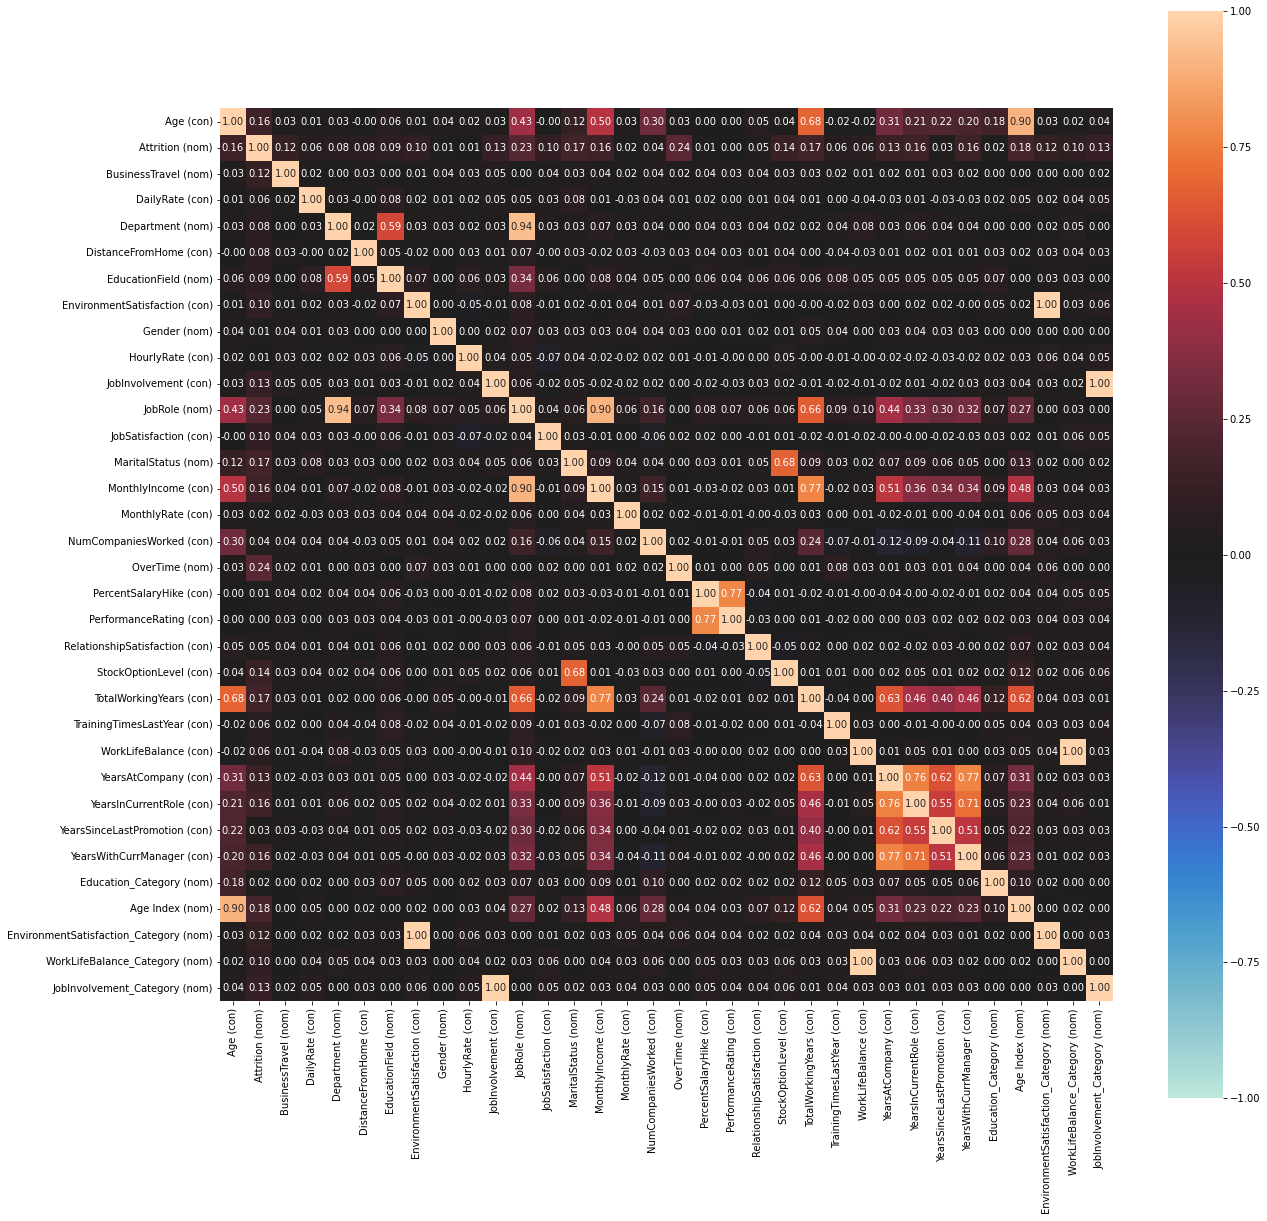

In [27]:
from dython import nominal
nominal.associations(df,figsize=(20,20),mark_columns=True);

In [28]:
# corr = df.corr()
# # mask = np.zeros_like(corr)
# # mask[np.triu_indices_from(mask)] = True
# # Heatmap
# plt.figure(figsize=(15, 10))
# sns.heatmap(corr,
#             vmax=.5,
#             # mask=mask,
#             annot=True, fmt='.2f',
#             linewidths=.2, cmap="gist_earth_r")

### Save Data Clean -> Tableu Visualization

In [29]:
df.to_csv('Clean Data Employee Analysis Attrition Report Visualisasi.csv')

In [30]:
# df_c = df.select_dtypes('int64')
# plt.figure(figsize=(15,15))
# sns.heatmap(df_c.corr(), annot = True, fmt = '.2f')

## **3. Data Analyst**

#### Overview Target

In [31]:
pd.crosstab(index=df['Attrition'],columns='count',normalize='columns').round(2)

col_0      count
Attrition       
No          0.84
Yes         0.16

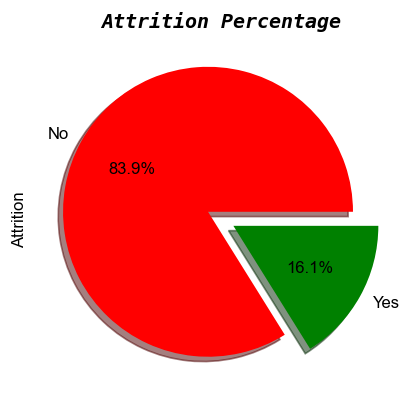

In [32]:
plt.figure(figsize=(30,4),dpi=120)
df['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['r','g'])
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.title('Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.show()

Dari 1.470 karyawan di perusahaan, hanya 237 karyawan yang resign setara dengan 16,1% persen karyawan yang resign dan ada 1.233 karyawan yang tidak resign dengan persentase 86,9%.

#### Define Columns For Visualization

In [33]:
total = float(len(df))

#### df_Copy for Statistik

In [34]:
df['Attrition_Num'] = df['Attrition']

In [35]:
def attrition_num(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [36]:
df['Attrition_Num'] = df['Attrition_Num'].apply(attrition_num)

### **BASIC INFO :**

#### 1. AGE

- Berapa saja umur karyawan yang bekerja pada perusahaaan ini ?
- Bagaimana pengaruh umur karyawan terhadap karyawan yang resign ?

In [37]:
# Berapa total umur karyawan yang ada di perusahaan?
data = pd.crosstab(index='Umur',columns=df['Age'])
data

Age    18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  \
row_0                                                                           
Umur    8   9  11  13  16  14  26  26  39  48  48  68  60  69  61  58  77  78   

Age    36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  \
row_0                                                                           
Umur   69  50  58  42  57  40  46  32  33  41  33  24  19  24  30  19  18  19   

Age    54  55  56  57  58  59  60  
row_0                              
Umur   18  22  14   4  14  10   5

In [38]:
age1 = pd.crosstab(index=df['Age'],columns='count',normalize='columns').round(2).sort_values('count',ascending=False)
age2 = pd.crosstab(index=df['Age'],columns=df['Attrition'],normalize=True).round(2).sort_values('Yes',ascending=False)
age3 = pd.concat([age1, age2], axis=1, join='inner')
age3

count    No   Yes
Age                   
34    0.05  0.05  0.01
36    0.05  0.04  0.00
35    0.05  0.05  0.01
29    0.05  0.03  0.01
31    0.05  0.03  0.01
32    0.04  0.03  0.01
40    0.04  0.04  0.00
38    0.04  0.04  0.00
33    0.04  0.03  0.01
30    0.04  0.03  0.01
45    0.03  0.03  0.00
42    0.03  0.03  0.00
41    0.03  0.02  0.00
37    0.03  0.03  0.00
39    0.03  0.02  0.00
28    0.03  0.02  0.01
27    0.03  0.03  0.00
26    0.03  0.02  0.01
43    0.02  0.02  0.00
49    0.02  0.01  0.00
47    0.02  0.01  0.00
46    0.02  0.02  0.00
44    0.02  0.02  0.00
50    0.02  0.02  0.00
24    0.02  0.01  0.00
25    0.02  0.01  0.00
52    0.01  0.01  0.00
56    0.01  0.01  0.00
55    0.01  0.01  0.00
59    0.01  0.01  0.00
54    0.01  0.01  0.00
53    0.01  0.01  0.00
58    0.01  0.01  0.00
18    0.01  0.00  0.00
51    0.01  0.01  0.00
48    0.01  0.01  0.00
19    0.01  0.00  0.00
23    0.01  0.01  0.00
22    0.01  0.01  0.00
21    0.01  0.00  0.00
20    0.01  0.00  0.00
57    0.00  0.00  0.00
60    0.00  0.00  0.00

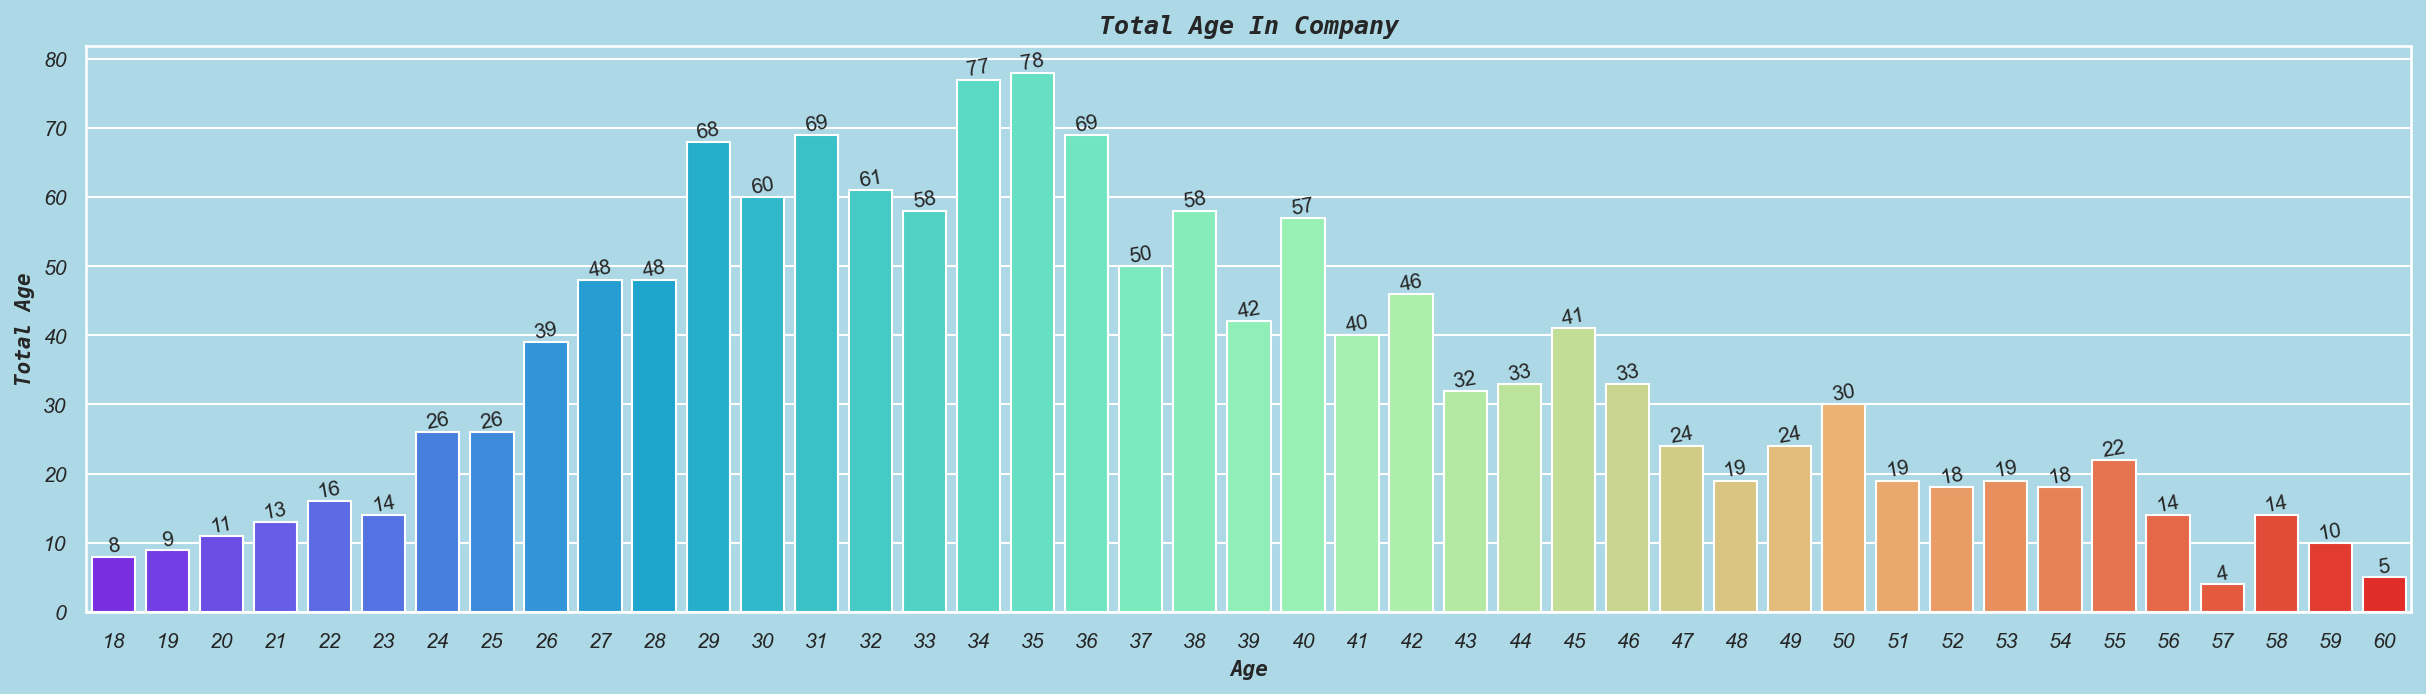

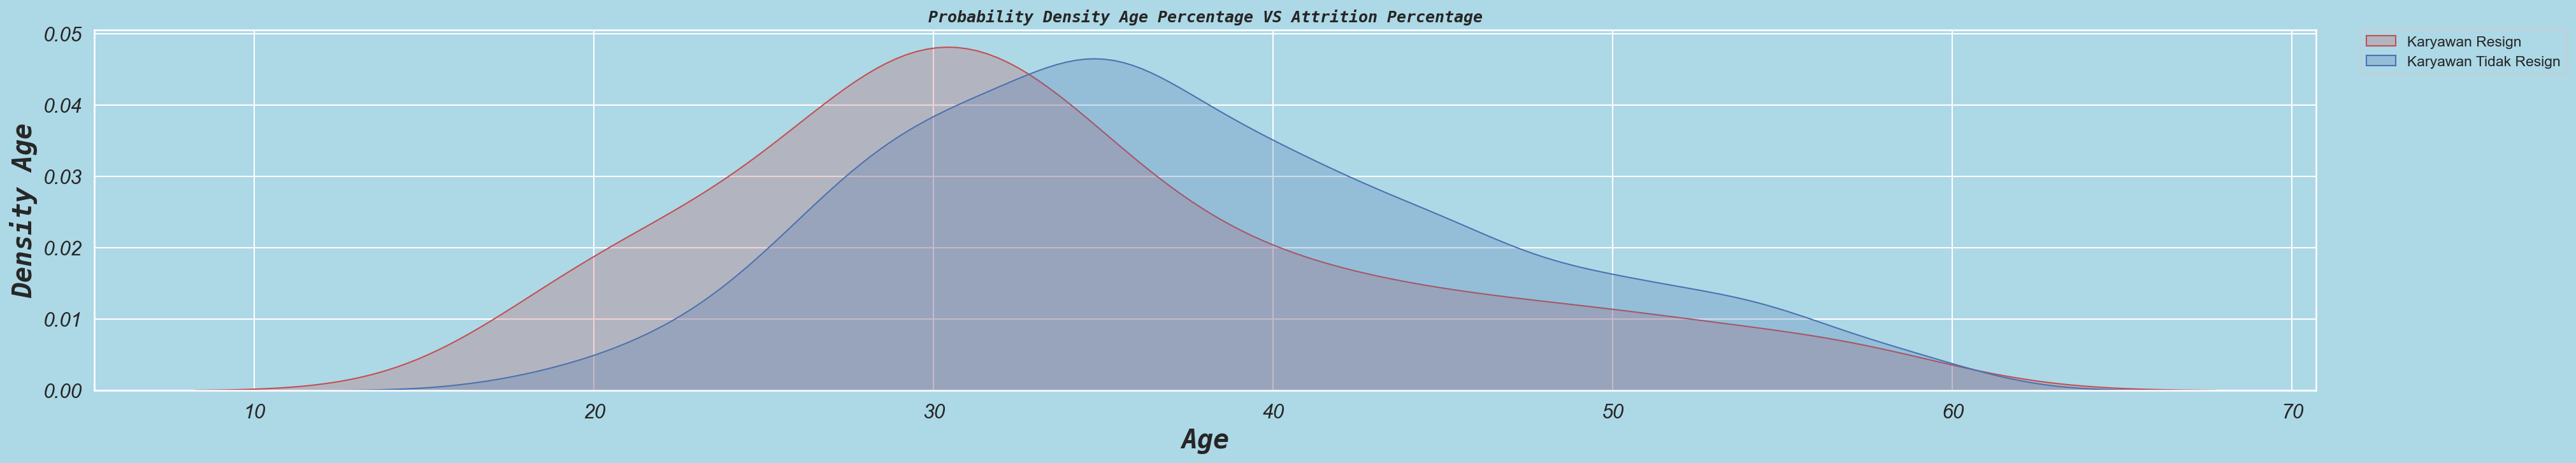

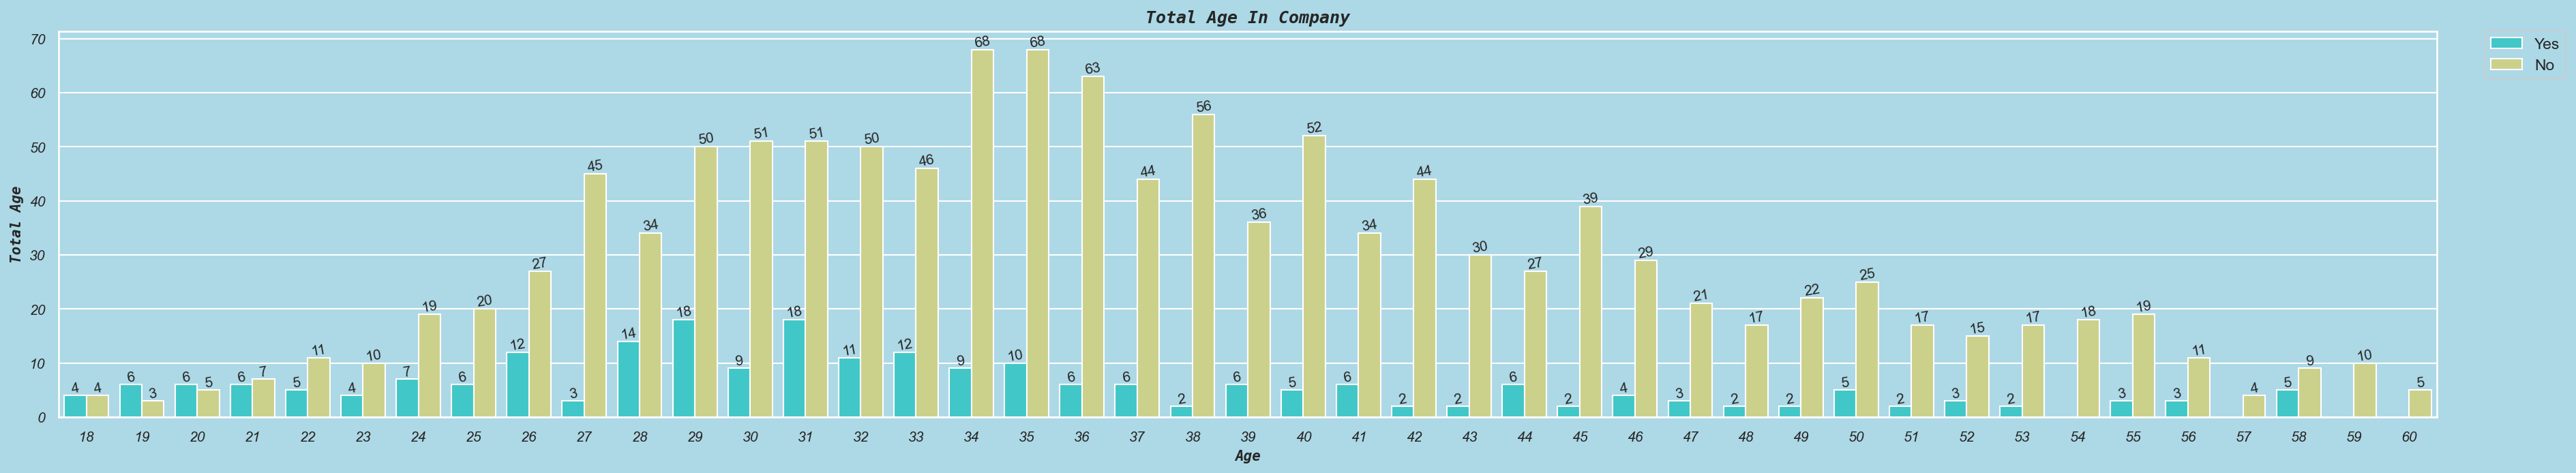

In [39]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='Age', data=df, palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Age In Company',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Age', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Age', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(30,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['Age'] 
df_no=df[df[ 'Attrition']=='No']['Age'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=15,fontstyle='italic')
plt.yticks(size=15,fontstyle='italic')
plt.title('Probability Density Age Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Age', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Density Age', size=20, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

plt.figure(figsize=(30,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='Age', data=df, hue="Attrition", palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Age In Company',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Age', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Age', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Perusahaan memiliki karyawan yang berumur paling kecil 18 tahun dan paling besar ada pada 60 tahun.
  - Jika dilihat dari hasil visualisasi Kernel Density Estimation (KDE) karyawan yang memilih resign paling banyak berada pada umur menjelang 30 tahun sampai dengan awal 30 tahun. Jika dilihat pada visualisasi bar plot banyak karyawan yang resign pada umur 29 tahun sampai dengan umur 31 tahun sedangkan untuk umur diatas 31 tahun banyak karyawan yang memilih untuk tetap tinggal di perusahaan.

#### 2. GENDER

- Berapa total gender karyawan yang ada di perusahaan dan berapa persentasenya ?
- Gender apa yang memiliki persentase tertinggi karyawan resign ?
- Bagaimana pengaruh gender terhadap keputusan karyawan resign ?

In [40]:
gender = pd.crosstab(index='Jenis Kelamin',columns=df['Gender'])
gender

Gender         Female  Male
row_0                      
Jenis Kelamin     588   882

In [41]:
gender1 = pd.crosstab(index=df['Gender'],columns='count',normalize='columns').round(2).sort_values('count',ascending=False)
gender2 = pd.crosstab(index=df['Gender'],columns=df['Attrition'],normalize=True).round(2).sort_values('Yes',ascending=False)
gender3 = pd.concat([gender1, gender2], axis=1, join='inner')
gender3

count    No   Yes
Gender                   
Male      0.6  0.50  0.10
Female    0.4  0.34  0.06

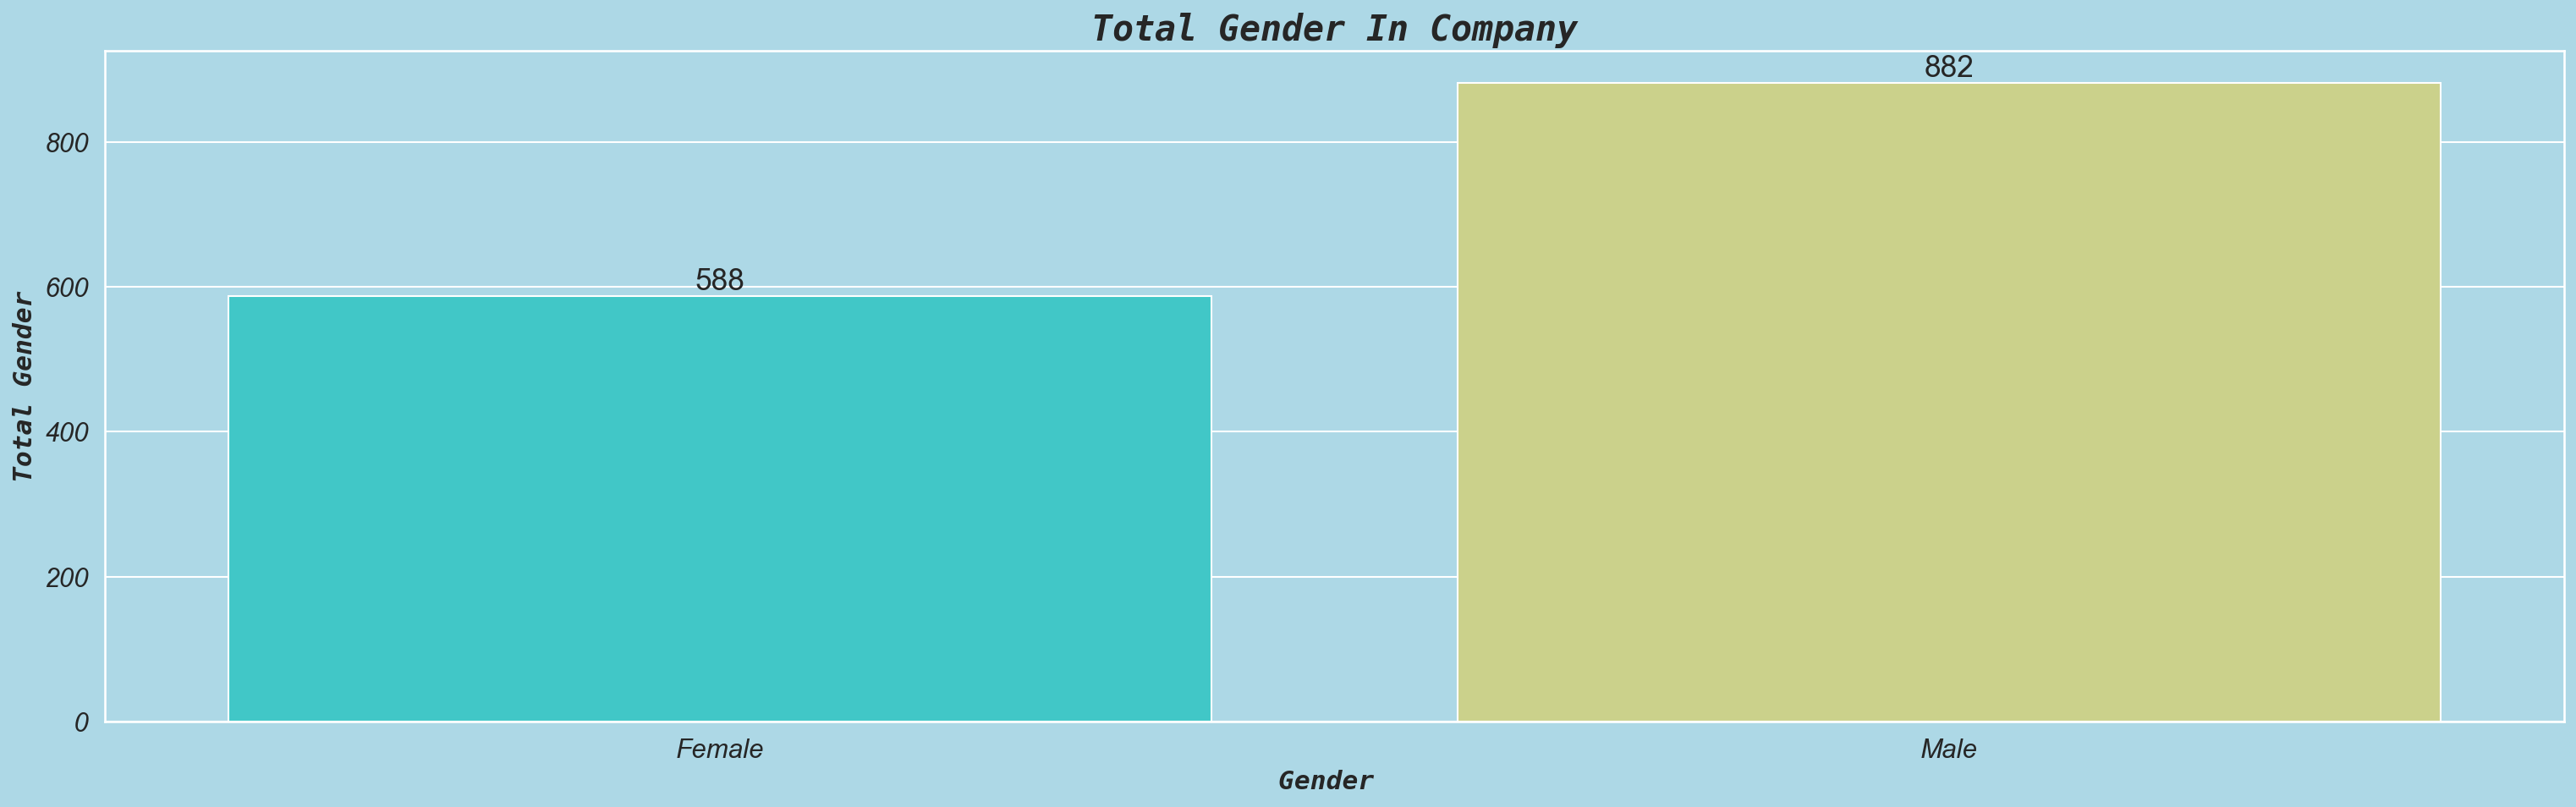

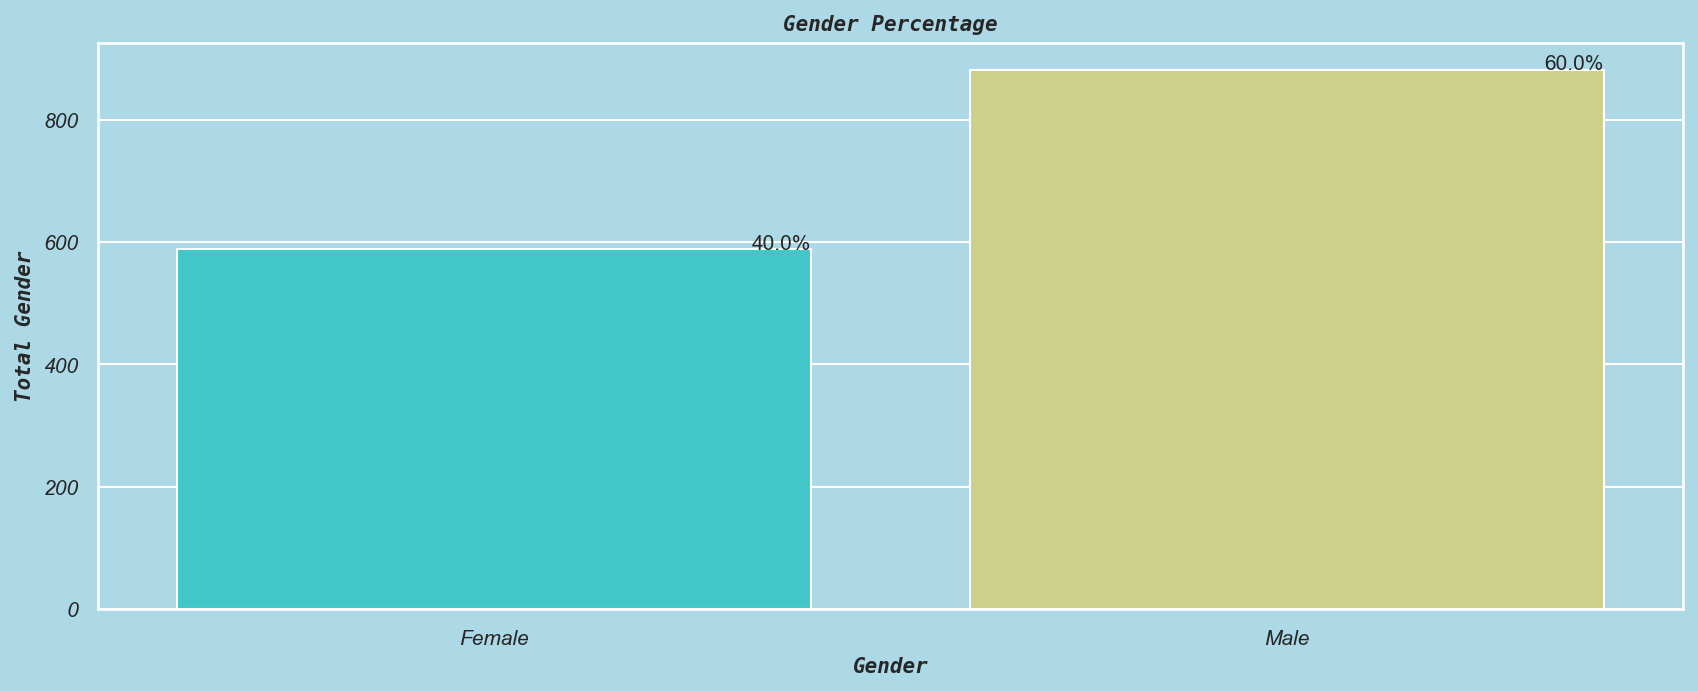

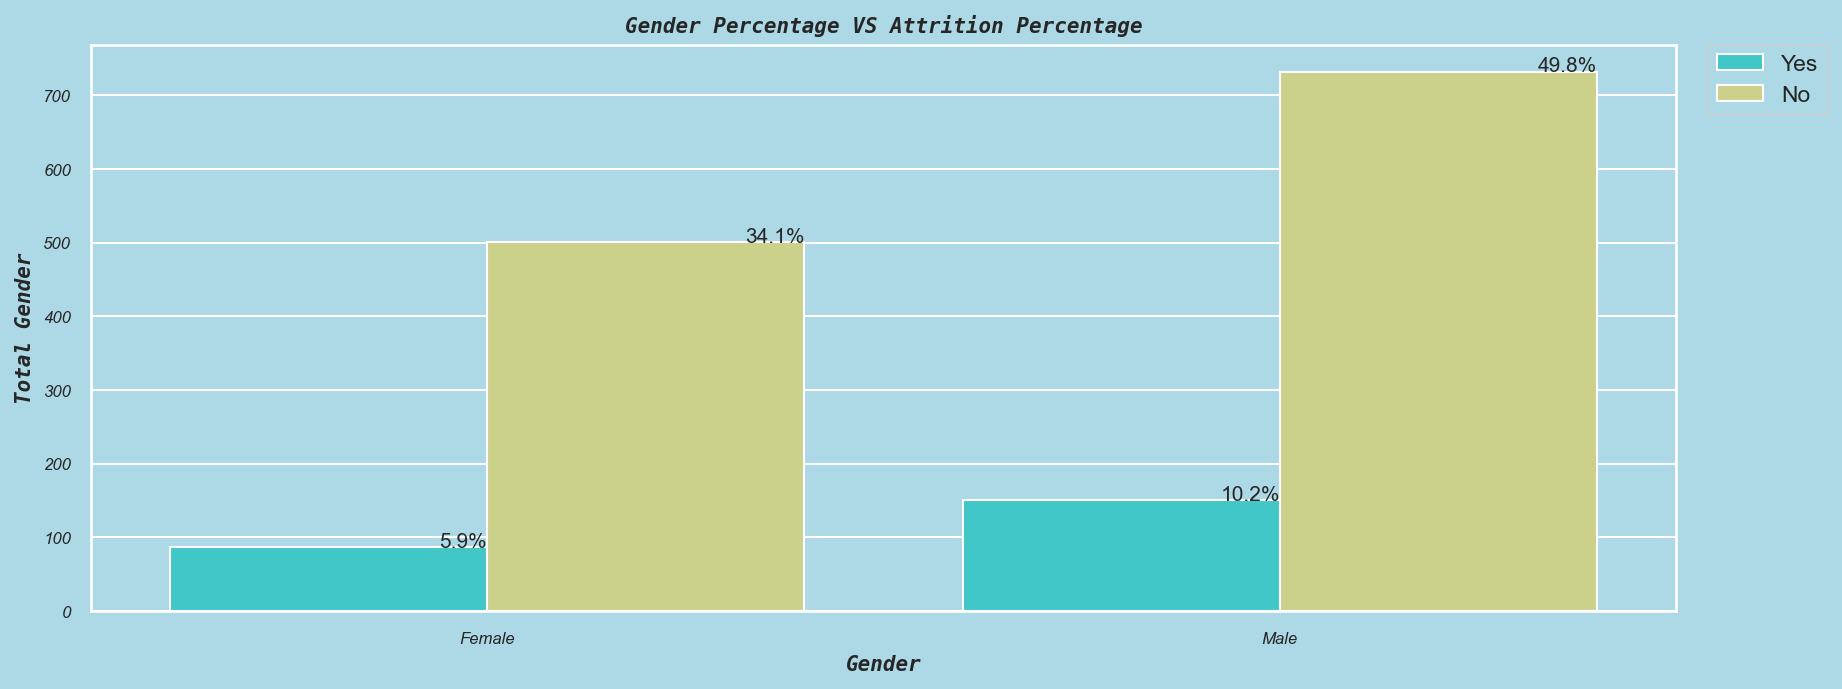

In [42]:
plt.figure(figsize=(25,7),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='Gender', data=df, palette = 'rainbow')
plt.xticks(size=15,fontstyle='italic')
plt.yticks(size=15,fontstyle='italic')
plt.title('Total Gender In Company',size=20, fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Gender ', fontstyle='italic', size=15, family='monospace',weight=900)
plt.ylabel('Total Gender', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=17, horizontalalignment='left')
plt.show()

plt.figure(figsize=(30,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.countplot(x="Gender",data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right',size=10)
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Gender Percentage',fontstyle='italic', size=10, family='monospace', weight=900)
    plt.xlabel('Gender', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Gender', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(30,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ax = sns.countplot(x="Gender", hue="Attrition", data=df,palette = 'rainbow')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',size=10)
    plt.xticks(size=8,fontstyle='italic')
    plt.yticks(size=8,fontstyle='italic')
    plt.title('Gender Percentage VS Attrition Percentage', size=10, fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Gender', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Gender', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Total karyawan dengan gender male ada 882 orang dengan persentase 60% dan karyawan dengan gender female ada 588 dengan persentase 40%.
  - Dari 60% gender male diperusahaan, ada 10,2% gender male resign dan dari 40% wanita gender female diperusahaan, ada 5,9% wanita memilih resign dari perusahaan.

#### 3. DICTANCE FROM HOME

1. Berapa jarak terdekat dan terjauh rumah karyawan dari perusahaan ?
2. Pada jarak berapa berapa saja karyawan memilih resign paling banyak banyak dibandingkan menetap di perusahaan?

In [43]:
distancefromhome = pd.crosstab(index='Jarak',columns=df['DistanceFromHome'])
distancefromhome

DistanceFromHome   1    2   3   4   5   6   7   8   9   10  11  12  13  14  \
row_0                                                                        
Jarak             208  211  84  64  65  59  84  80  85  86  29  20  19  21   

DistanceFromHome  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  
row_0                                                                         
Jarak             26  32  20  26  22  25  18  19  27  28  25  25  12  23  27

In [44]:
# distancefromhome1 = pd.crosstab(index=df['DistanceFromHome'],columns='count').sort_values('count',ascending=False)
distancefromhome2 = pd.crosstab(index=df['DistanceFromHome'],columns='count',normalize='columns').round(2).sort_values('count',ascending=False)
distancefromhome3 = pd.crosstab(index=df['DistanceFromHome'],columns=df['Attrition'],normalize='all').round(2).sort_values('Yes',ascending=False)
distancefromhome4 = pd.concat([distancefromhome2, distancefromhome3], axis=1, join='inner')
distancefromhome4

count    No   Yes
DistanceFromHome                   
1                  0.14  0.12  0.02
2                  0.14  0.12  0.02
7                  0.06  0.05  0.01
10                 0.06  0.05  0.01
9                  0.06  0.05  0.01
3                  0.06  0.05  0.01
8                  0.05  0.05  0.01
6                  0.04  0.04  0.00
5                  0.04  0.04  0.01
4                  0.04  0.04  0.01
18                 0.02  0.01  0.00
28                 0.02  0.01  0.00
26                 0.02  0.01  0.00
25                 0.02  0.01  0.00
24                 0.02  0.01  0.01
23                 0.02  0.01  0.00
20                 0.02  0.01  0.00
15                 0.02  0.01  0.00
16                 0.02  0.02  0.00
11                 0.02  0.02  0.00
29                 0.02  0.01  0.00
19                 0.01  0.01  0.00
17                 0.01  0.01  0.00
21                 0.01  0.01  0.00
22                 0.01  0.01  0.00
14                 0.01  0.01  0.00
13                 0.01  0.01  0.00
12                 0.01  0.01  0.00
27                 0.01  0.01  0.00

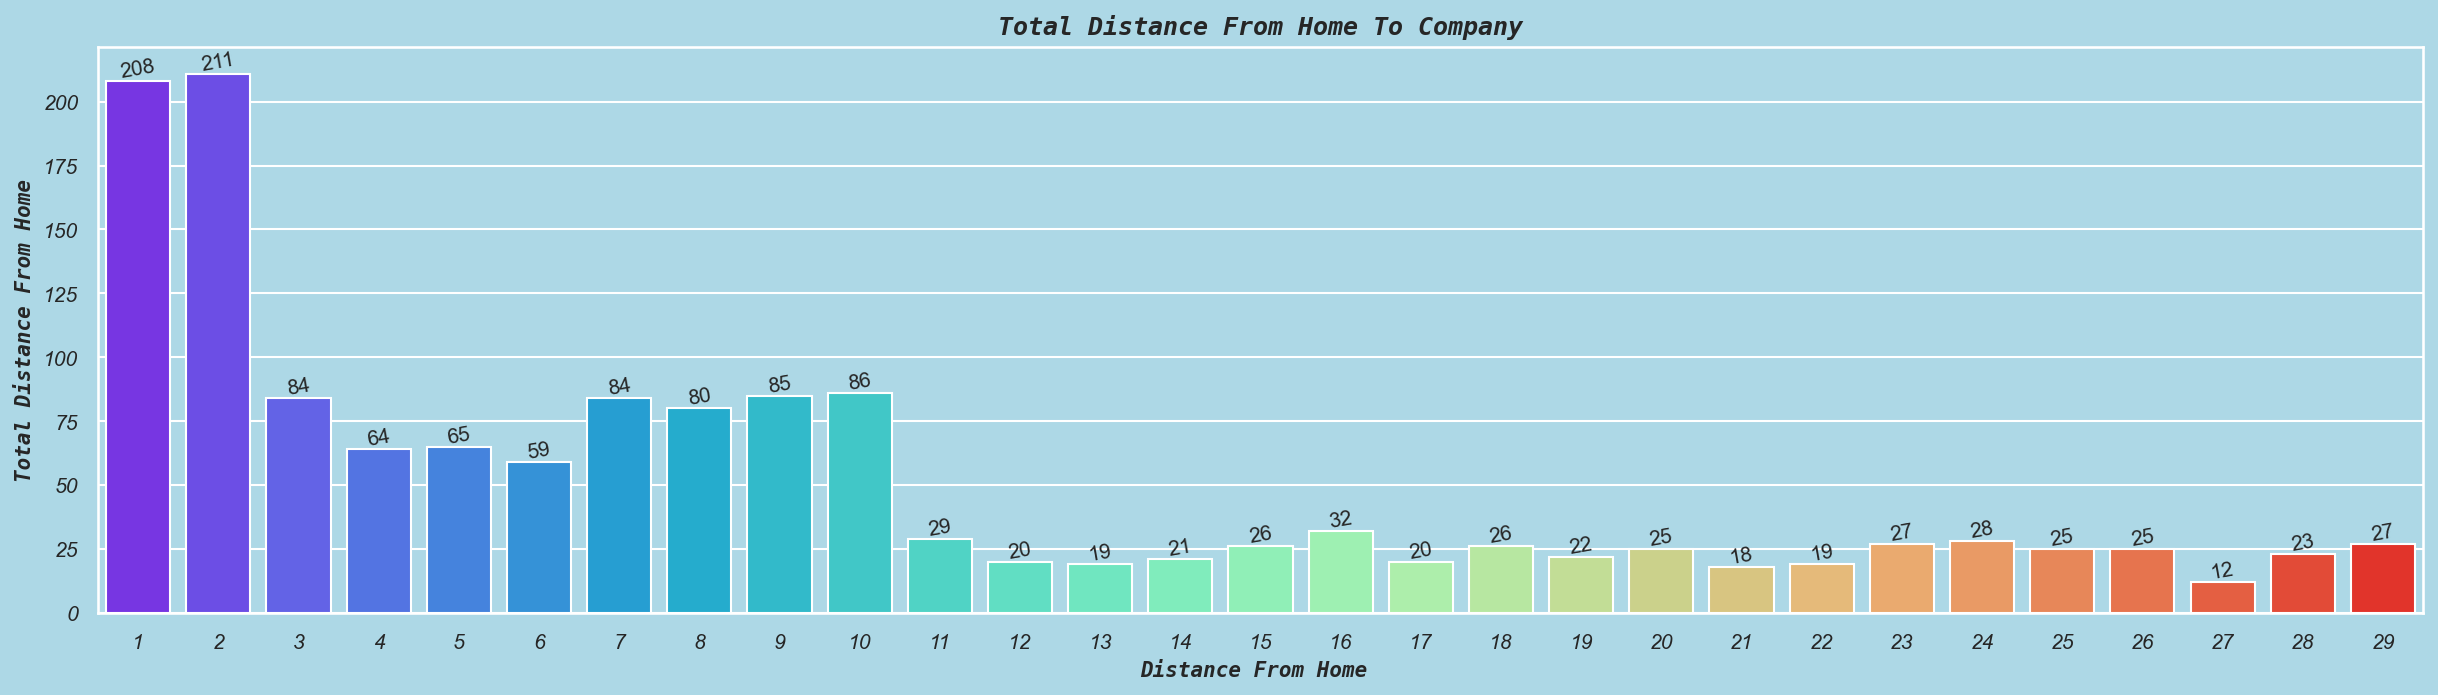

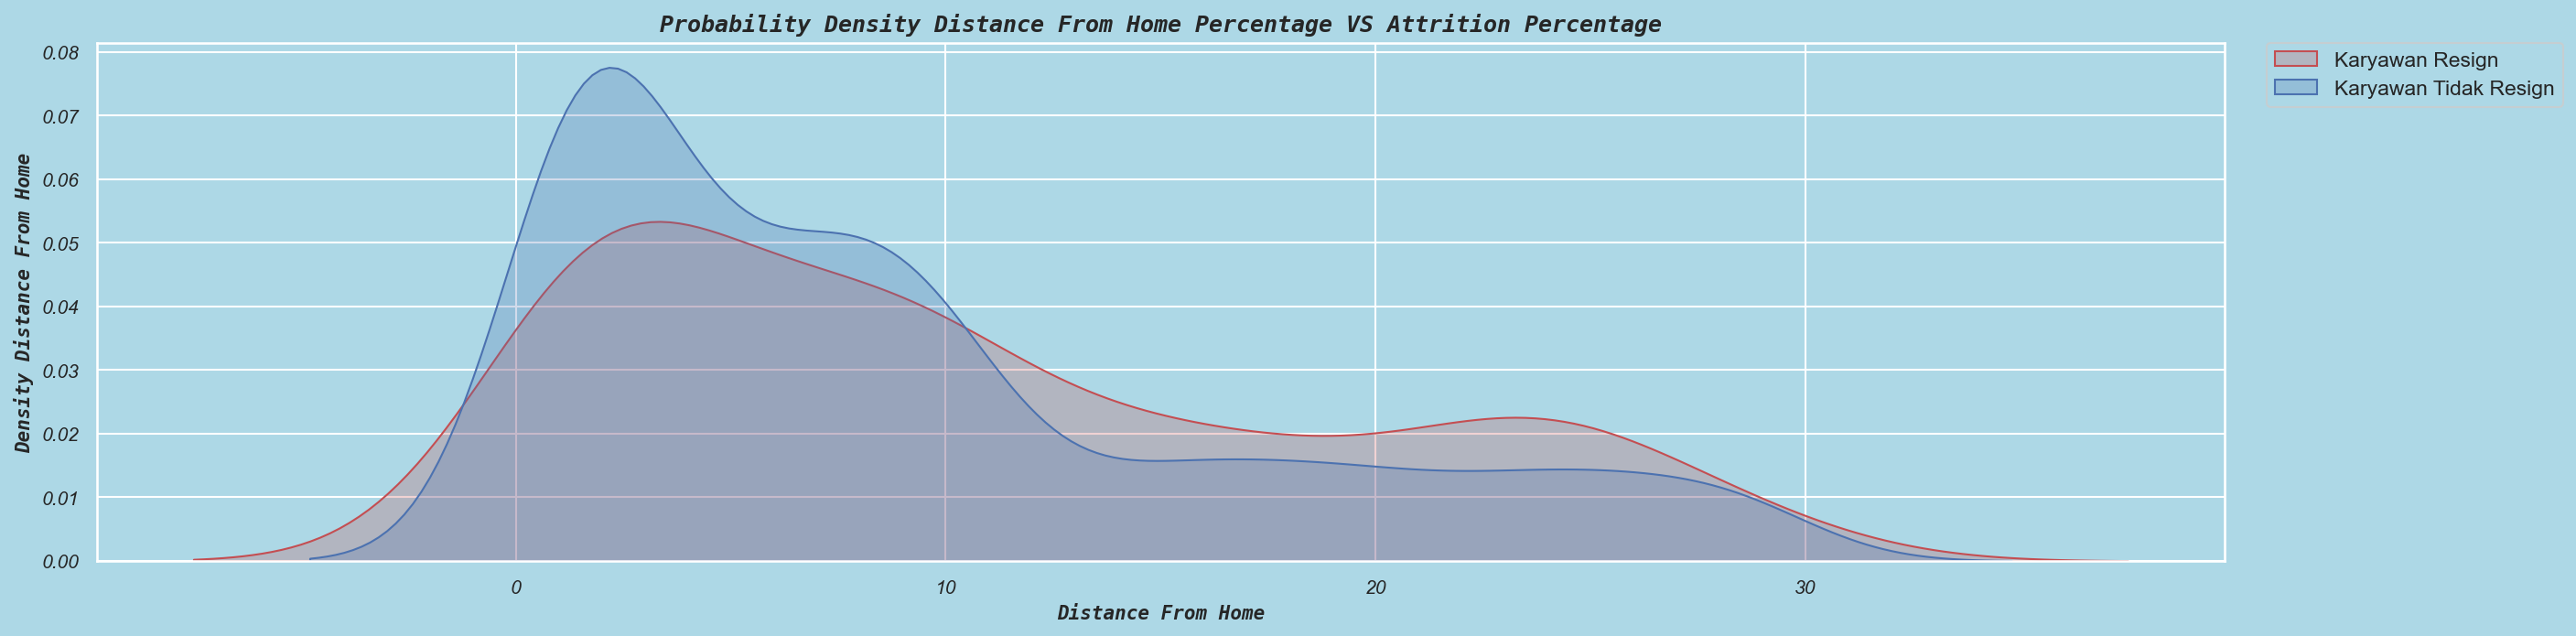

In [45]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='DistanceFromHome', data=df, palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Distance From Home To Company',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Distance From Home ', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Distance From Home', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['DistanceFromHome'] 
df_no=df[df[ 'Attrition']=='No']['DistanceFromHome'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Distance From Home Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Distance From Home', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Distance From Home', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Jarak rumah karyawan dari kantor paling dekat ada pada 1 km dan paling jauh ada pada 29 km
  - Dari jarak terdekat yaitu 1 km dari rumah karyawan ke kantor sampai dengan jarak terjauh yaitu 29km ada karyawan yang resign namun jika dilihat dari keseluruhan karyawan yang resign tertinggi ada pada jarak kurang dari 10 km dari kantor dan jarak diatas 10 km mulai menurun tingkat karyawan resignnya. Jika dibandingkan dengan karyawan tidak resign, paling banyak karyawan tidak resign ada pada jarak kurang dari 10km jarak rumah ke kantor dan sedangkan jarak rumah karyawan di atas 10 km tingkat karyawan tidak resign lebih rendah dari pada karyawan resign, yang artinya semakin jauh jarak lokasi rumah karyawan dengan kantor maka semakin besar peluang karyawan untuk resign.

#### 4. EDUCATION

1. Apa saja baground pendidikan karyawan dan berapa totalnya ?
2. Karyawan dengan baground pendidikan apa saja yang memiliki persentase resign tertinggi ?

In [46]:
education = pd.crosstab(index='Pendidikan',columns=df['Education_Category'])
education

Education_Category  Bachelor  Doctor  Master
row_0                                       
Pendidikan              1024      48     398

In [47]:
educationcategory2 = pd.crosstab(index=df['Education_Category'],columns='count',normalize='columns').round(2).sort_values('count',ascending=False)
educationcategory3 = pd.crosstab(index=df['Education_Category'],columns=df['Attrition'],normalize='all').round(2).sort_values('Yes',ascending=False)
educationcategory4 = pd.concat([educationcategory2, educationcategory3], axis=1, join='inner')
educationcategory4

count    No   Yes
Education_Category                   
Bachelor             0.70  0.58  0.12
Master               0.27  0.23  0.04
Doctor               0.03  0.03  0.00

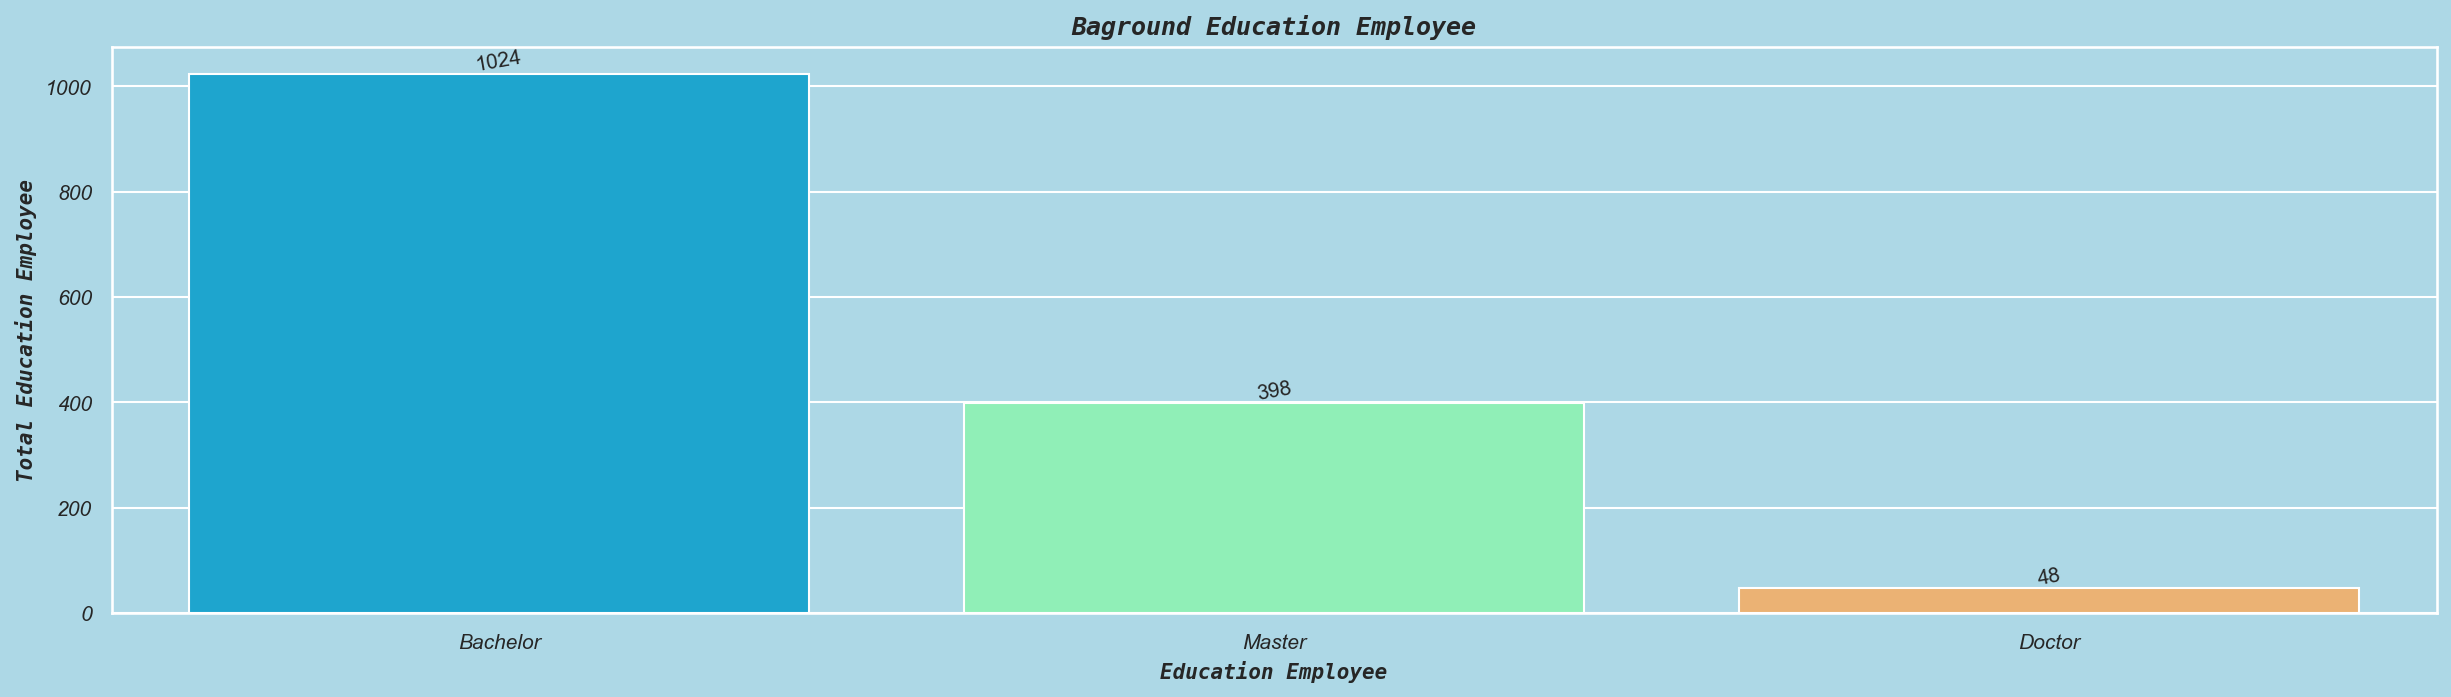

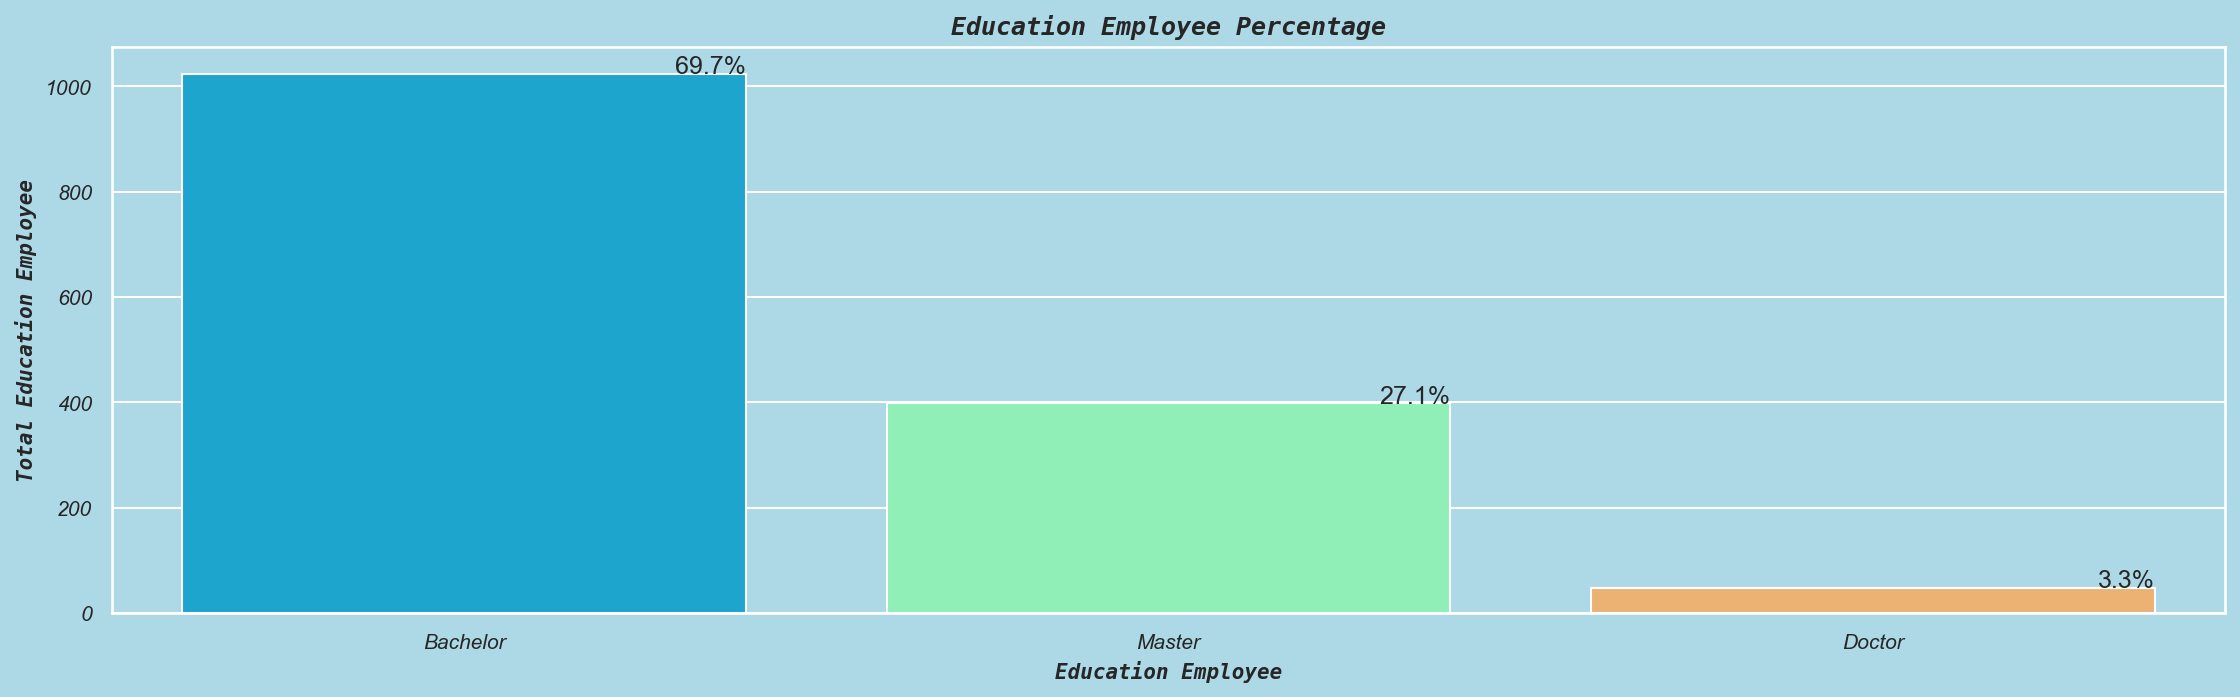

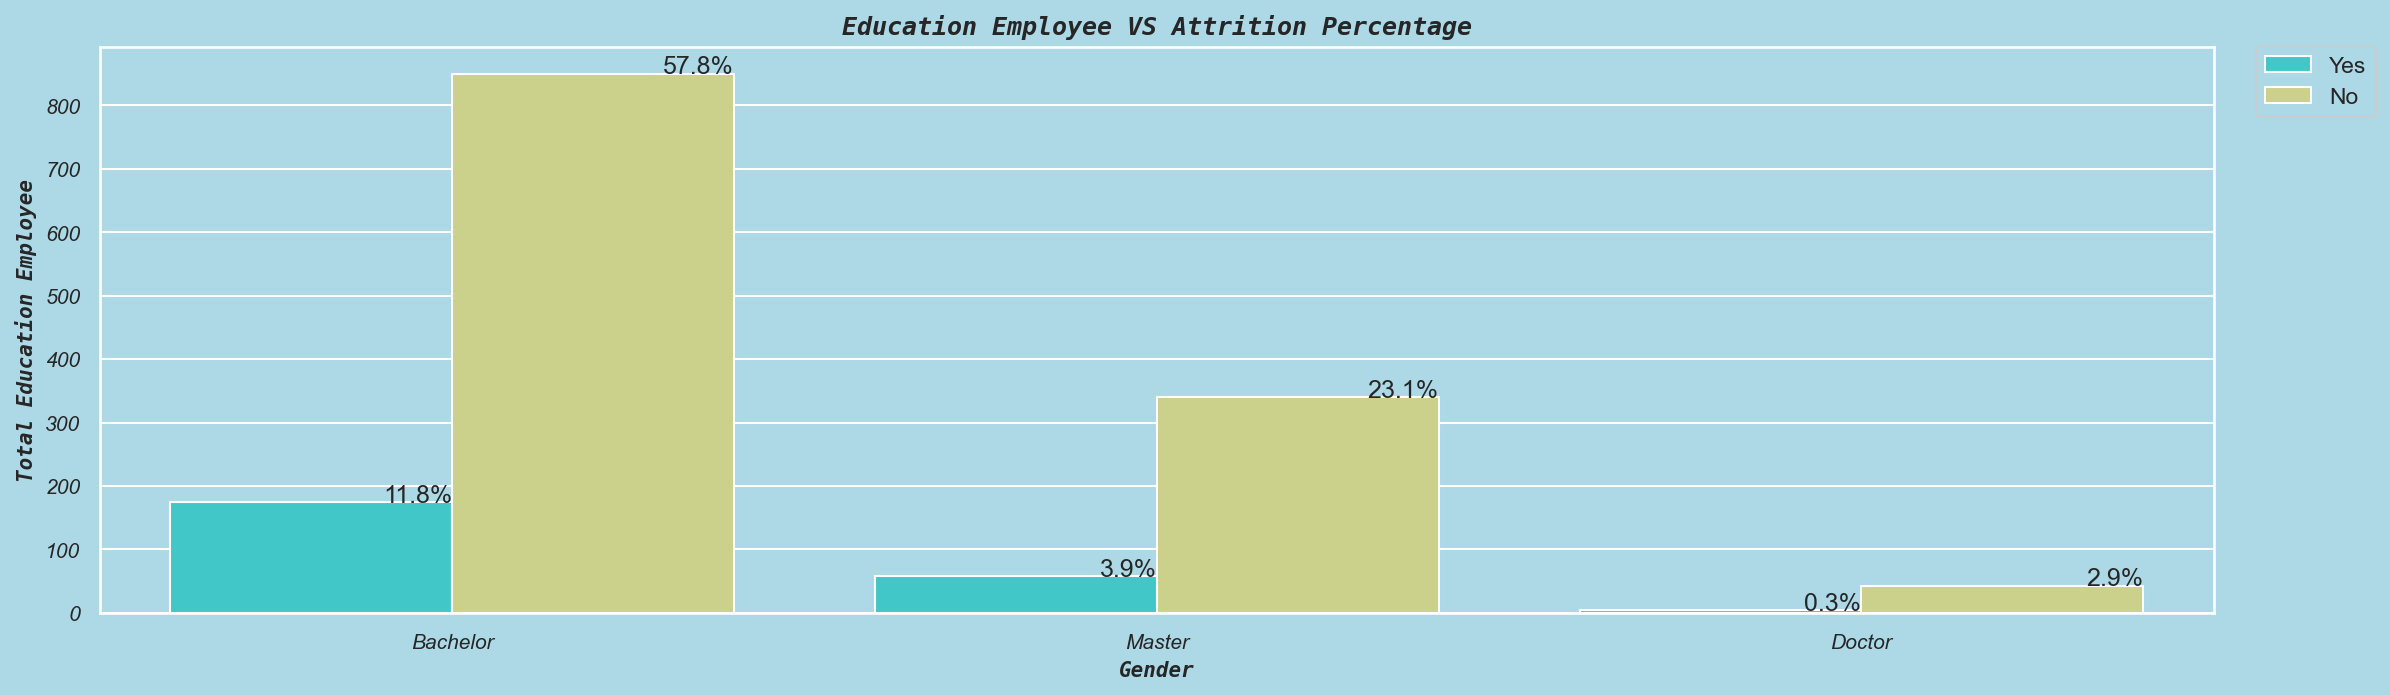

In [48]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='Education_Category', data=df, palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Baground Education Employee',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Education Employee', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Education Employee', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(40,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.countplot(x="Education_Category",data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Education Employee Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Education Employee', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Education Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(40,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ax = sns.countplot(x="Education_Category", hue="Attrition", data=df,palette = 'rainbow')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Education Employee VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Gender', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Education Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Total karyawan yang memiliki baground pendidikan bachelor sebanyak 1.024 dengam persentase 69,7% , karyawan yang memiliki baground pendidikan master 398 dengan persentase 27,1% dan karyawan yang memiliki bagorund pendidikan Doctoer ada 48 karyawan 3,33%.
  - Total karyawan yang resign paling banyak dari baground pendidikan sarjana sebanyak 11,8%, sedangkan baground pendidikan yang tinggi dari pada bachelor yaitu seperti master memiliki persentase karyawan resign 3,9% dan doctor 0,3% memiliki persentase lebih rendah untuk resign.

#### 5. Marital Status

1. Apa status pernikahan karyawan dan berapa totalnya ?
2. Karyawan yang memiliki status pernikahan apa yang paling banyak resign ?

In [49]:
marital_status = pd.crosstab(index='Marital Status',columns=df['MaritalStatus'])
marital_status

MaritalStatus   Divorced  Married  Single
row_0                                    
Marital Status       327      673     470

In [50]:
maritalstatus2 = pd.crosstab(index=df['MaritalStatus'],columns='count',normalize='columns').round(2)
maritalstatus3 = pd.crosstab(index=df['MaritalStatus'],columns=df['Attrition'],normalize='all').round(2)
maritalstatus4 = pd.concat([maritalstatus2, maritalstatus3], axis=1, join='inner')
maritalstatus4.sort_values('Yes',ascending=False)

count    No   Yes
MaritalStatus                   
Single          0.32  0.24  0.08
Married         0.46  0.40  0.06
Divorced        0.22  0.20  0.02

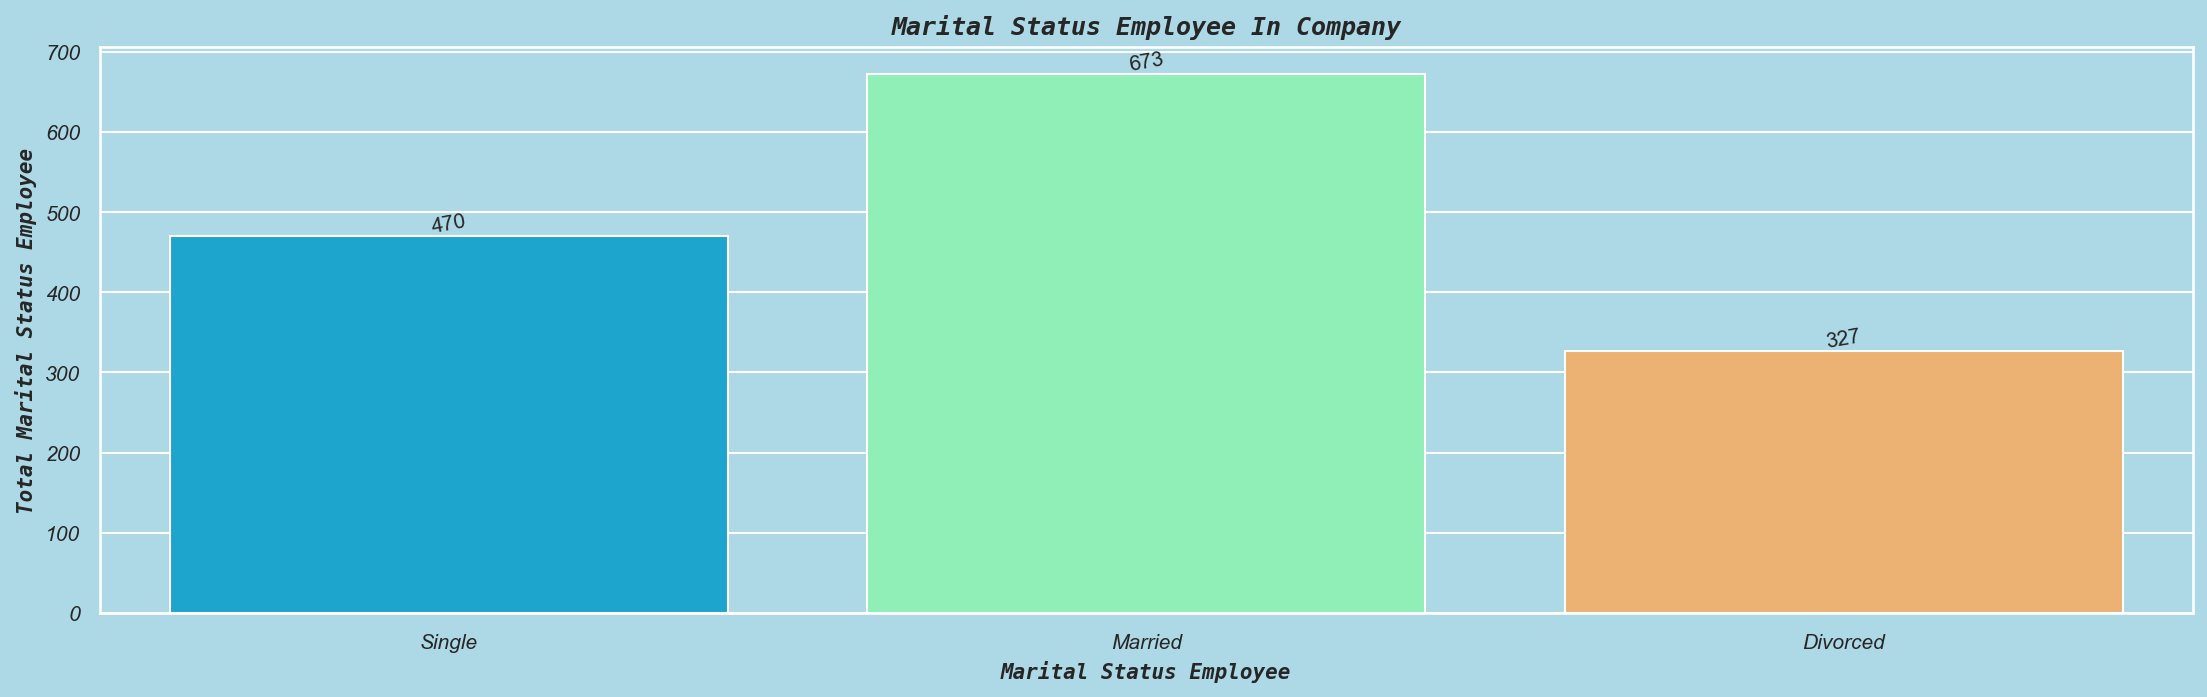

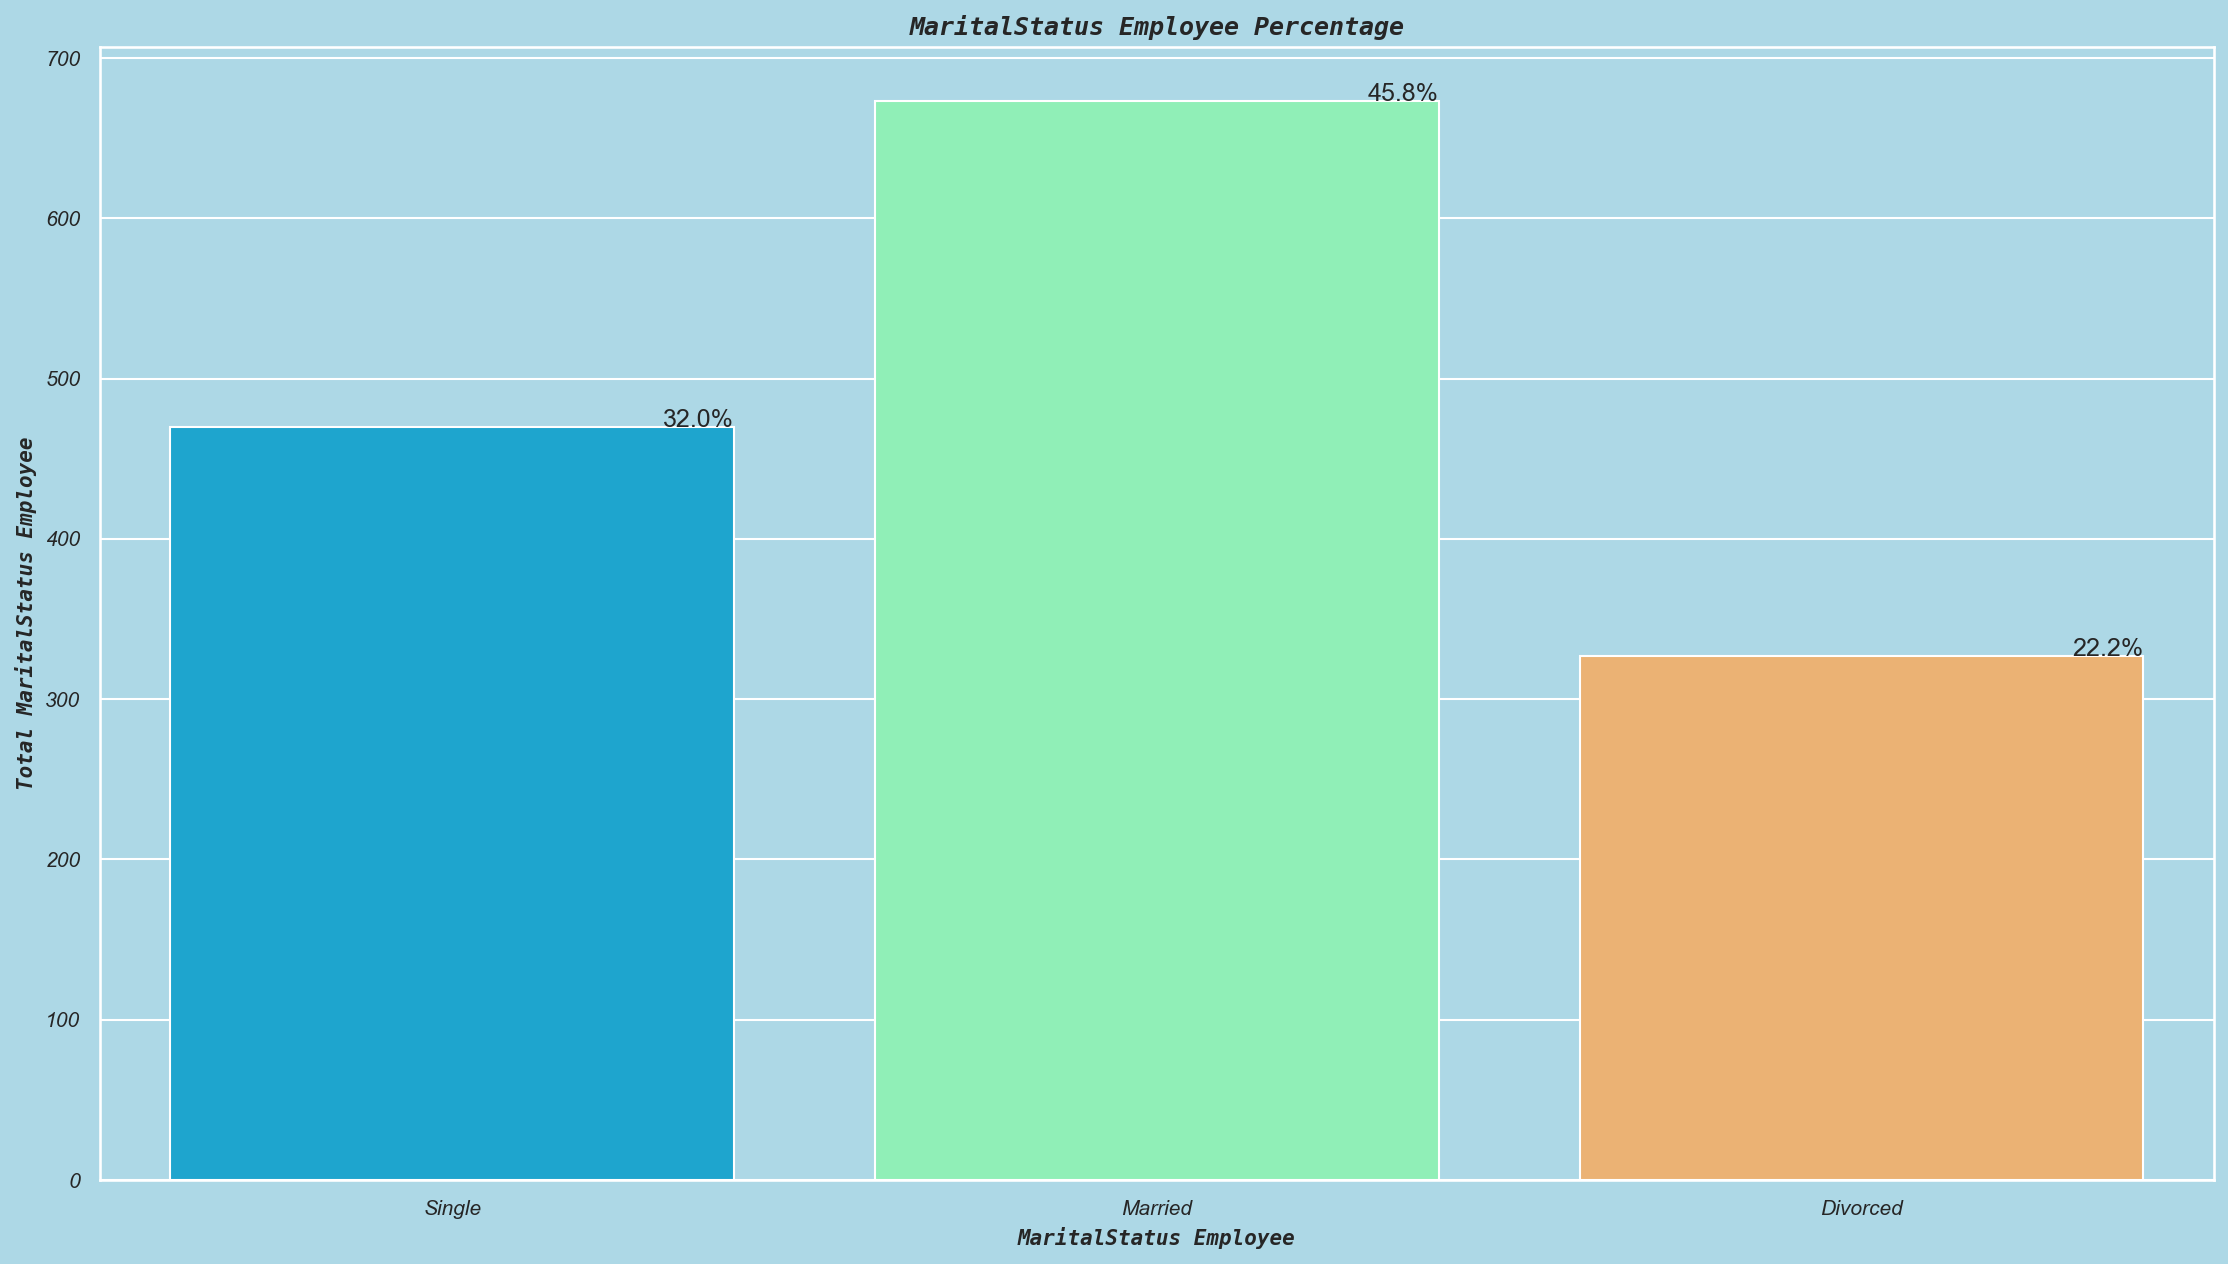

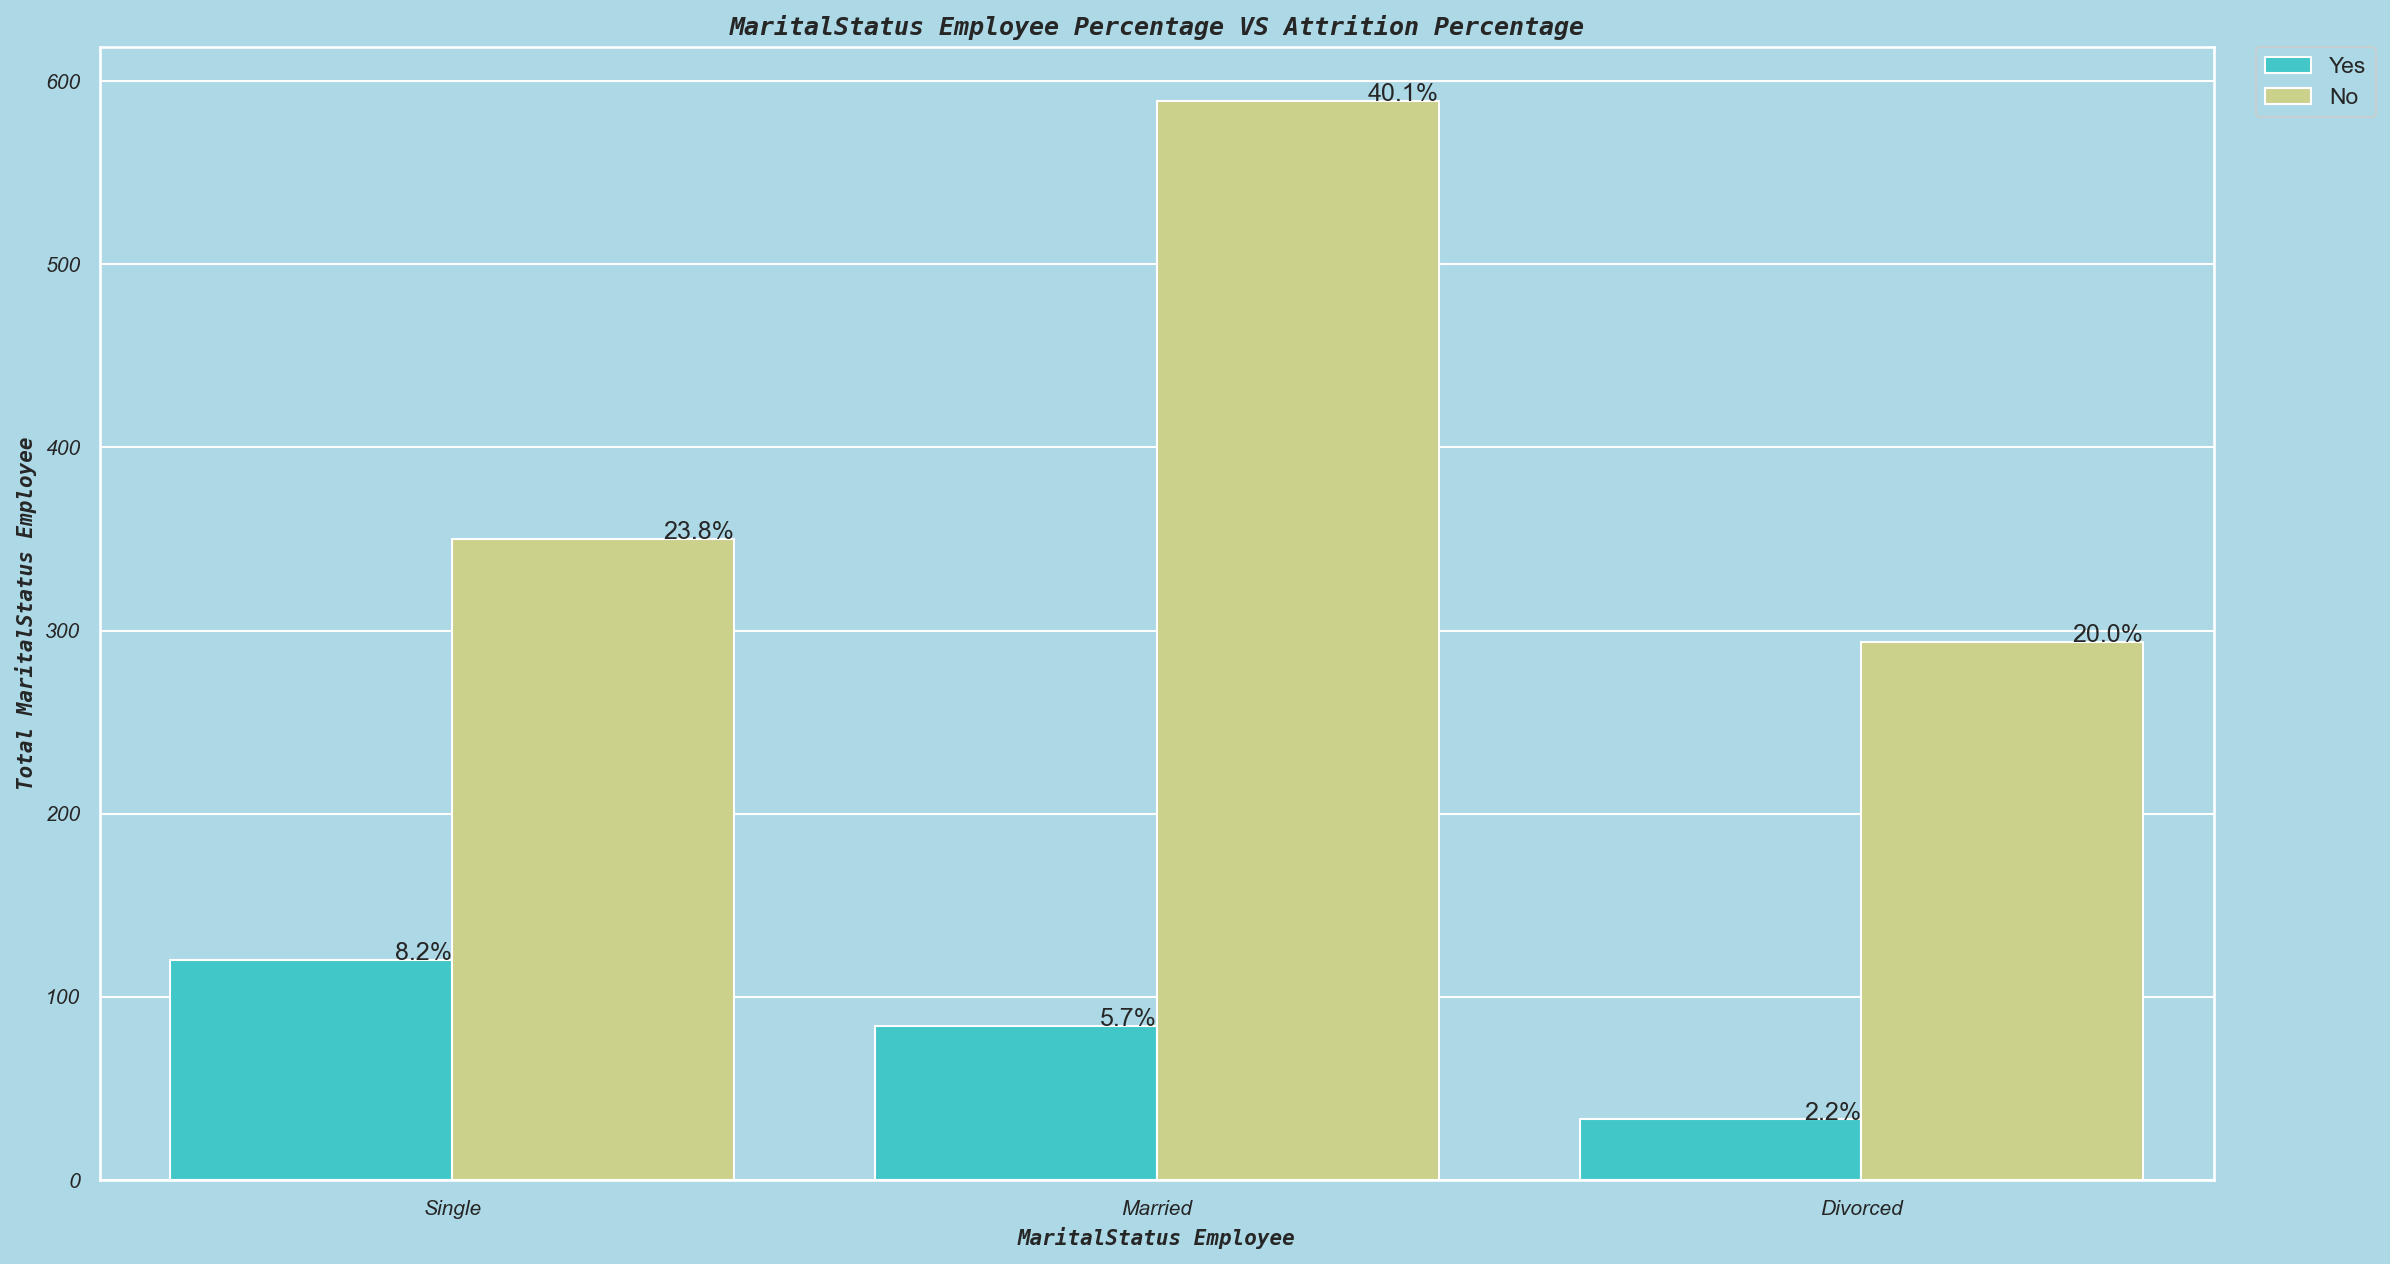

In [51]:
plt.figure(figsize=(18,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='MaritalStatus', data=df, palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Marital Status Employee In Company',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Marital Status Employee', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Marital Status Employee', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.countplot(x="MaritalStatus",data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('MaritalStatus Employee Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('MaritalStatus Employee', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total MaritalStatus Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ax = sns.countplot(x="MaritalStatus", hue="Attrition", data=df,palette = 'rainbow')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('MaritalStatus Employee Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('MaritalStatus Employee', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total MaritalStatus Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Karyawan yang berstatus single sebanyak 470 orang dengan total persentase 32%, sedangkan karyawan yang berstatus married lebih tinggi yaitu 673 orang dengan total persentase 45,8% dan karyawan yang memiliki status divorced memiliki jumlah terkecil yaitu 327 orang dengan persentase 22,2%
  - Karyawan yang memiliki status single memiliki persentase tertinggi yang resign sebanyak 8,2%, persentase ini lebih tinggi dari pada karyawan dengan status married yaitu 5,7% dan karyawan dengan status divorced 2,2%.

In [52]:
# Work Info:  Department, Job Role, Job Level, Over Time, Business Travel, Performance Rating, Stock Option Level, Job Involvement

### **WORK INFO :**

#### 6. DEPARTMENT

1. Berapa jumlah karyawan dari masing-masing departement ?
2. Department apa yang memiliki persentase tertinggi karyawan resign ?

In [53]:
departement = pd.crosstab(index='Department',columns=df['Department'])
departement

Department  Human Resources  Research & Development  Sales
row_0                                                     
Department               63                     961    446

In [54]:
Department2 = pd.crosstab(index=df['Department'],columns='count',normalize='columns').round(2)
Department3 = pd.crosstab(index=df['Department'],columns=df['Attrition'],normalize='all').round(2)
Department4 = pd.concat([Department2, Department3], axis=1, join='inner')
Department4.sort_values('Yes',ascending=False)

count    No   Yes
Department                               
Research & Development   0.65  0.56  0.09
Sales                    0.30  0.24  0.06
Human Resources          0.04  0.03  0.01

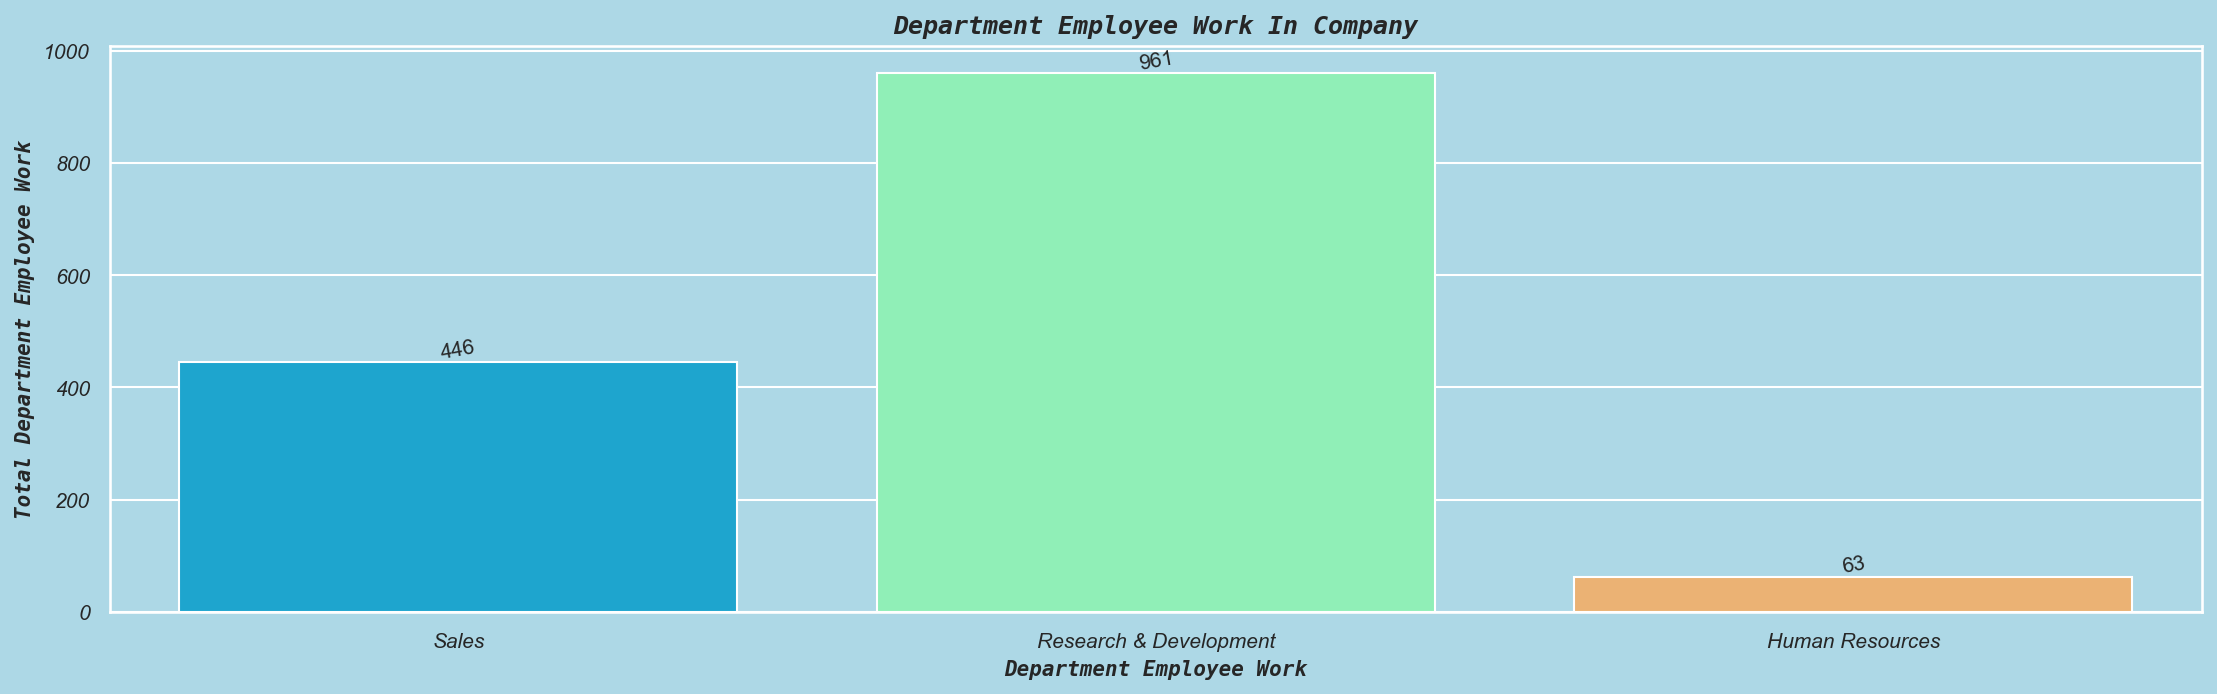

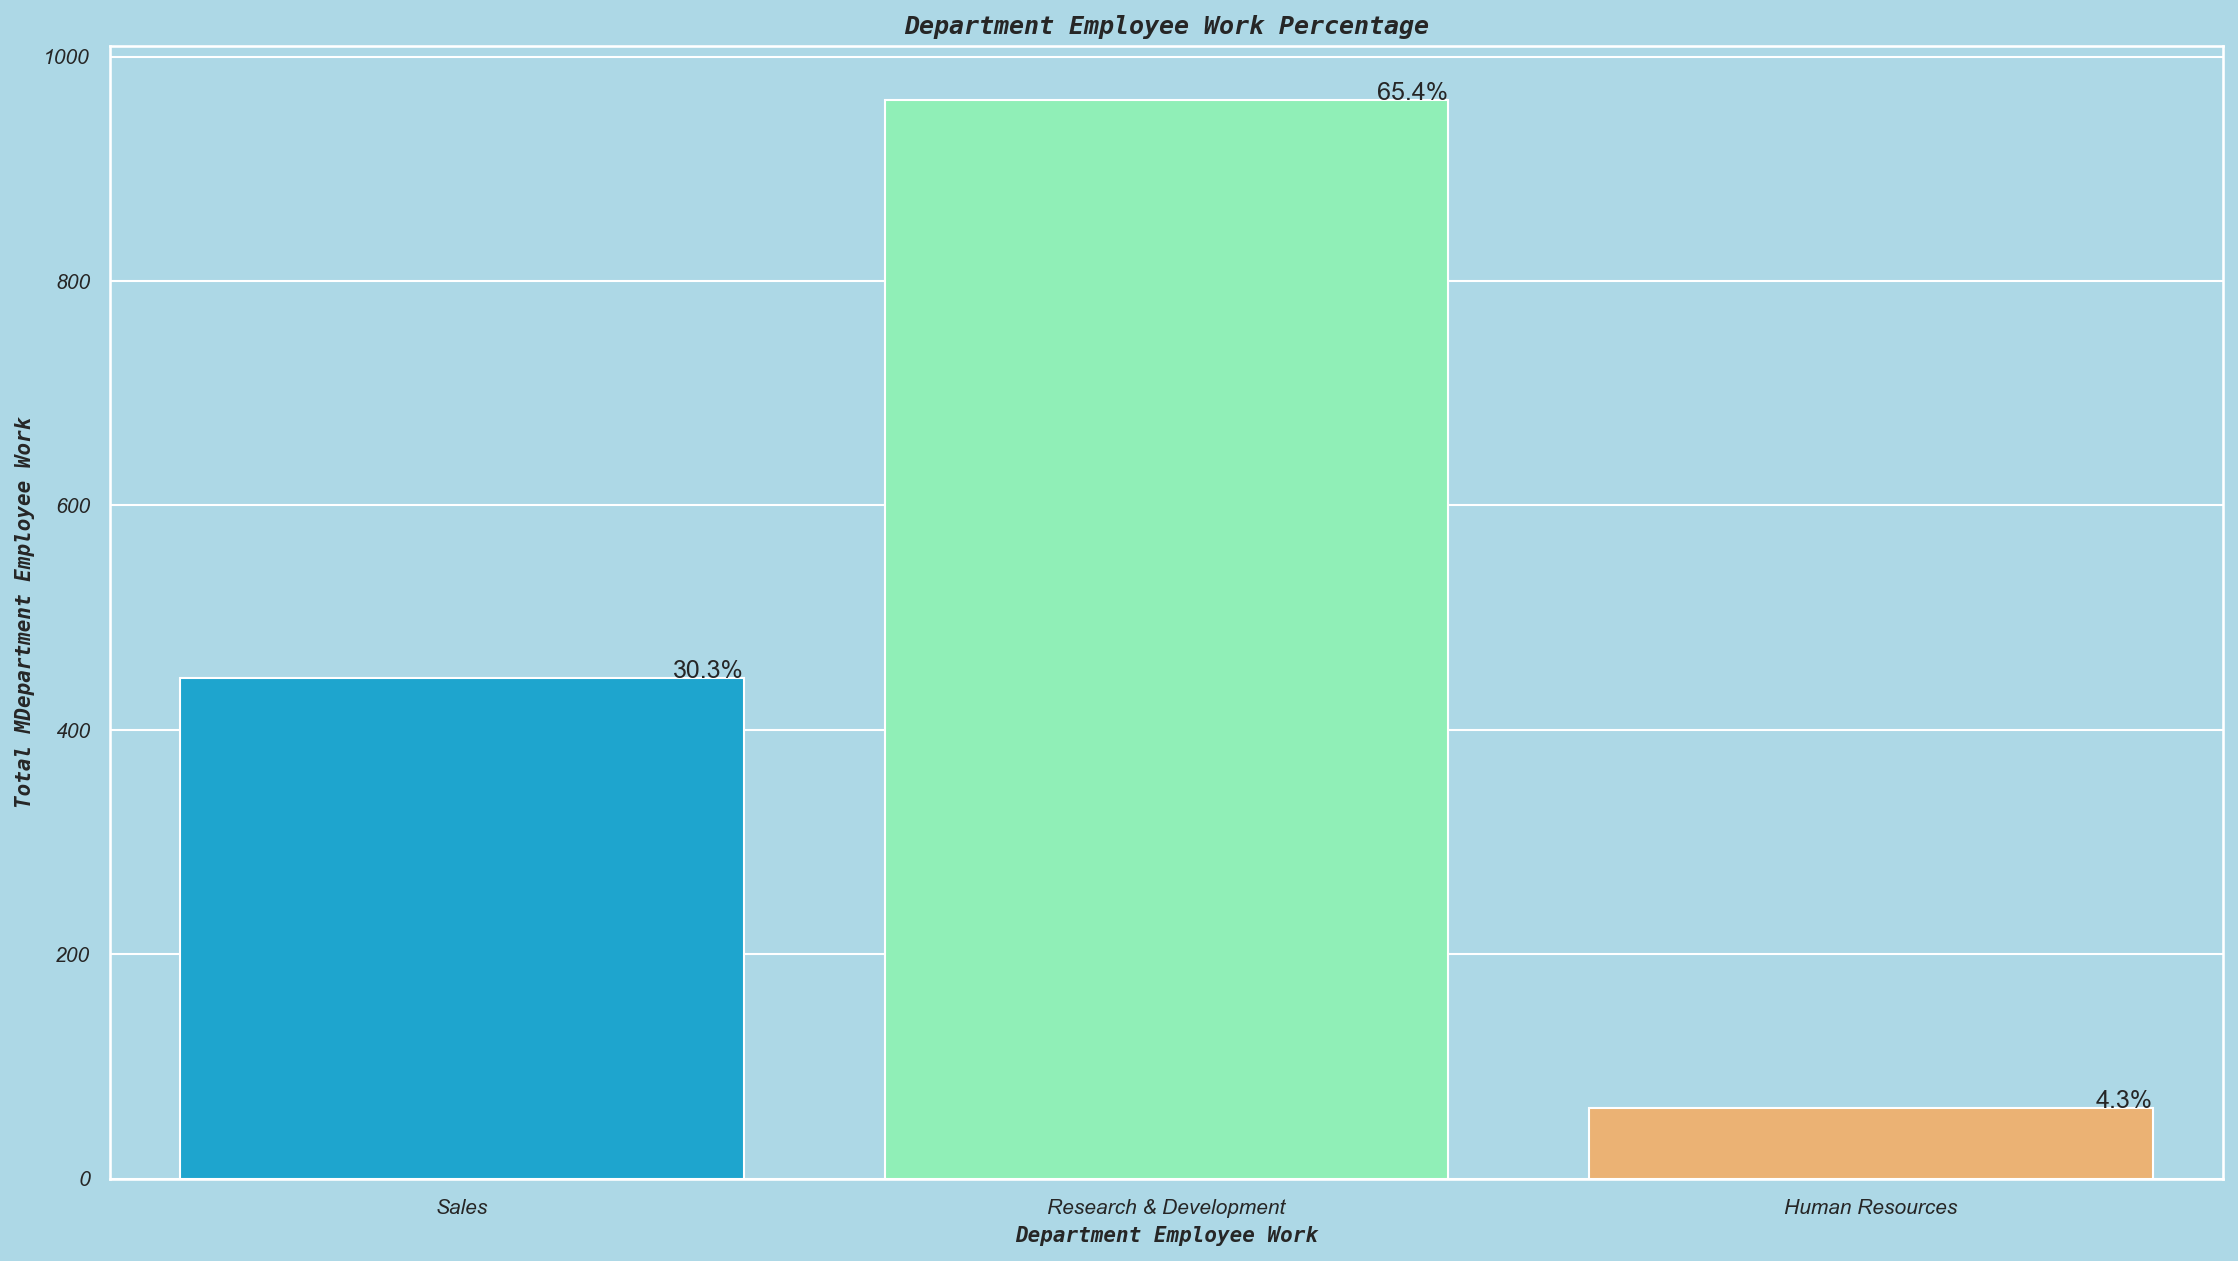

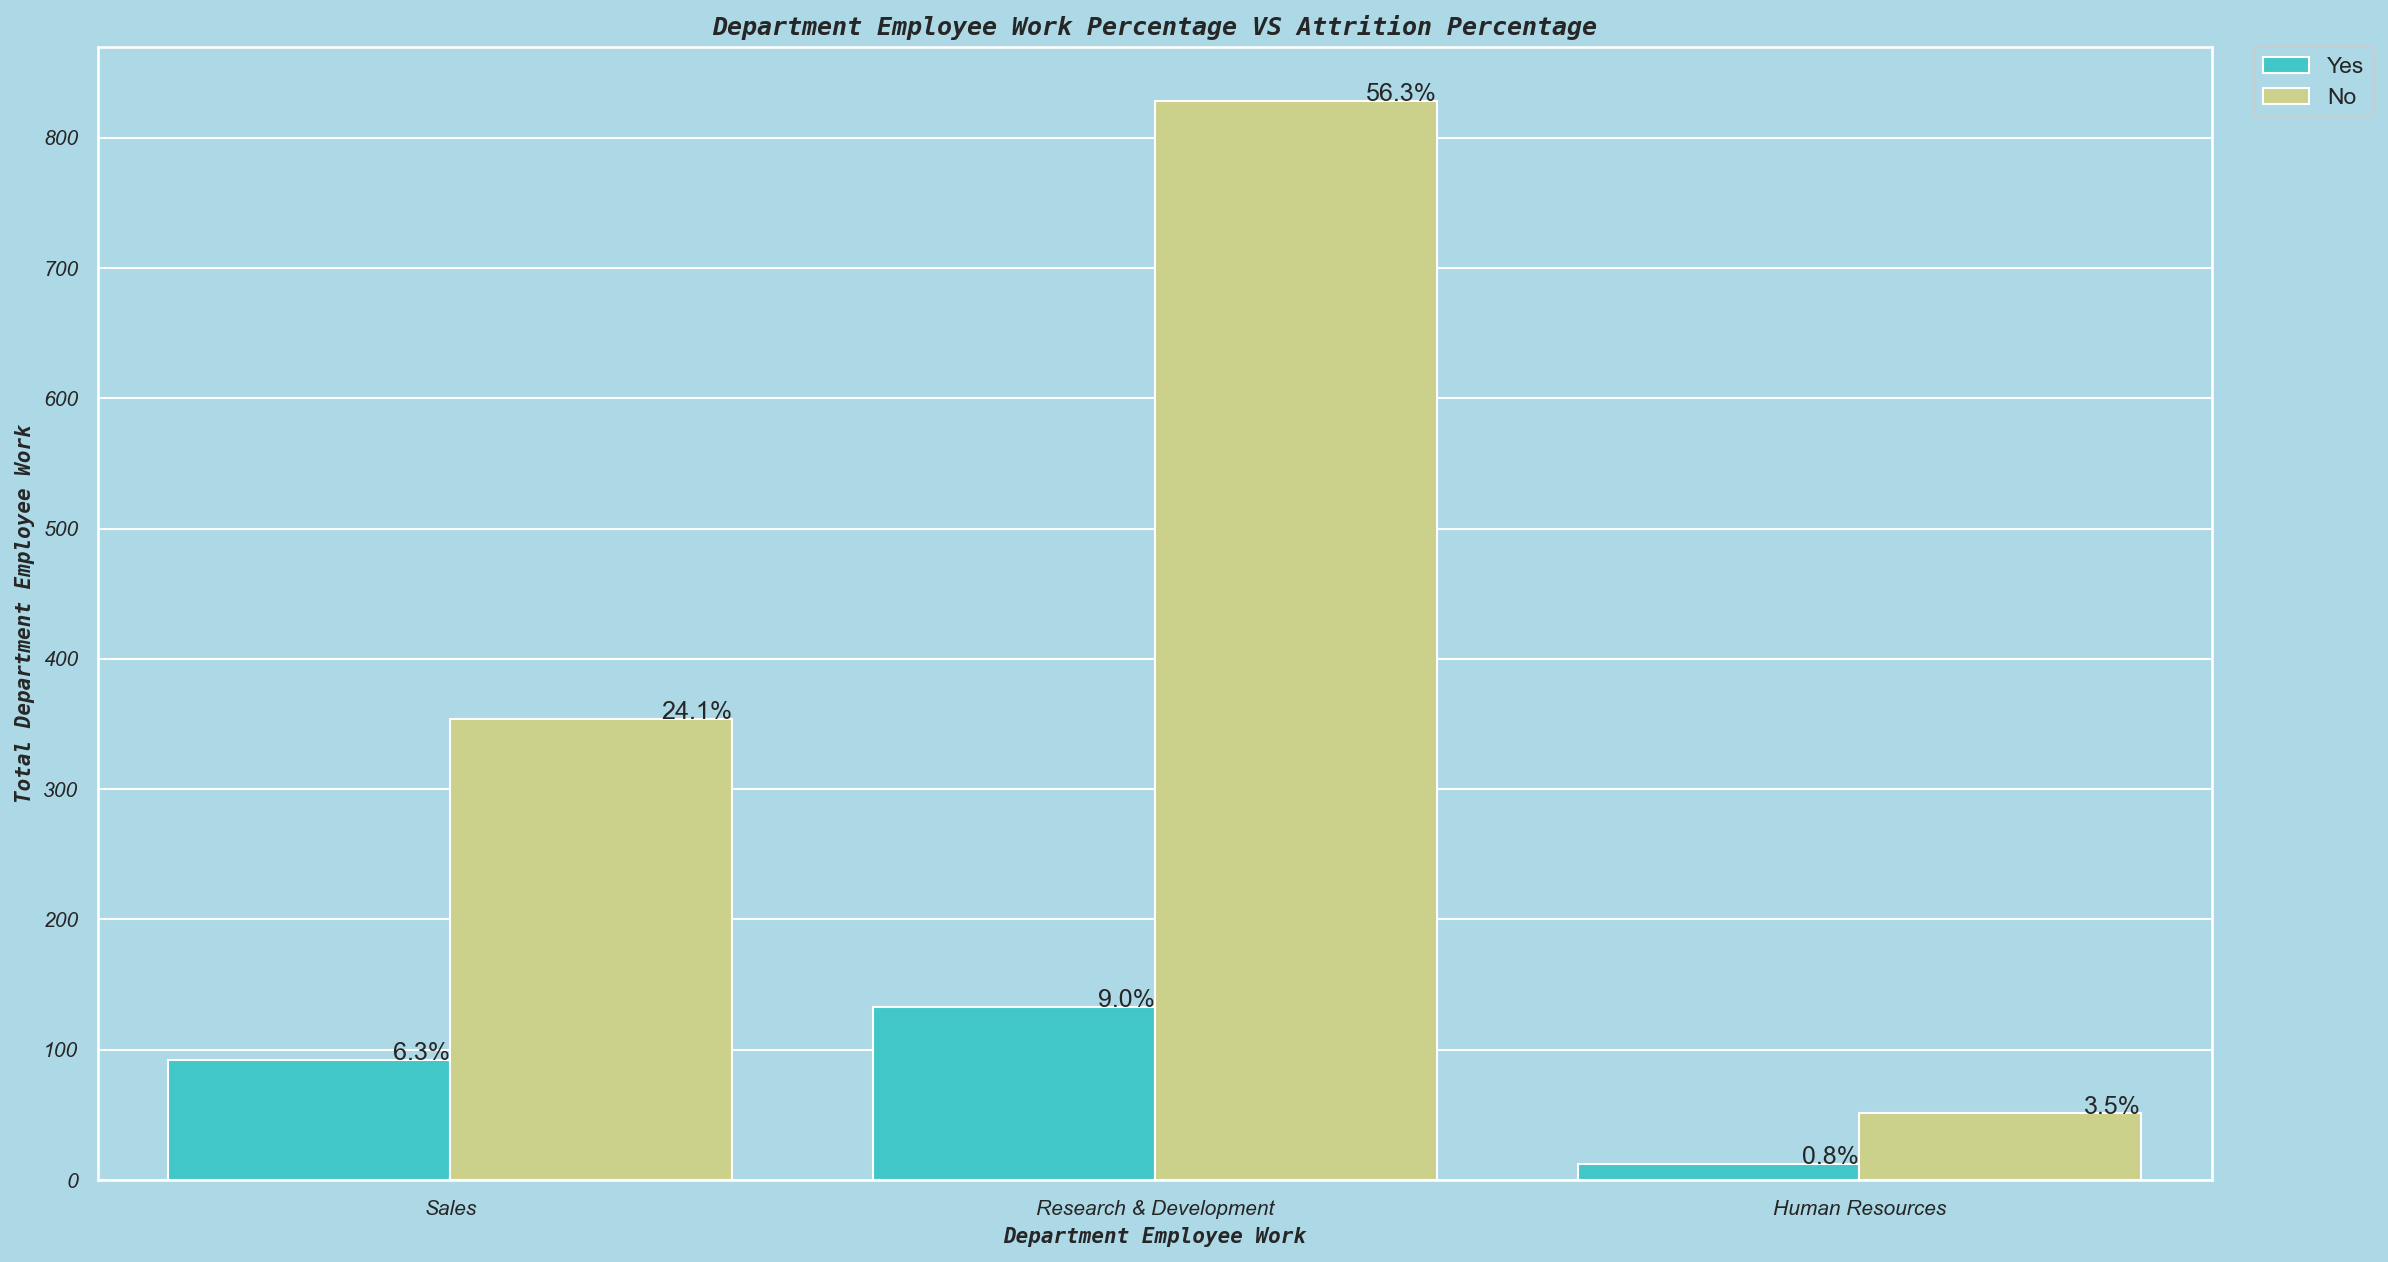

In [55]:
plt.figure(figsize=(18,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='Department', data=df, palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Department Employee Work In Company',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Department Employee Work', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Department Employee Work', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.countplot(x="Department",data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Department Employee Work Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Department Employee Work', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total MDepartment Employee Work', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ax = sns.countplot(x="Department", hue="Attrition", data=df,palette = 'rainbow')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Department Employee Work Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Department Employee Work', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Department Employee Work', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Total karyawan dari departement sales ada 446 orang dengan persentase 30,3%, karyawan yang berasal dari department Research & Development 961 orang dengan persentase 65,4% dan dari department Human Resources sebanyak 63 orang dengan persentase 4,3%.
  - Karyawan yang paling banyak resign berasal dari departement Research & Development dengan persentase 9,0%, sedangkan karyawan yang resign dari department sales ada 6,3% dan karyawan yang resign dari department human resources ada 0,8%.

#### 7. JOB ROLE

1. Jobrole apa yang memiliki persentase tertinggi karyawan resign ?

In [56]:
jobrole2 = pd.crosstab(index=df['JobRole'],columns='count',normalize='columns').round(2)
jobrole3 = pd.crosstab(index=df['JobRole'],columns=df['Attrition'],normalize='all').round(2)
jobrole4 = pd.concat([jobrole2, jobrole3], axis=1, join='inner')
jobrole4.sort_values('Yes',ascending=False)

count    No   Yes
JobRole                                     
Laboratory Technician       0.18  0.13  0.04
Sales Executive             0.22  0.18  0.04
Research Scientist          0.20  0.17  0.03
Sales Representative        0.06  0.03  0.02
Healthcare Representative   0.09  0.08  0.01
Human Resources             0.04  0.03  0.01
Manufacturing Director      0.10  0.09  0.01
Manager                     0.07  0.07  0.00
Research Director           0.05  0.05  0.00

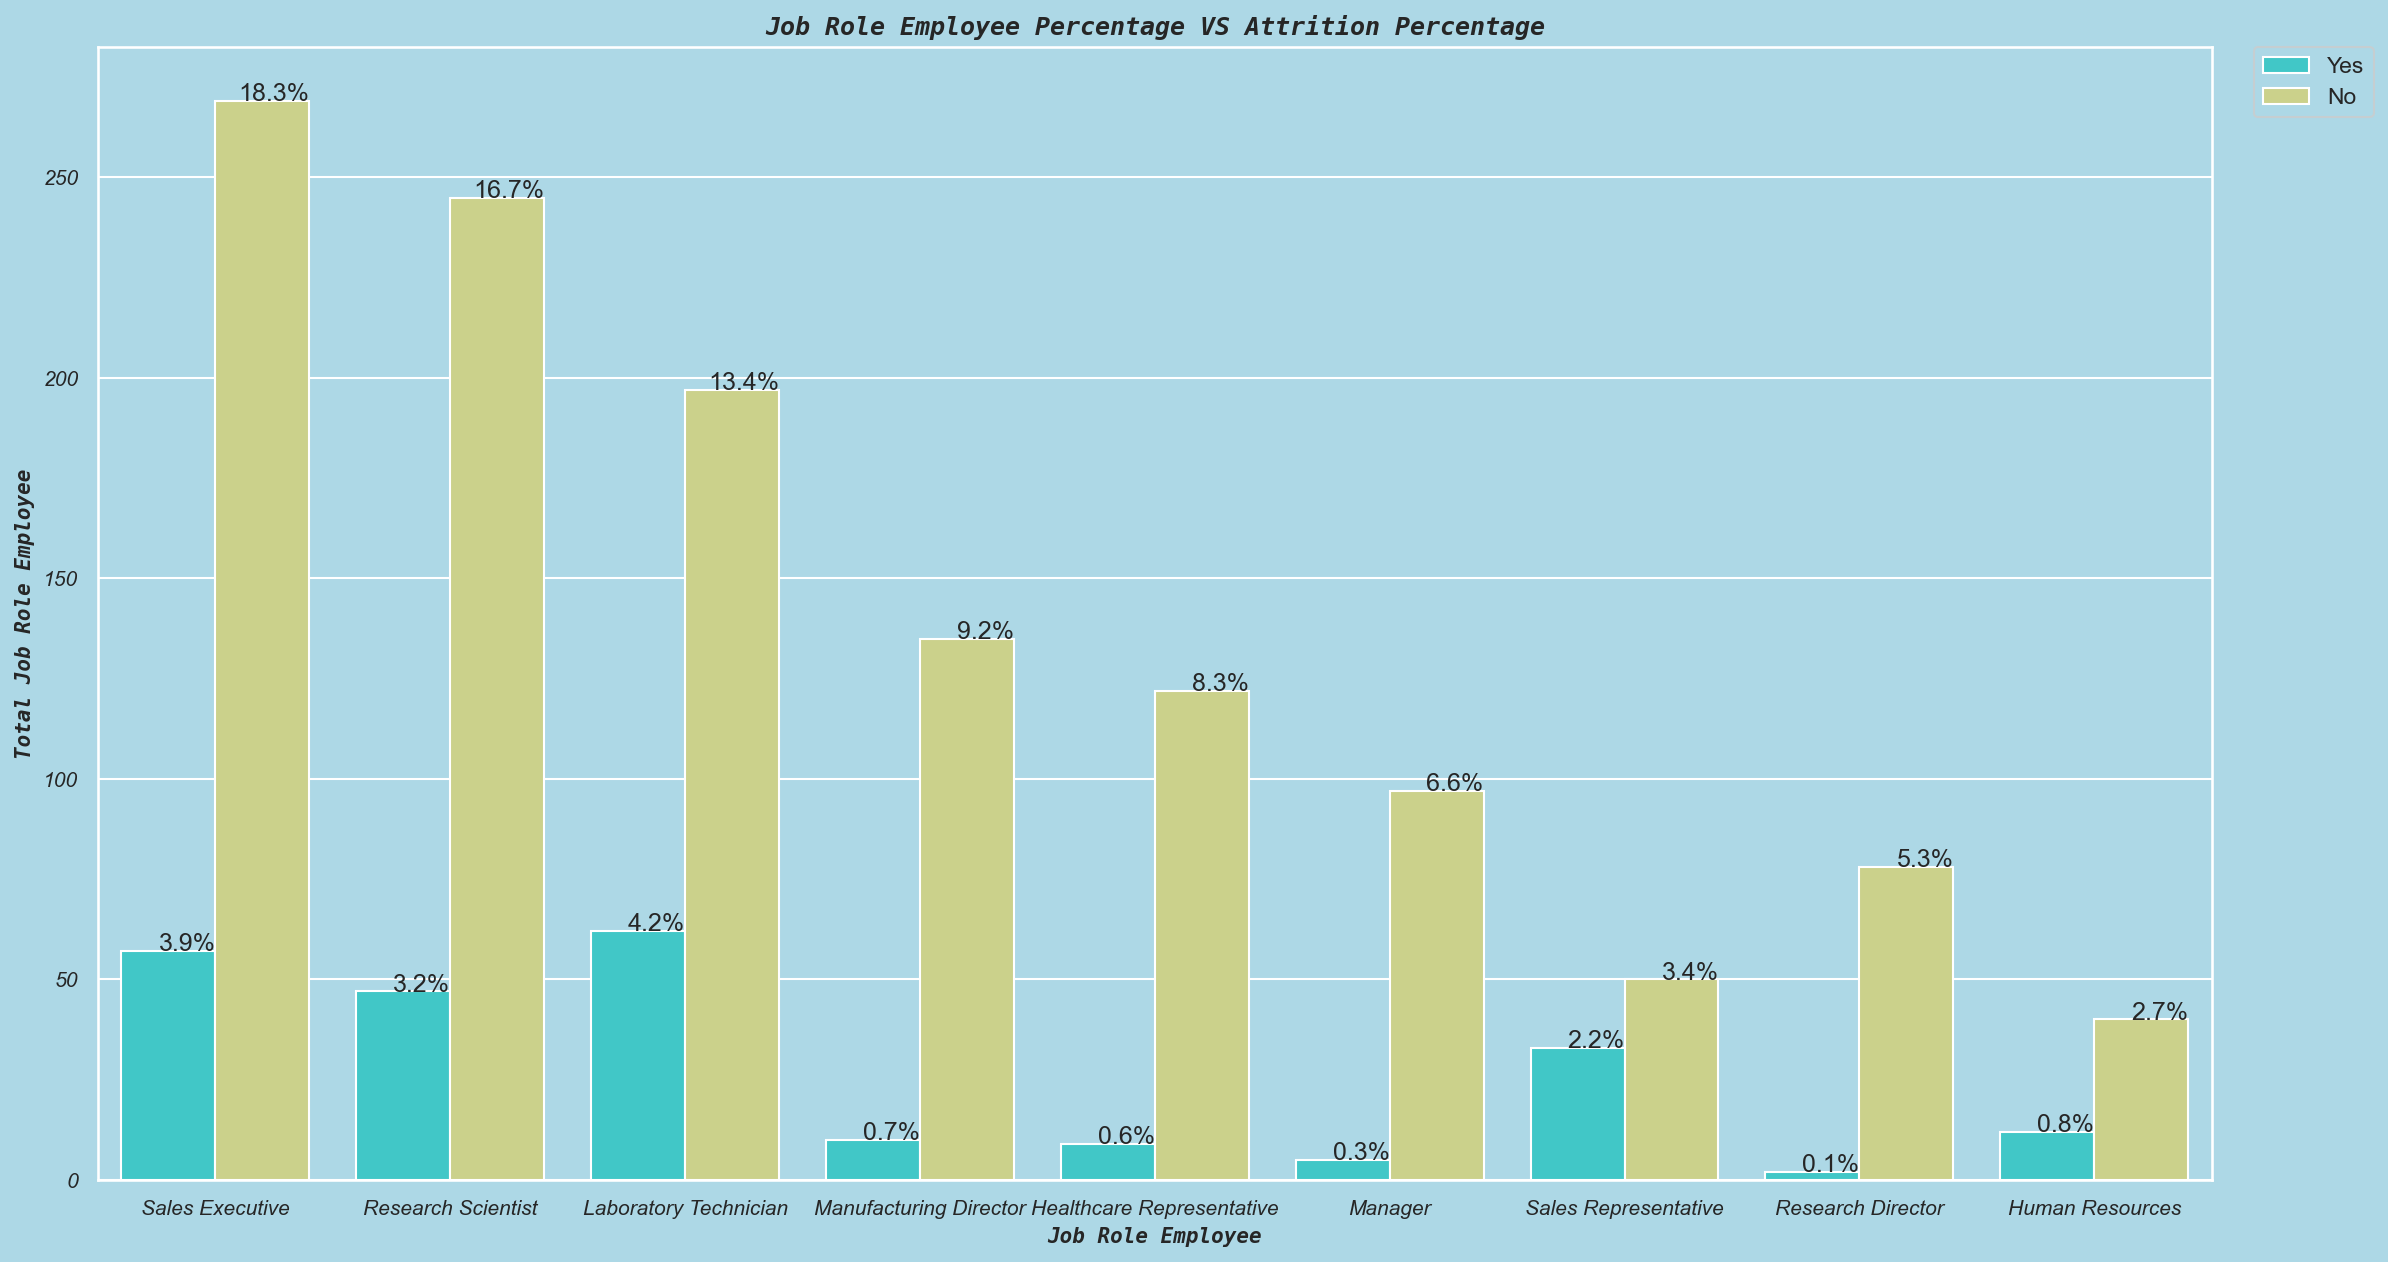

In [57]:
plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ax = sns.countplot(x="JobRole", hue="Attrition", data=df,palette = 'rainbow')
# bx = sns.countplot(x="JobRole", hue="Department", data=df,palette = 'Pastel2')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    # bx.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Job Role Employee Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Job Role Employee', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Job Role Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Dari seluruh karyawan yang paling banyak resign adalah karyawan dengan job role laboratory technician dengan persentase 4,2% yang resign.

#### 8. OVER TIME

1. Berapa total karyawan yang bekerja over time dan tidak bekerja secara over time ?
2. Apakah karyawan yang bekerja overtime lebih banyak resign dari pada karyawan yang tidak bekerja over time ?

In [58]:
overtime = pd.crosstab(index='Over Time',columns=df['OverTime'])
overtime

OverTime     No  Yes
row_0               
Over Time  1054  416

In [59]:
overtime2 = pd.crosstab(index=df['OverTime'],columns='count',normalize='columns').round(2)
overtime3 = pd.crosstab(index=df['OverTime'],columns=df['Attrition'],normalize='all').round(2)
overtime4 = pd.concat([overtime2, overtime3], axis=1, join='inner')
overtime4.sort_values('Yes',ascending=False)

count    No   Yes
OverTime                   
Yes        0.28  0.20  0.09
No         0.72  0.64  0.07

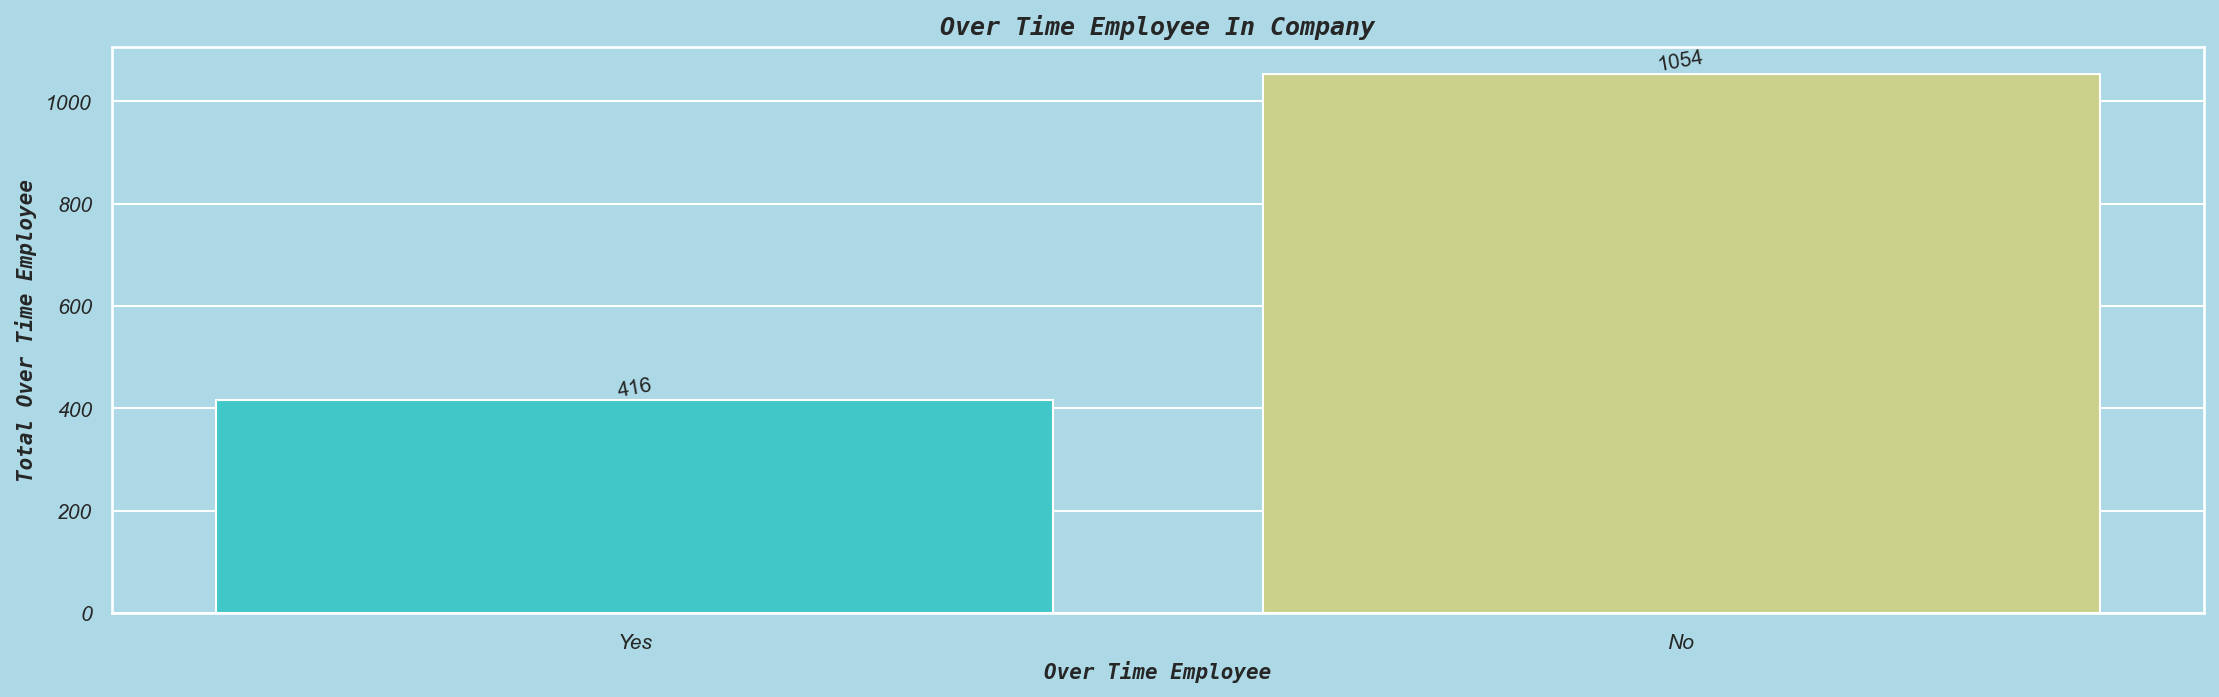

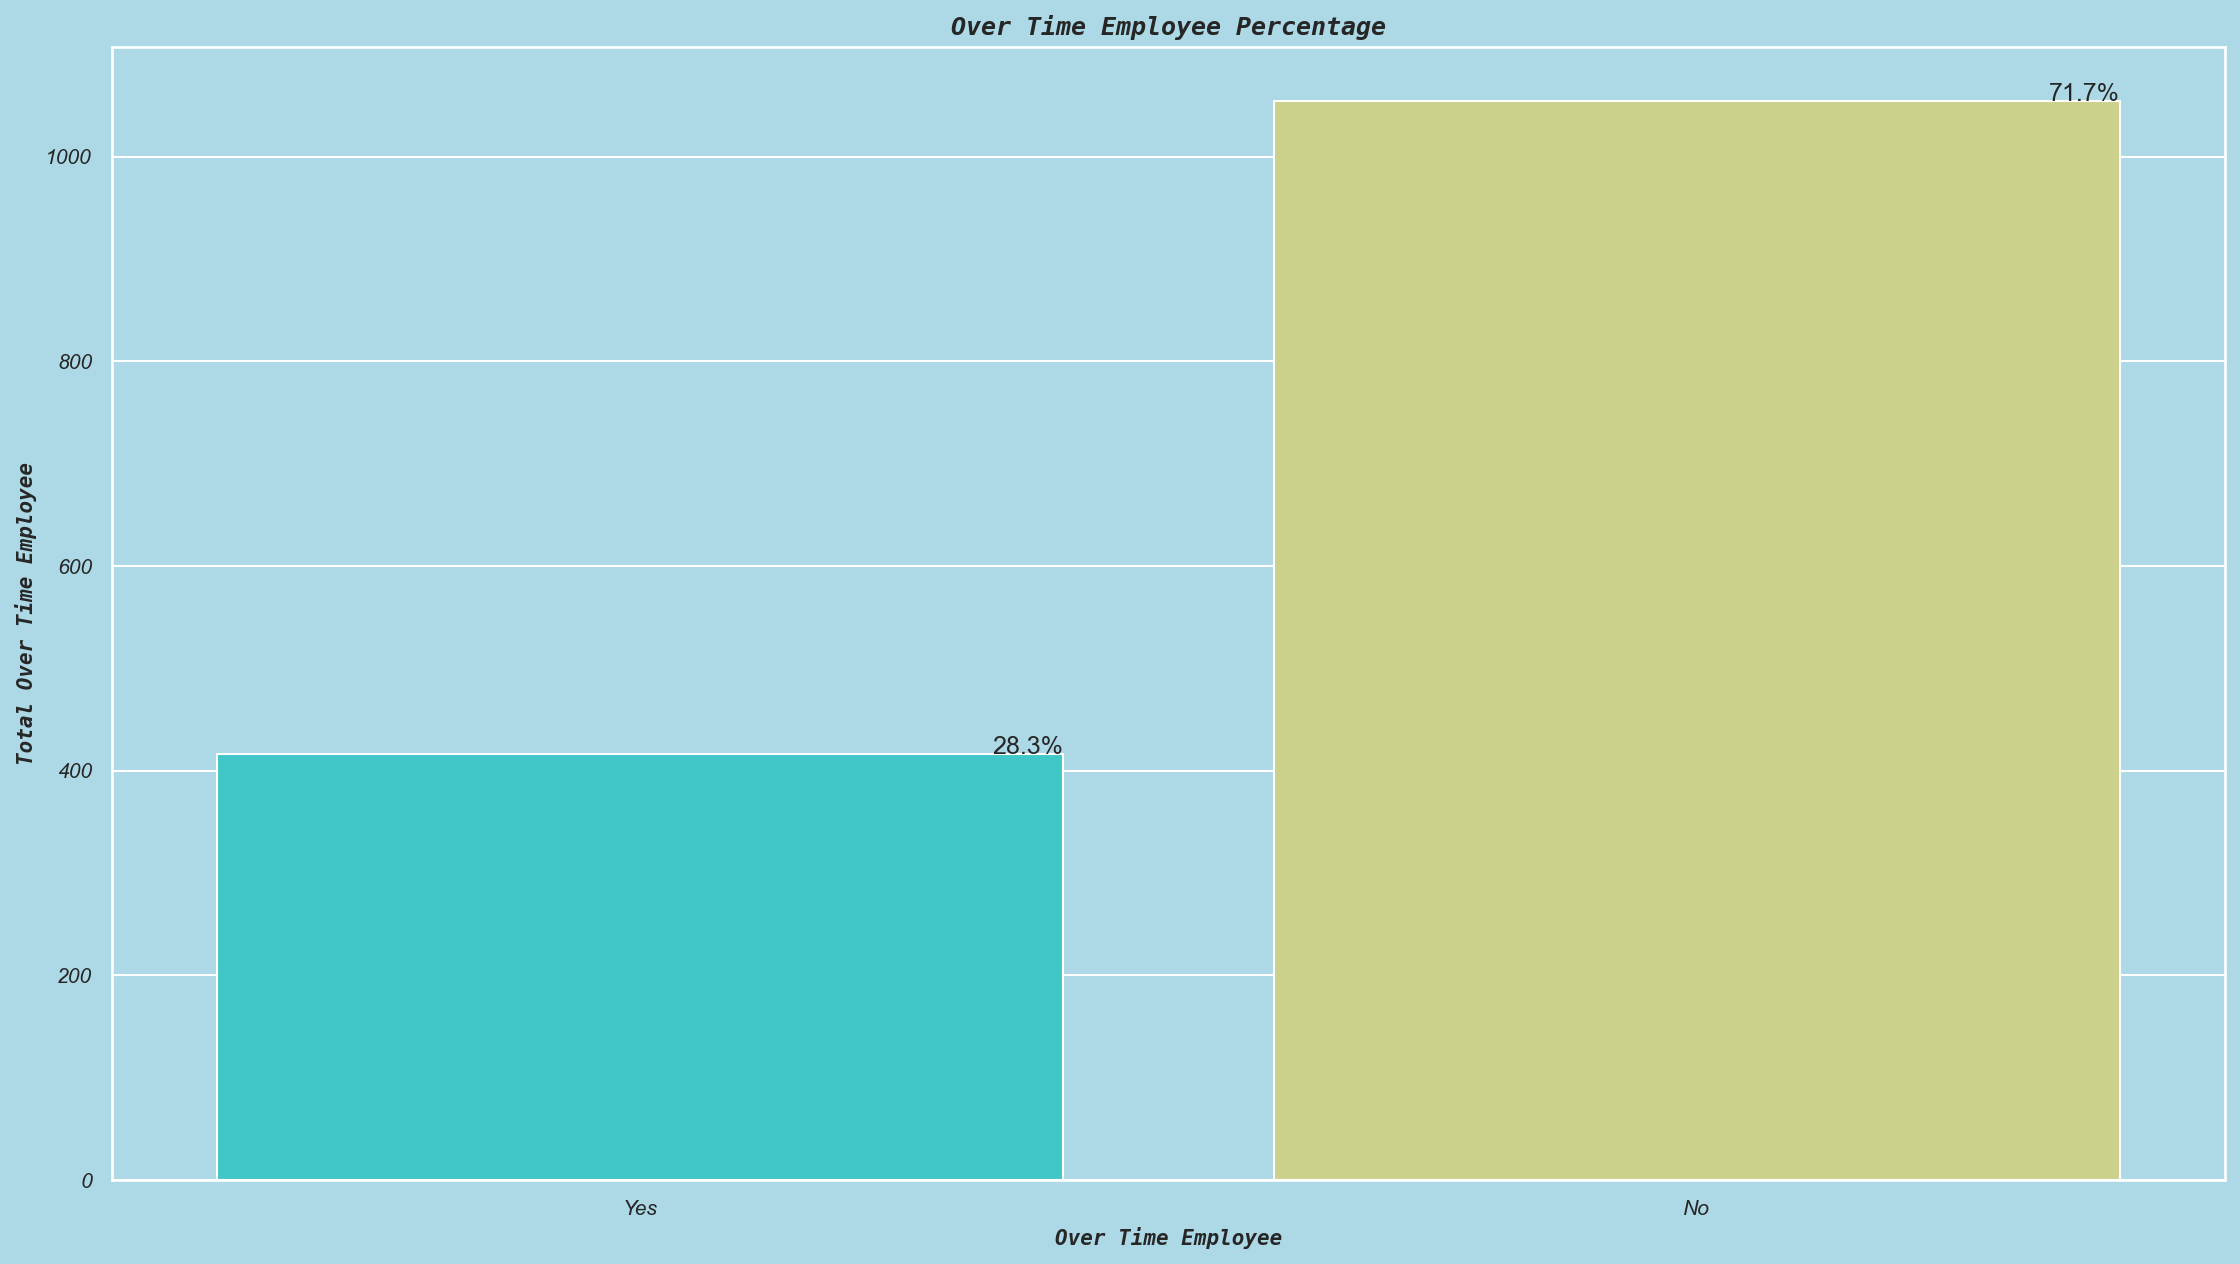

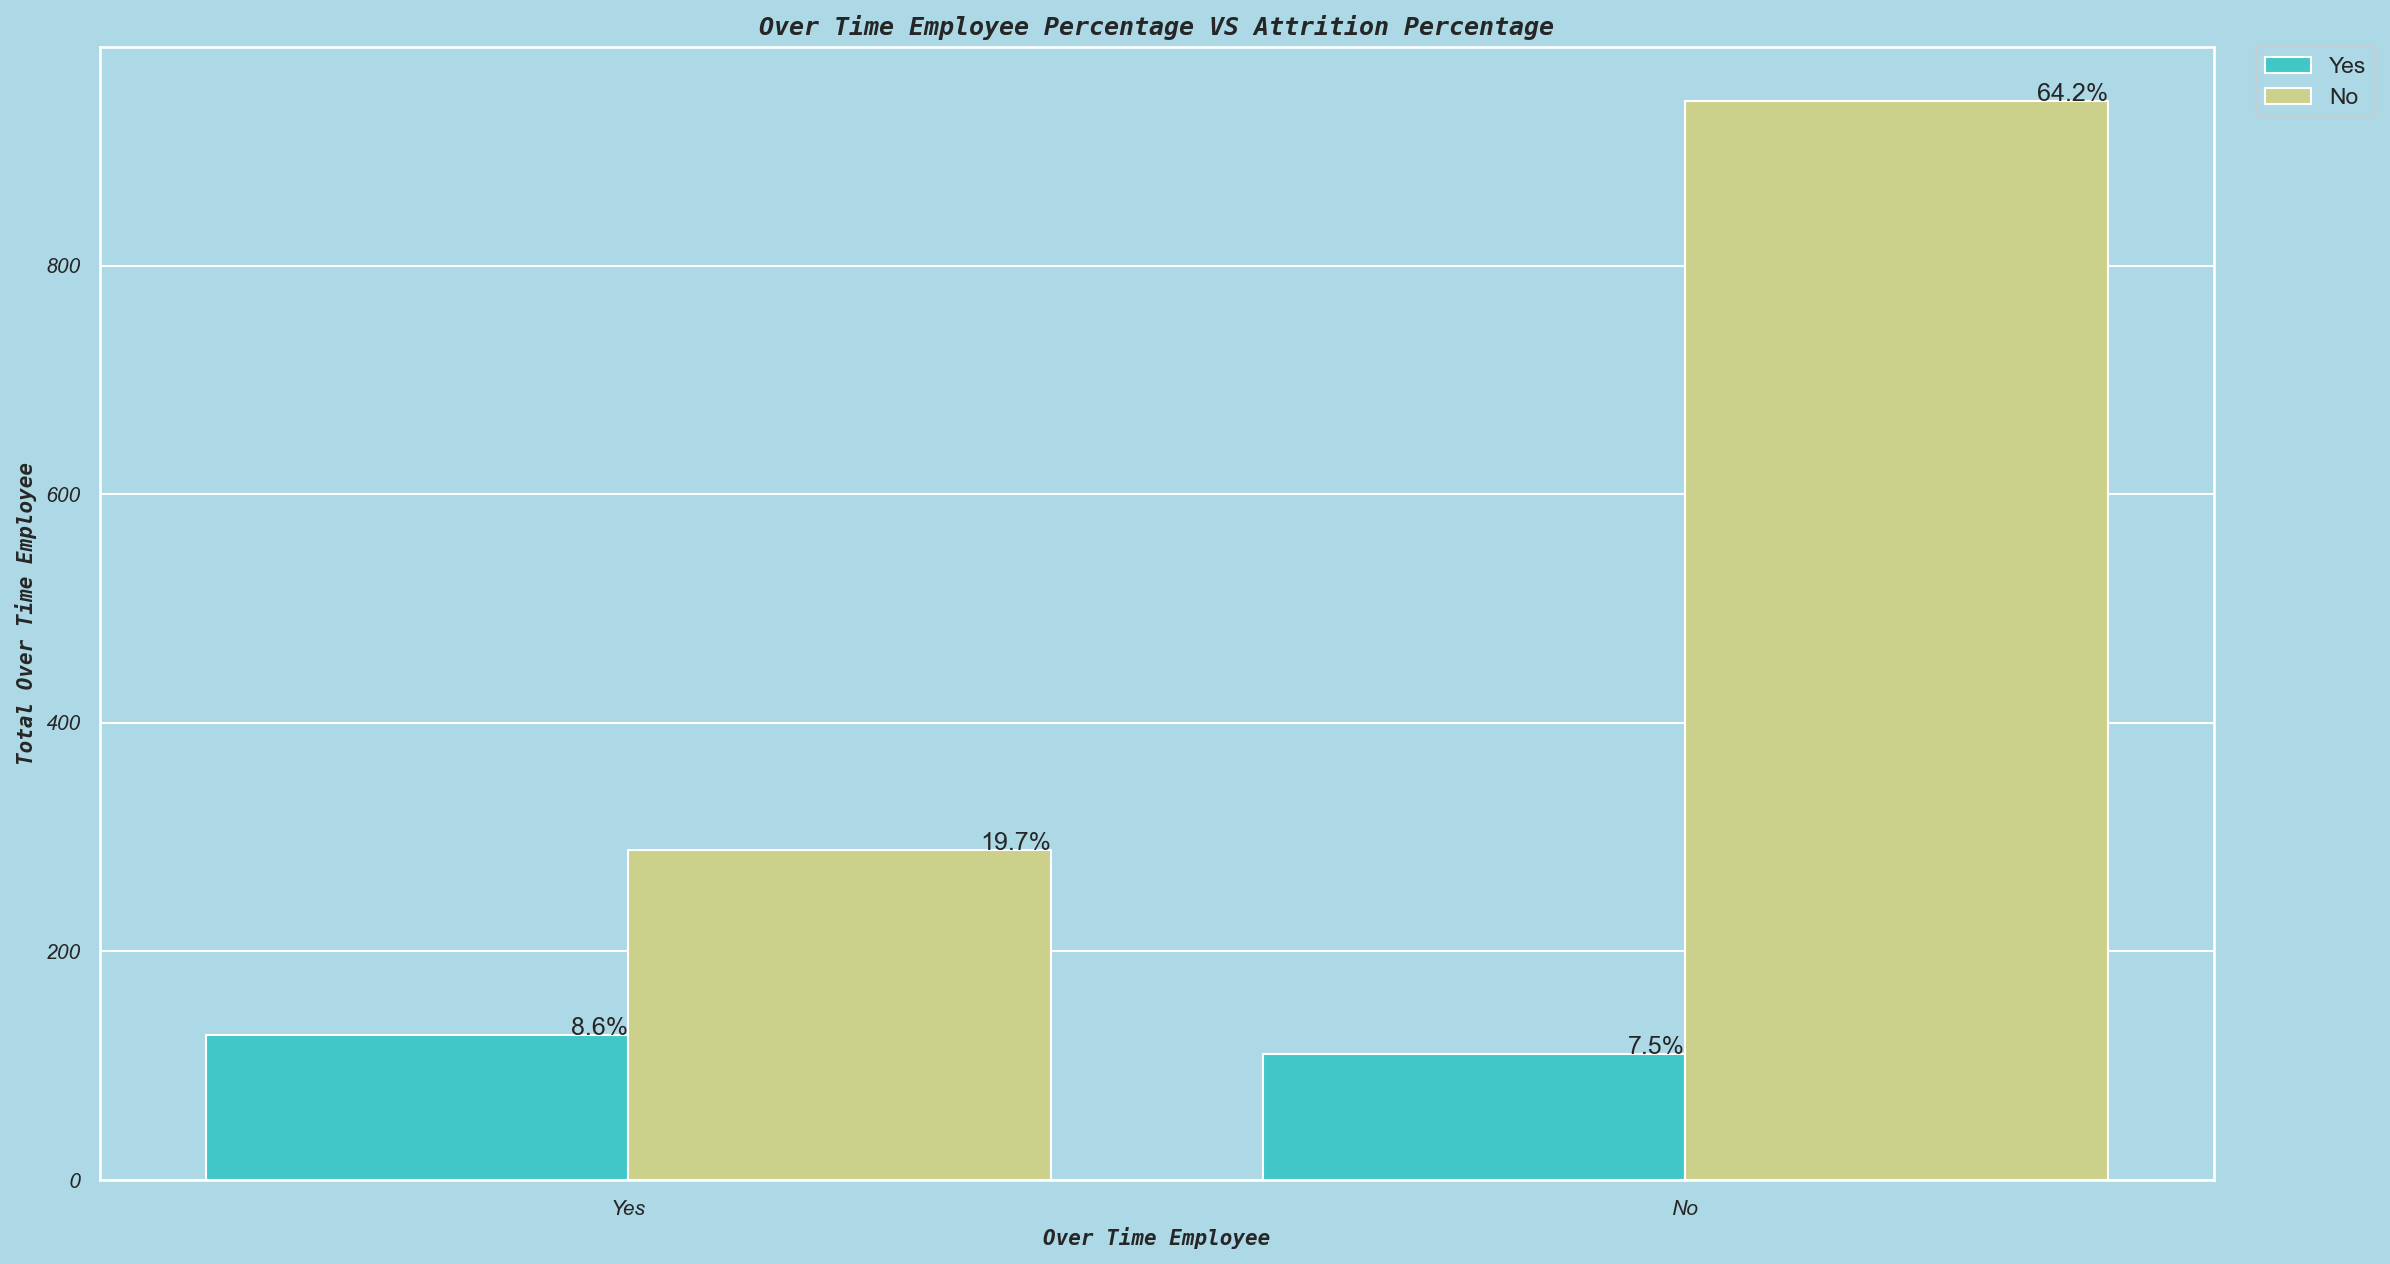

In [60]:
plt.figure(figsize=(18,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='OverTime', data=df, palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Over Time Employee In Company',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Over Time Employee', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Over Time Employee', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.countplot(x="OverTime",data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Over Time Employee Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Over Time Employee', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Over Time Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ax = sns.countplot(x="OverTime", hue="Attrition", data=df,palette = 'rainbow')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Over Time Employee Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Over Time Employee', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Over Time Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Dari 1470 karyawan diperusahaan, ada 416 karyawan yang bekerja over time atau setara 28,3% dan ada 71,7% karyawan yang bekerja tidak overtime.
  - Banyak karyawan yang bekerja overtime memilih resign dengan persentase 8,6%, persentase ini lebih tinggi dari pada karyawan yang resign tapi tidak bekerja overtime yaitu 7,5%.

#### 9. BUSINESS TRAVEL

1. Berapa total karyawan yang resign berdasarkan perjalanan dinas ?

In [61]:
businesstravel2 = pd.crosstab(index=df['BusinessTravel'],columns='count',normalize='columns').round(2)
businesstravel3 = pd.crosstab(index=df['BusinessTravel'],columns=df['Attrition'],normalize='all').round(2)
businesstravel4 = pd.concat([businesstravel2, businesstravel3], axis=1, join='inner')
businesstravel4.sort_values('Yes',ascending=False)

count    No   Yes
BusinessTravel                      
Travel_Rarely       0.71  0.60  0.11
Travel_Frequently   0.19  0.14  0.05
Non-Travel          0.10  0.09  0.01

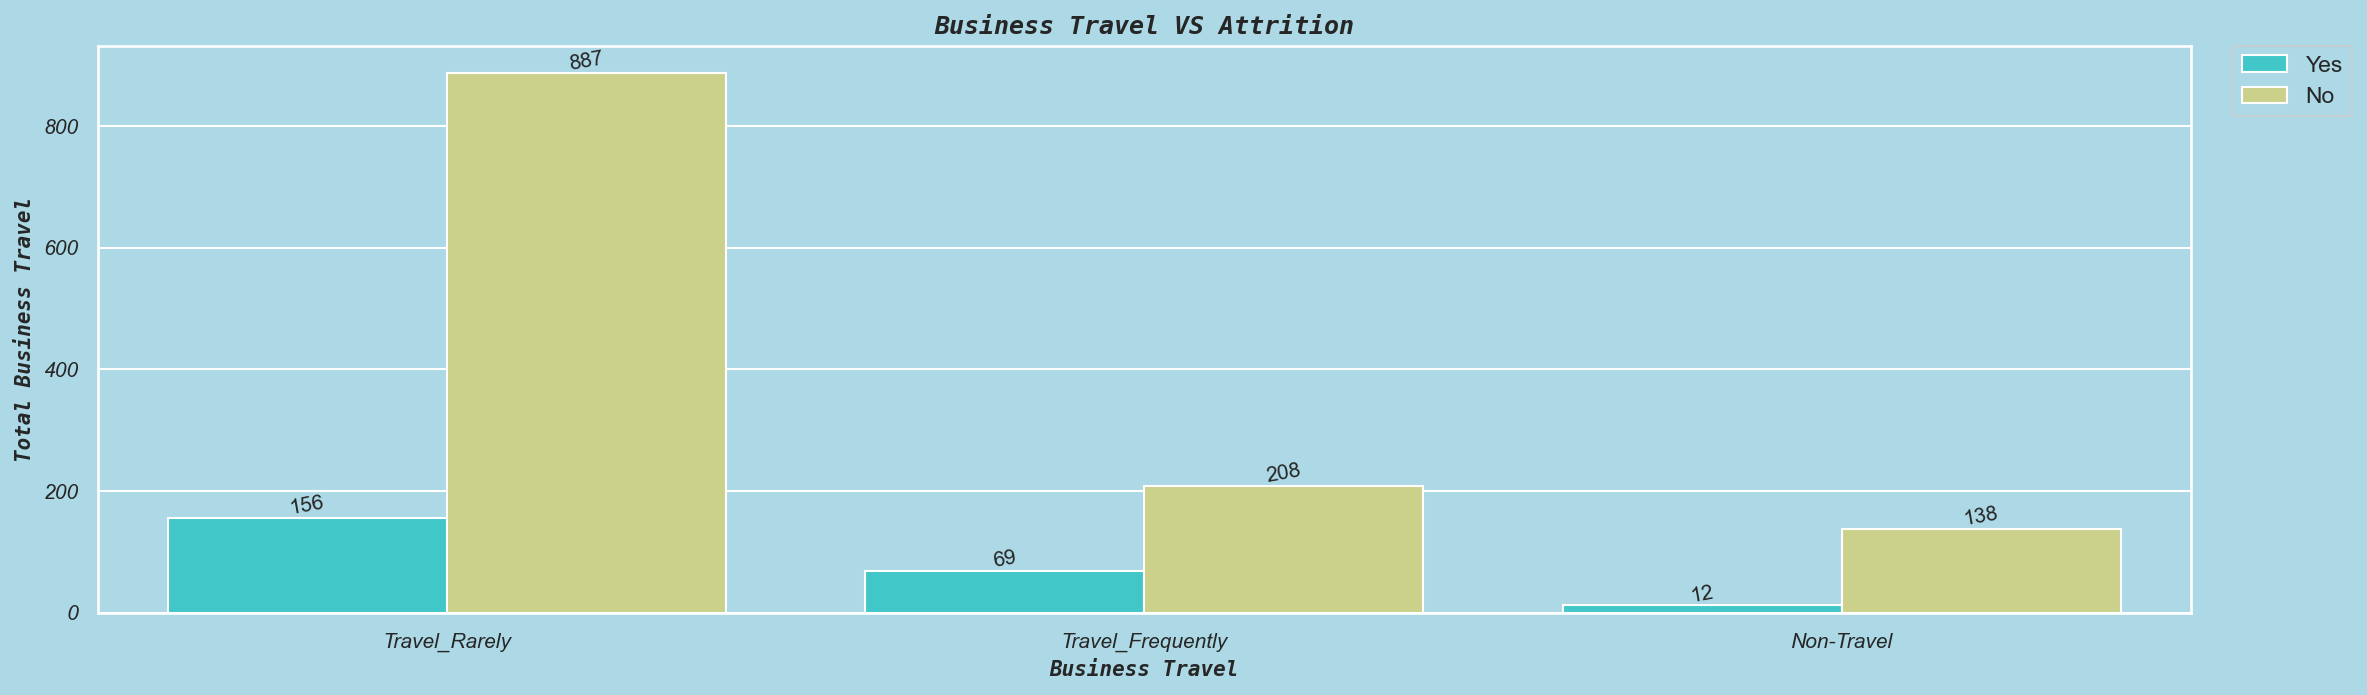

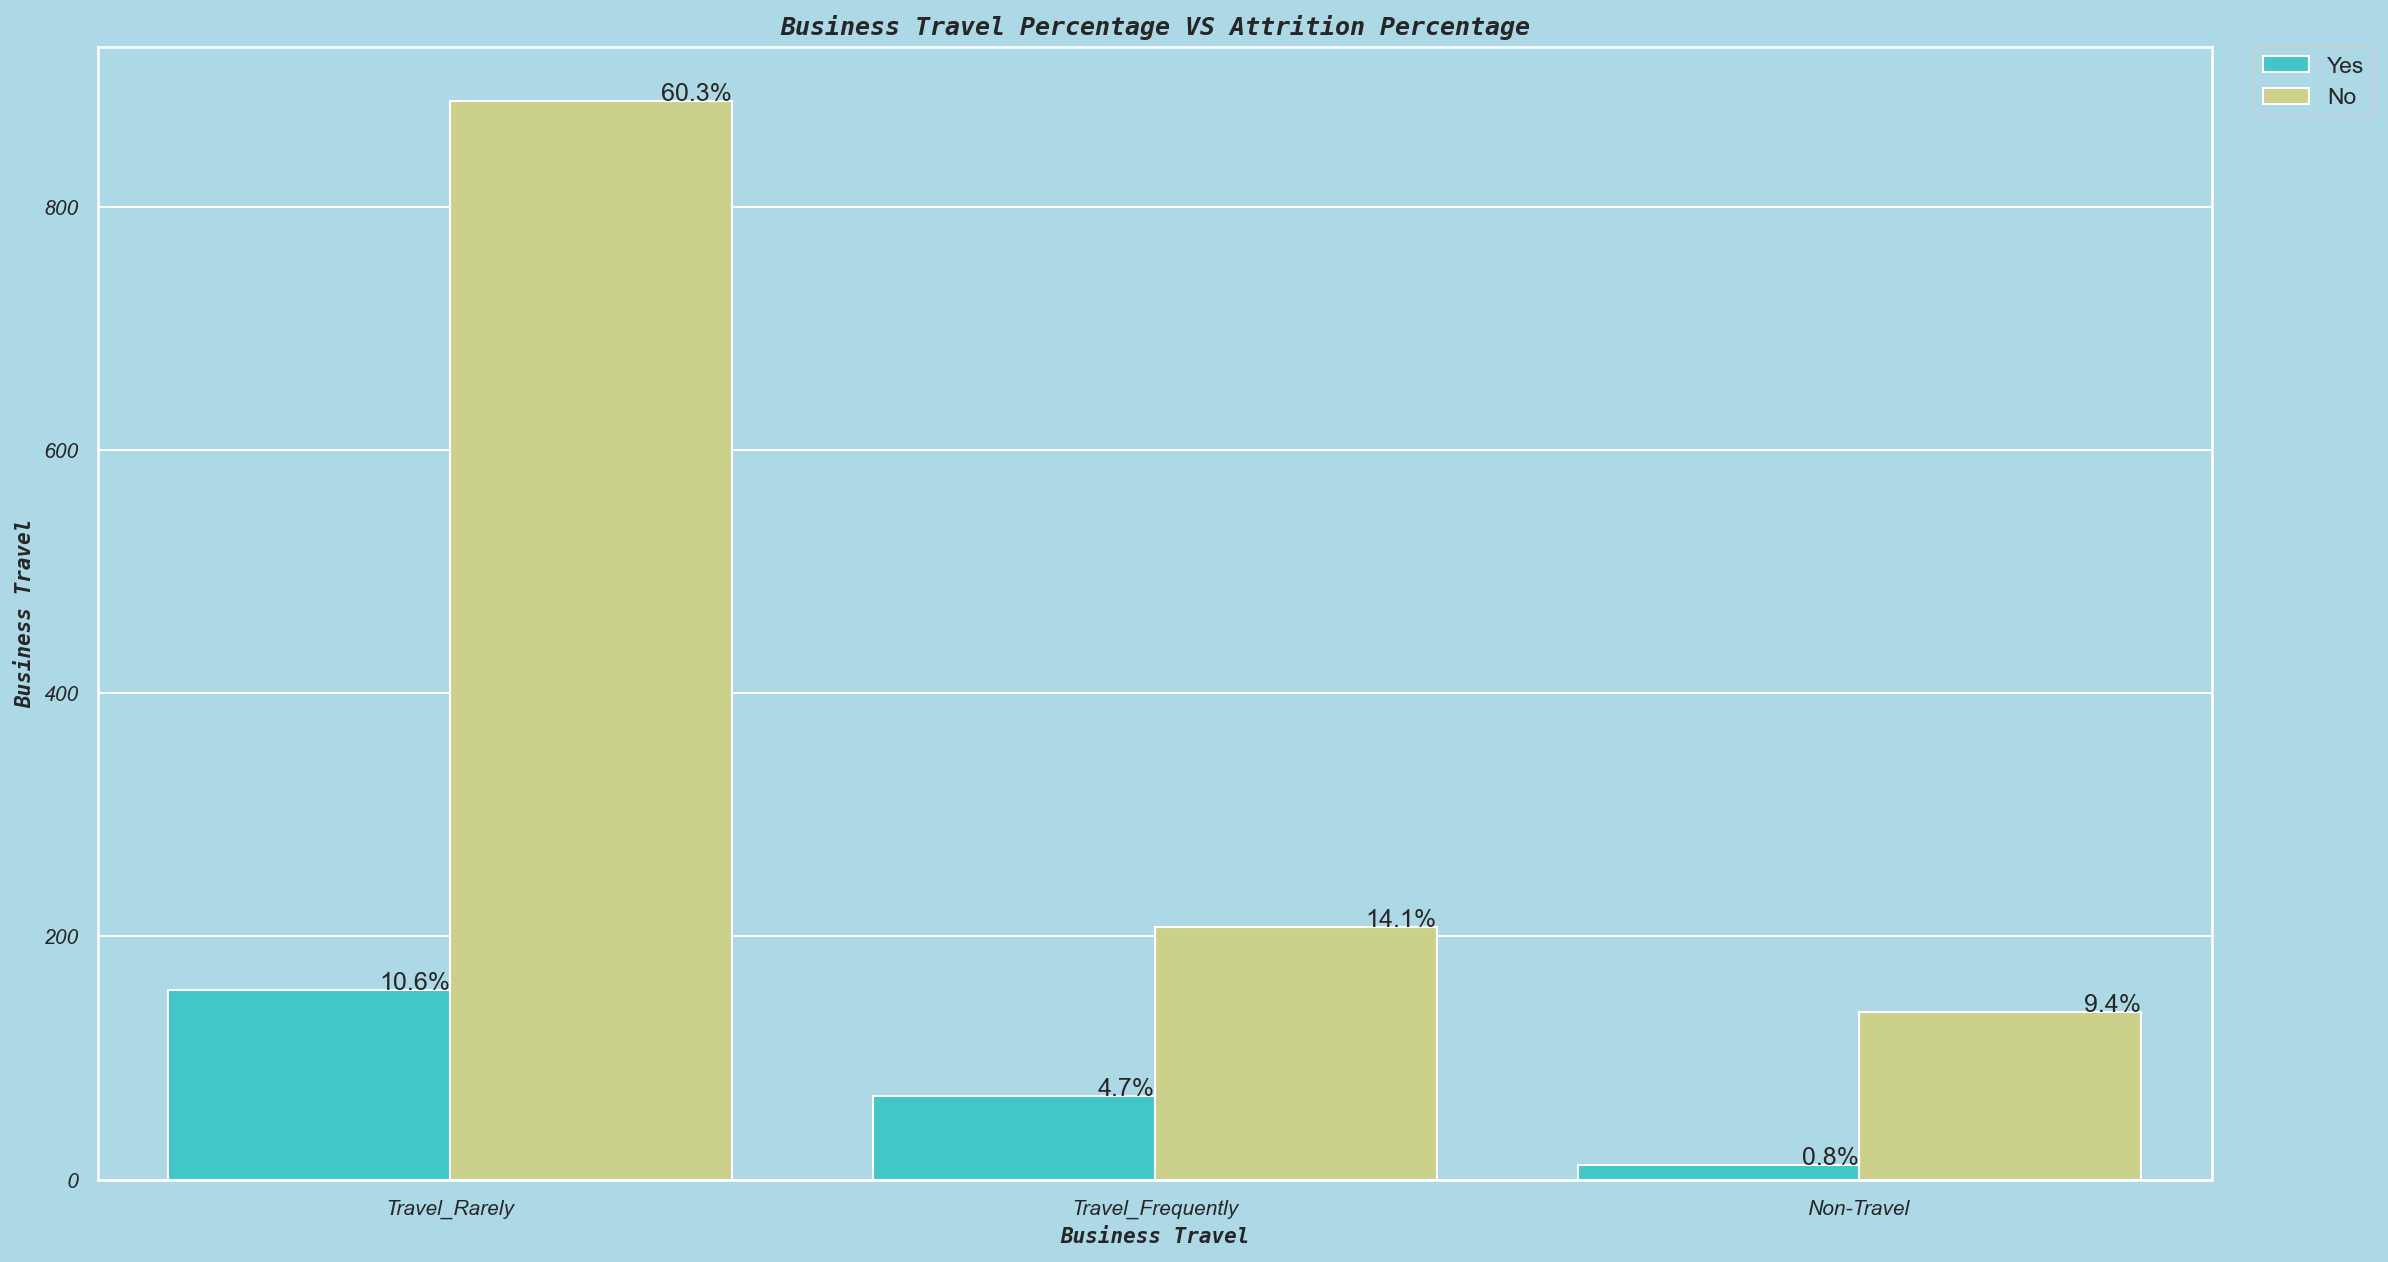

In [62]:
plt.figure(figsize=(18,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='BusinessTravel',hue="Attrition", data=df, palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Business Travel VS Attrition',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Business Travel', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Business Travel', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=df,palette = 'rainbow')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Business Travel Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Business Travel', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Business Travel', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Karyawan yang banyak resign paling banyak berasal dari karyawan yang jarang melakukan perjalan dinas 156 orang dengan persentase 10,6%, karyawan yang sering melakukan perjalanan dinas yang resign sebanyak 69 orang dengan persetase 4,7% dan karyawan yang tidak pernah melakukan perjalan dinas yang resign ada 12 orang dengan persentase 0,8%.

#### 10. Performance Rating

1. Berapa total karyawan yang resign berdasarkan perfoma rating ?
2. Pada perfoma rating apa karyawan banyak resign?

In [63]:
perfomancerating = pd.crosstab(index=df['PerformanceRating'],columns='count')
perfomancerating

col_0              count
PerformanceRating       
3                   1244
4                    226

In [64]:
perfomancerating2 = pd.crosstab(index=df['PerformanceRating'],columns='count',normalize=True).round(2)
perfomancerating3 = pd.crosstab(index=df['PerformanceRating'],columns=df['Attrition'],normalize=True).round(2)
perfomancerating4 = pd.concat([perfomancerating2, perfomancerating3], axis=1, join='inner')
perfomancerating4.sort_values('Yes',ascending=False)

count    No   Yes
PerformanceRating                   
3                   0.85  0.71  0.14
4                   0.15  0.13  0.03

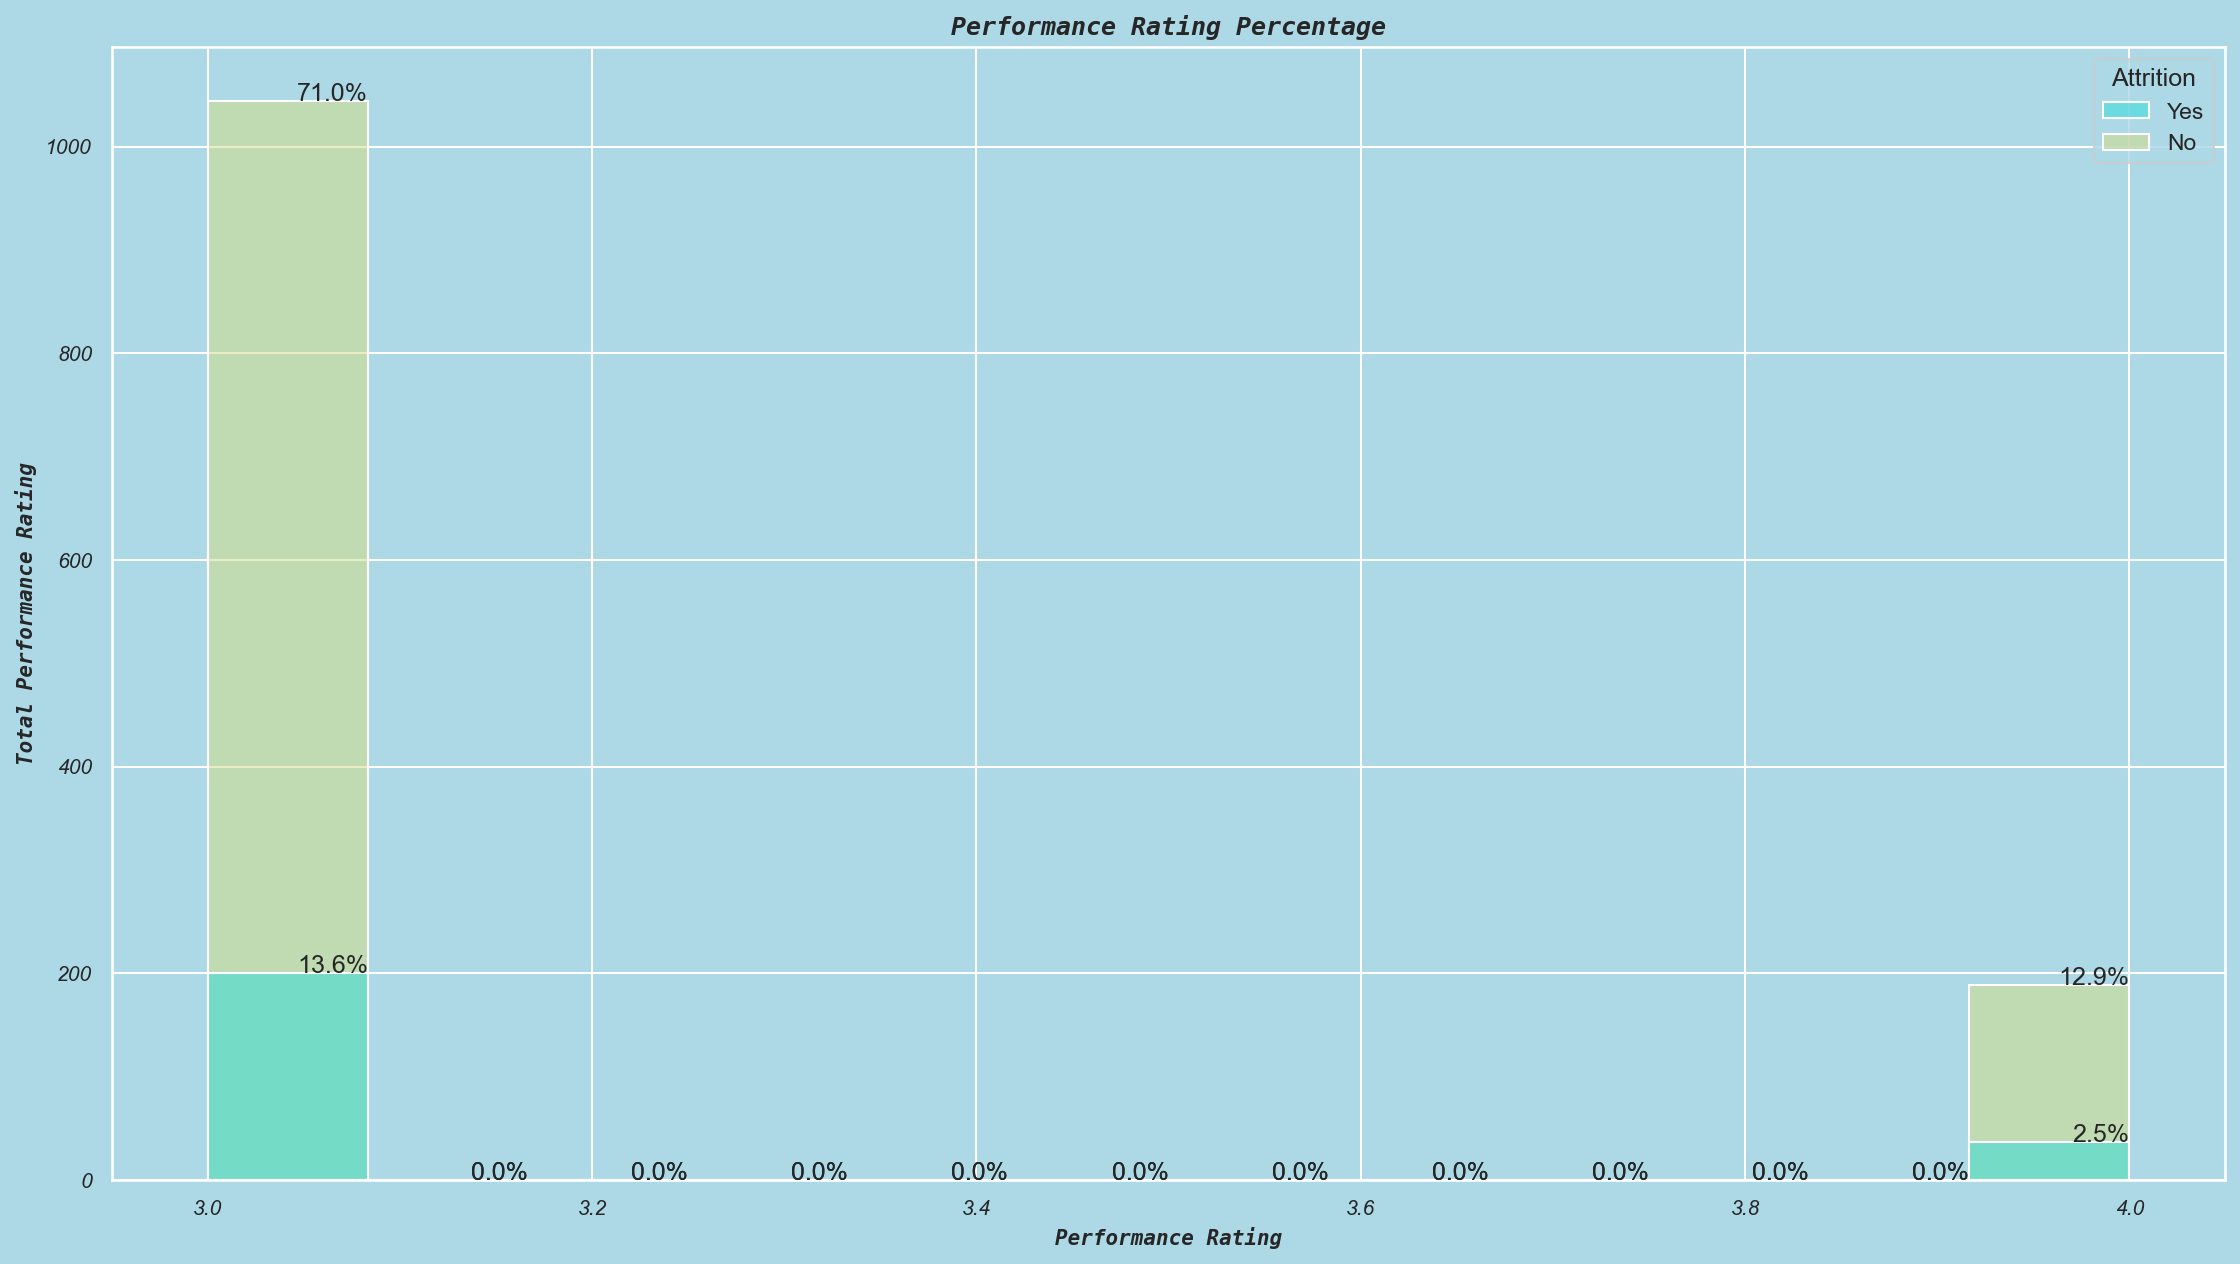

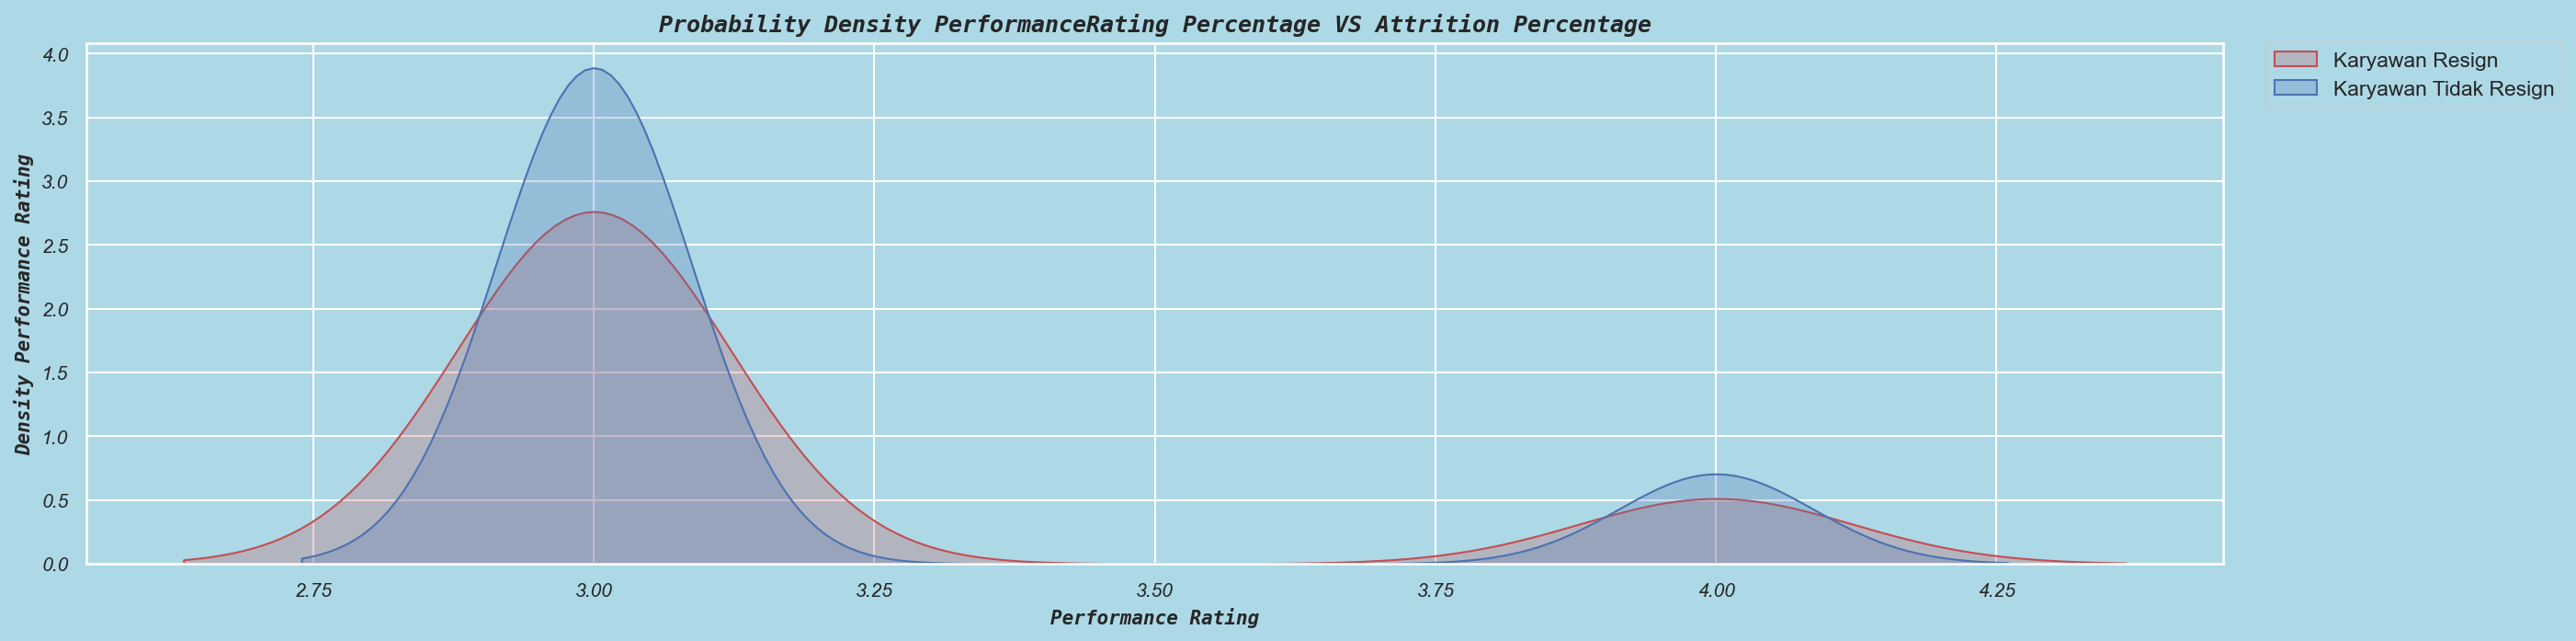

In [65]:
plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.histplot(x="PerformanceRating",hue='Attrition',data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Performance Rating Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Performance Rating', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Performance Rating', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['PerformanceRating'] 
df_no=df[df[ 'Attrition']=='No']['PerformanceRating'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density PerformanceRating Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Performance Rating', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Performance Rating', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Karyawan yang resign paling banyak dari perfoma yang bagus sebanyak 13,6% sedangkan karyawan dengan perfoma sangat bagus memiliki persentase resign lebih sedikit dengan persentase 2,5%.
  - Jika dilihat dari distribusi data, karyawan yang resign banyak pada perfoma rating 3 atau performa yang bagus dan mulai menurun tingkat karyawan resign pada performa yang sangat bagus.

#### 11. STOCK OPTION LEVEL

1. Apakah karyawan yang resign paling banyak karena tidak mendapatkan stock option level ?

In [66]:
stockoptionlevel = pd.crosstab(index=df['StockOptionLevel'],columns='count')
stockoptionlevel

col_0             count
StockOptionLevel       
0                   631
1                   596
2                   158
3                    85

In [67]:
stockoptionlevel2 = pd.crosstab(index=df['StockOptionLevel'],columns='count',normalize=True).round(2)
stockoptionlevel3 = pd.crosstab(index=df['StockOptionLevel'],columns=df['Attrition'],normalize=True).round(2)
stockoptionlevel4 = pd.concat([stockoptionlevel2, stockoptionlevel3], axis=1, join='inner')
stockoptionlevel4.sort_values('Yes',ascending=False)

count    No   Yes
StockOptionLevel                   
0                  0.43  0.32  0.10
1                  0.41  0.37  0.04
2                  0.11  0.10  0.01
3                  0.06  0.05  0.01

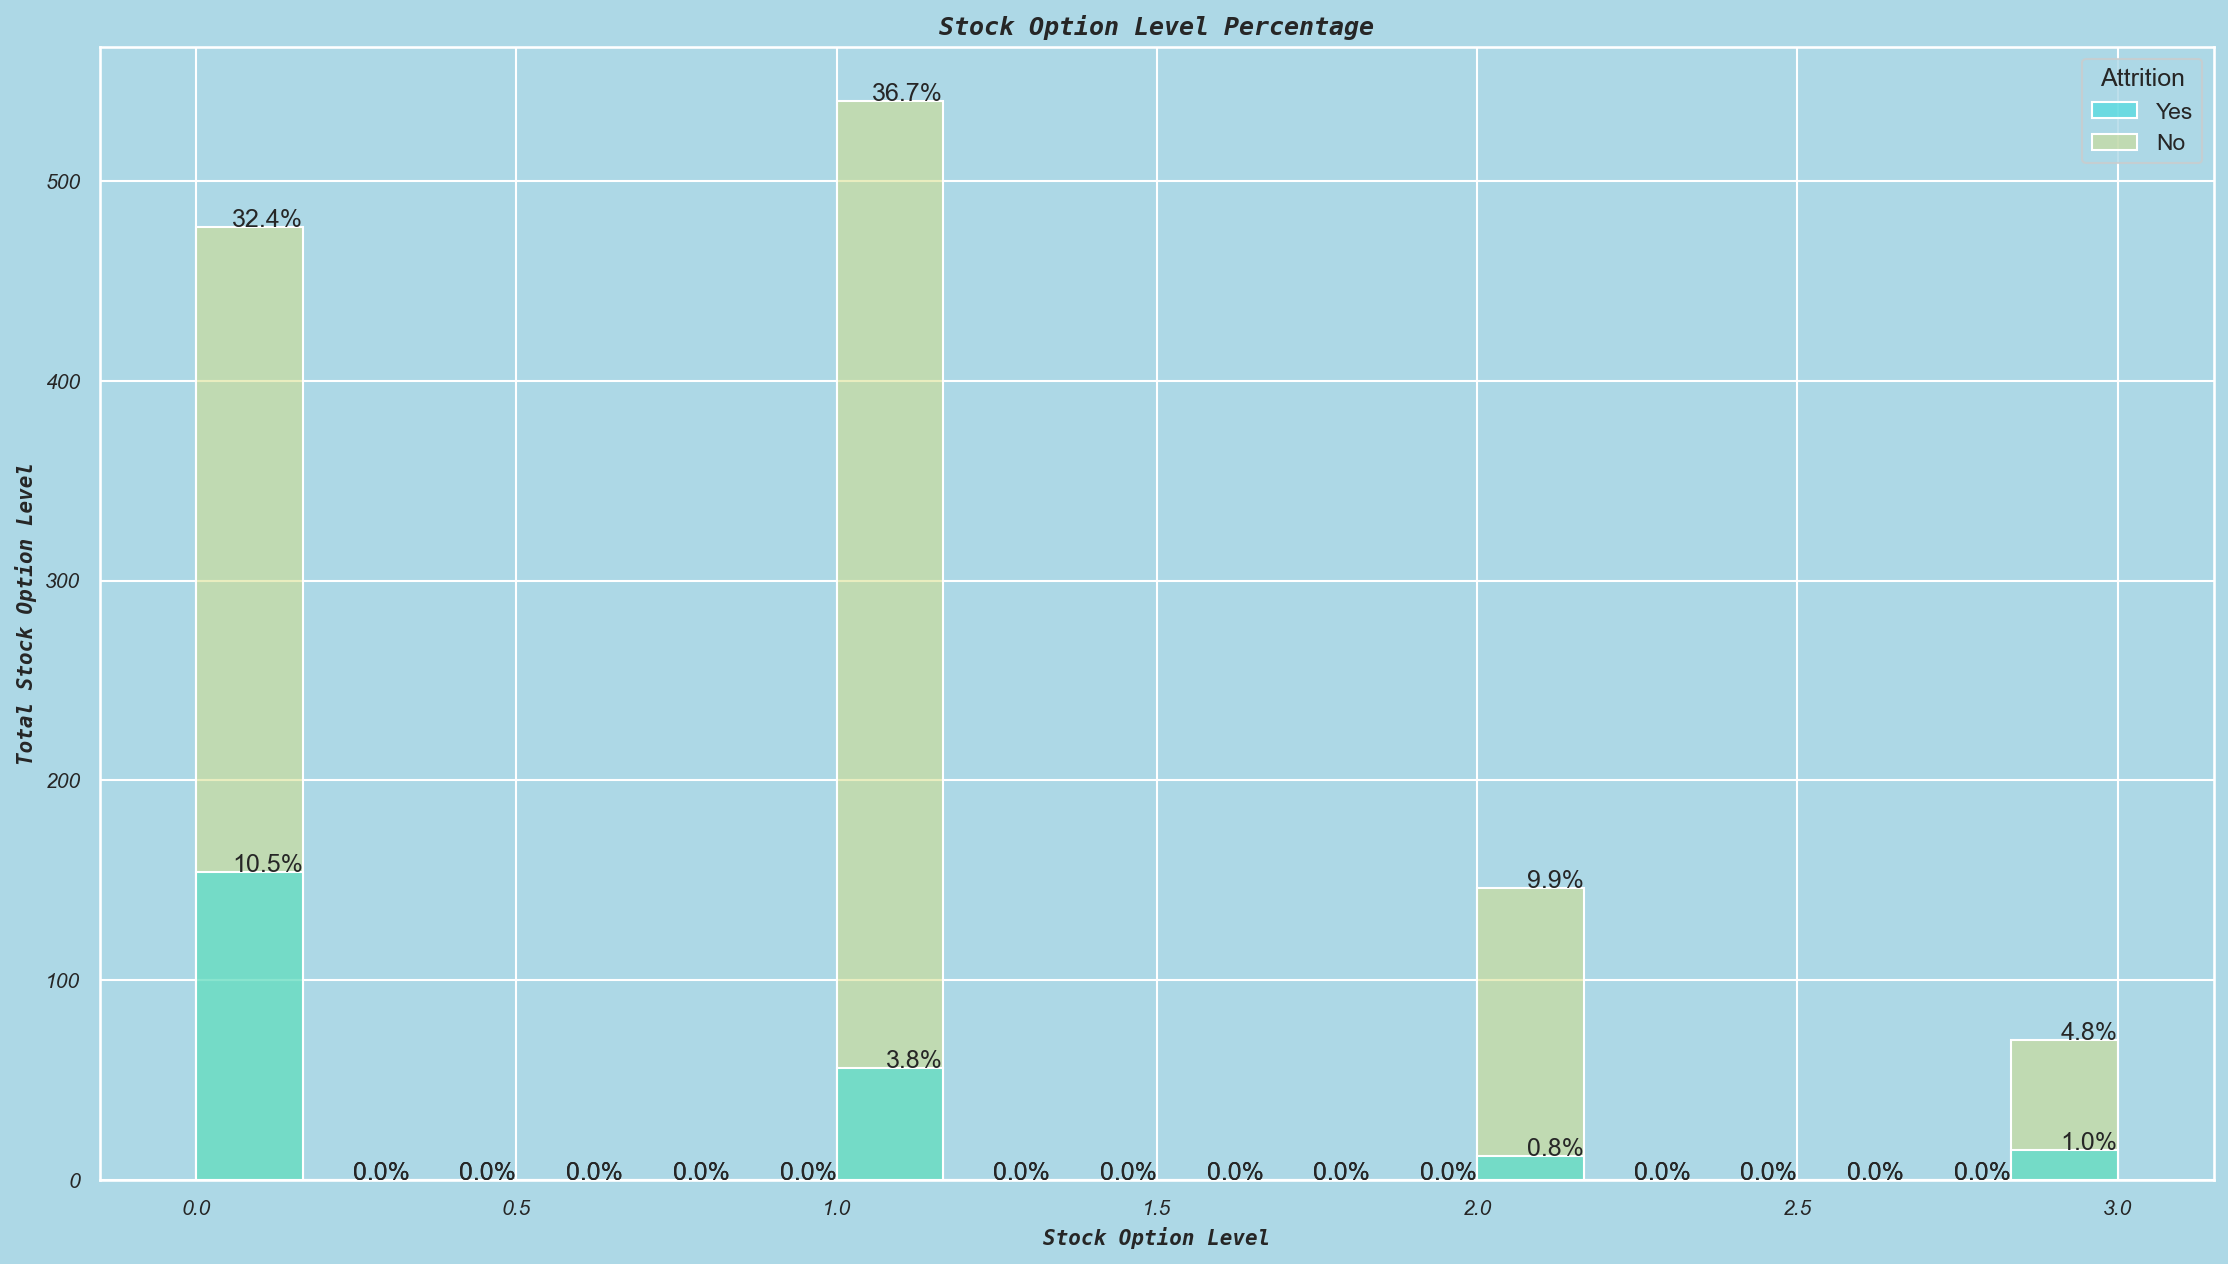

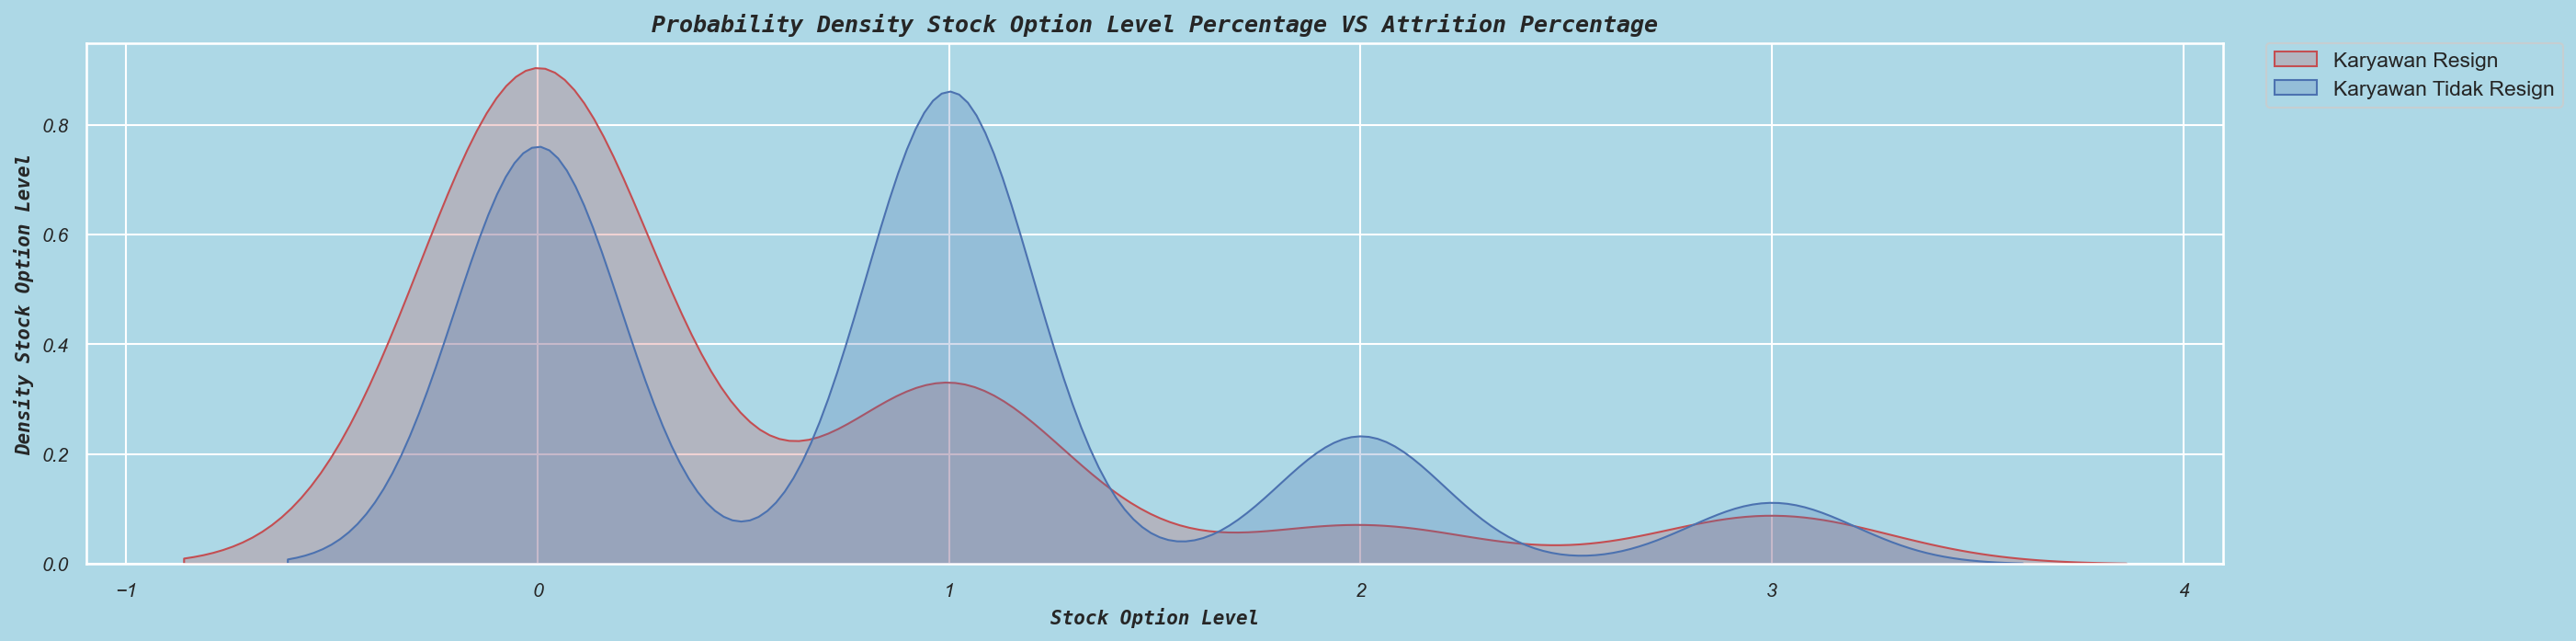

In [68]:
plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.histplot(x="StockOptionLevel",hue='Attrition',data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Stock Option Level Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Stock Option Level', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Stock Option Level', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()


plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['StockOptionLevel'] 
df_no=df[df[ 'Attrition']=='No']['StockOptionLevel'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Stock Option Level Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Stock Option Level', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Stock Option Level', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Banyak karyawan yang resign yang tidak mendapatkan stock opname level dengan persentase 10,5%, sedangkan karyawan yang mendapatkan stock opname level pada level 1 ada 3,8%, untuk stock opname level pada level 2 sebanyak 0,8% dan stock opname level pada level 3 sebesar 1%.
  - Jika dilihat dari distribusi data, karyawan yang resign banyak dari karyawan yang sama sekali tidak mendapatkan pembagian saham, sedangkan karyawan yang mendapatkan pembagian saham lebih banyak untuk tidak resign.

#### 12.  JOB INVOLVEMENT

1. Berapa banyak karyawan yang resign berdasarkan Job Involvement dan apa yang menyebabkan karyawan paling banyak resign ?

In [69]:
JobInvolvement = pd.crosstab(index=df['JobInvolvement'],columns='count')
JobInvolvement

col_0           count
JobInvolvement       
1                  83
2                 375
3                 868
4                 144

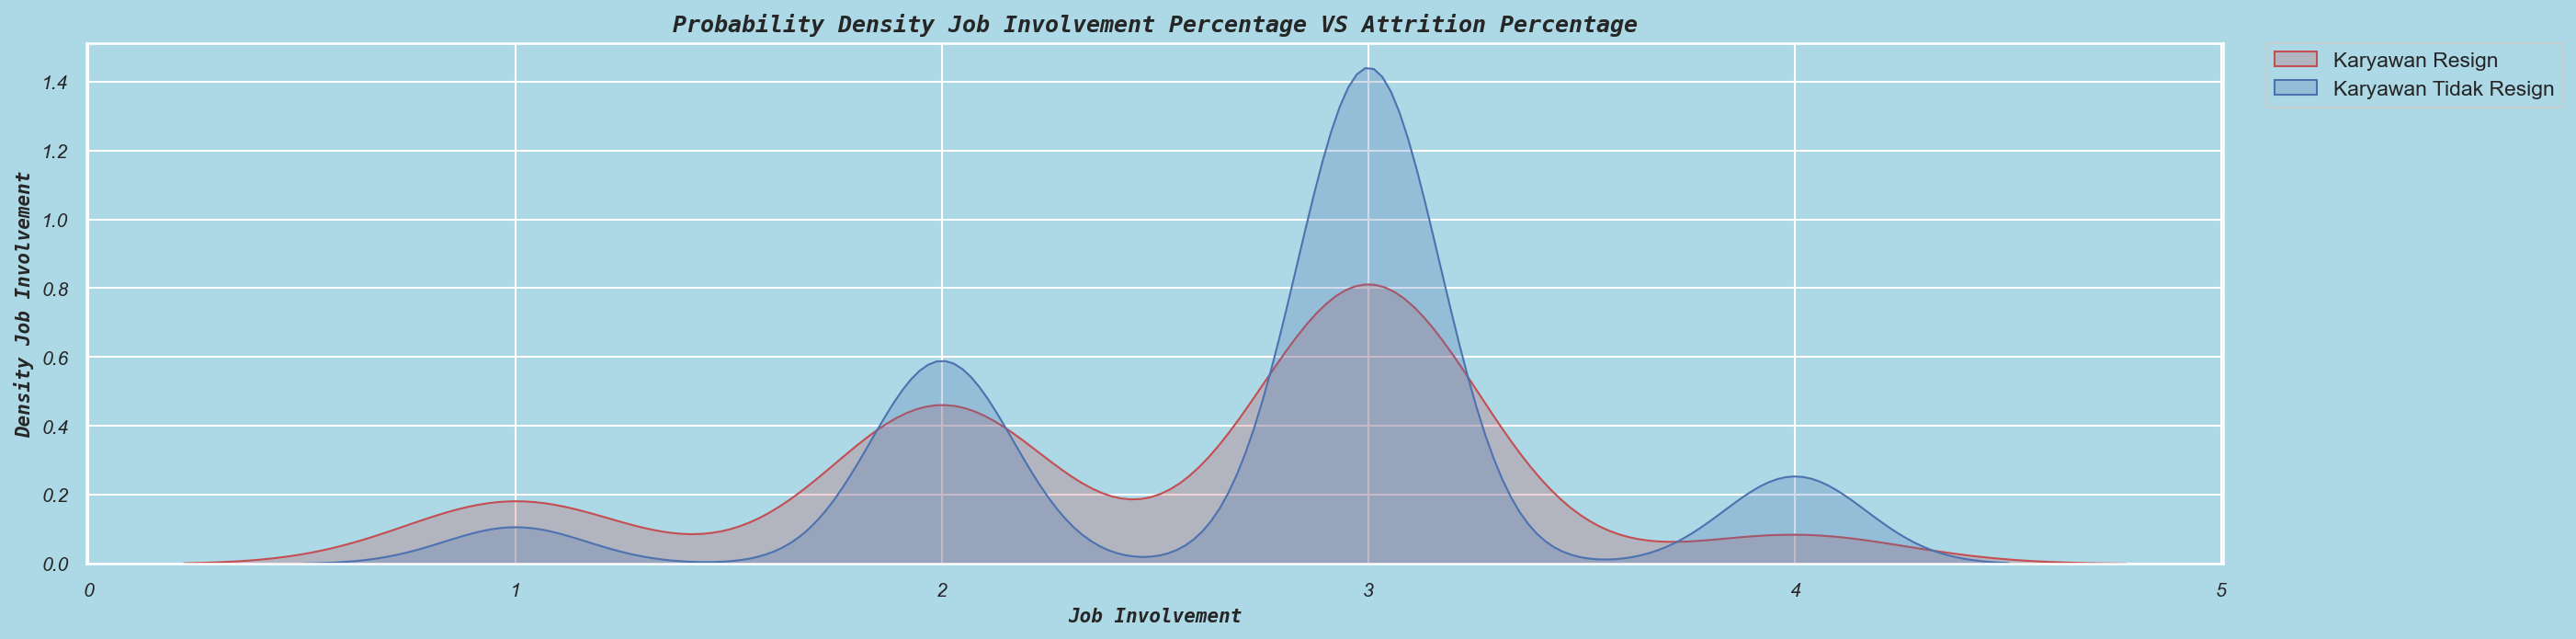

In [70]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_no=df[df[ 'Attrition']=='No']['JobInvolvement'] 
df_yes=df[df[ 'Attrition']=='Yes']['JobInvolvement'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Job Involvement Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Job Involvement', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Job Involvement', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Karyawan yang resign paling banyak ada pada job involment 1 dengan kategori low, sedangkan pada kategori 2 sampai kategori 3 mengalami peningkatan resign dan mengalami penurunan resign pada karyawan dengan job involment 4. Namun pada job involment 1 karyawan yang tidak resign lebih rendah dari karyawan yang resign,sedangkan pada job involment 2 sampai job involment 4 banyak karyawan yang tidak resign. Artinya karyawan yang resign banyak dari job involment yang rendah. 

## **Statisfaction**:

#### 13. WorkLife Balance

1. Bagaimana kategori WorkLife Balance karyawan yang resign ?
2. Apakah WorkLife Balance yang rendah penyebab karyawan yang resign ?

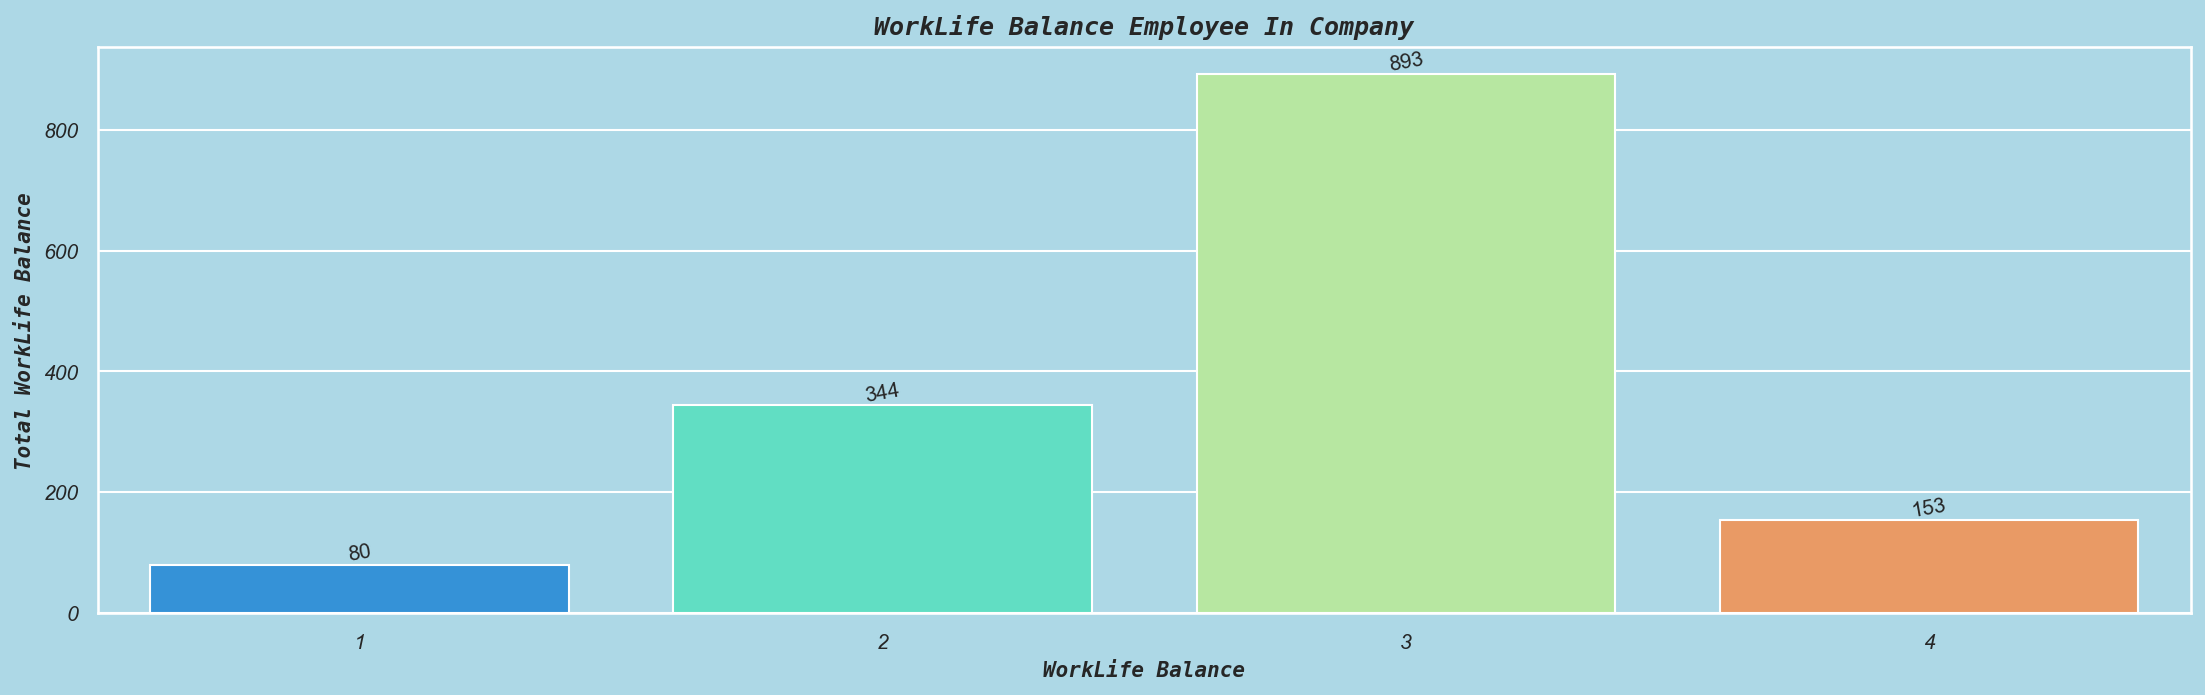

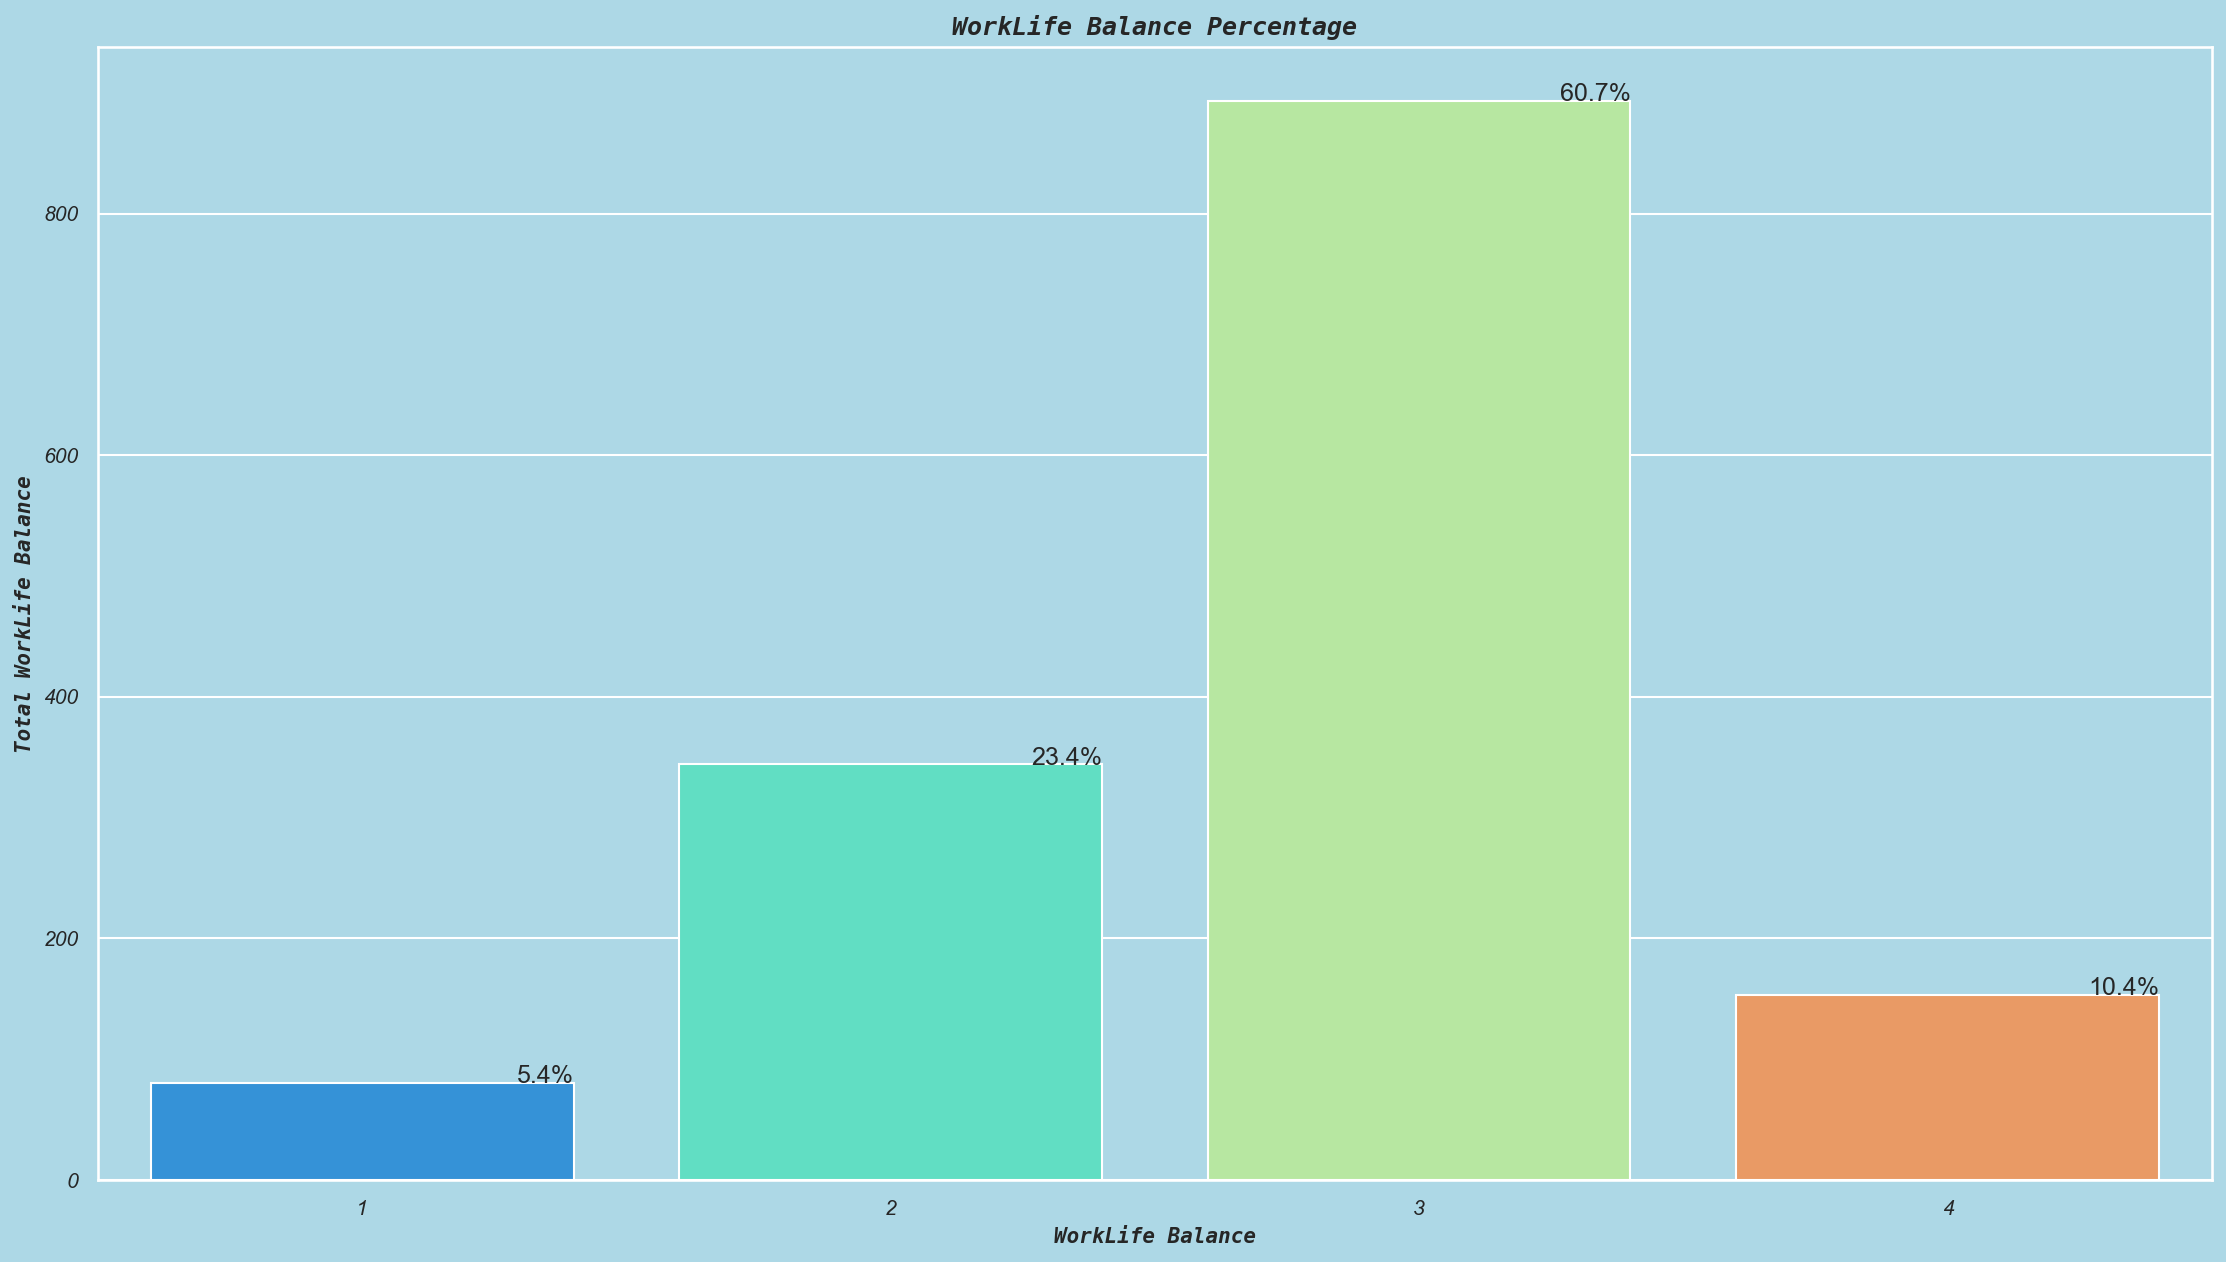

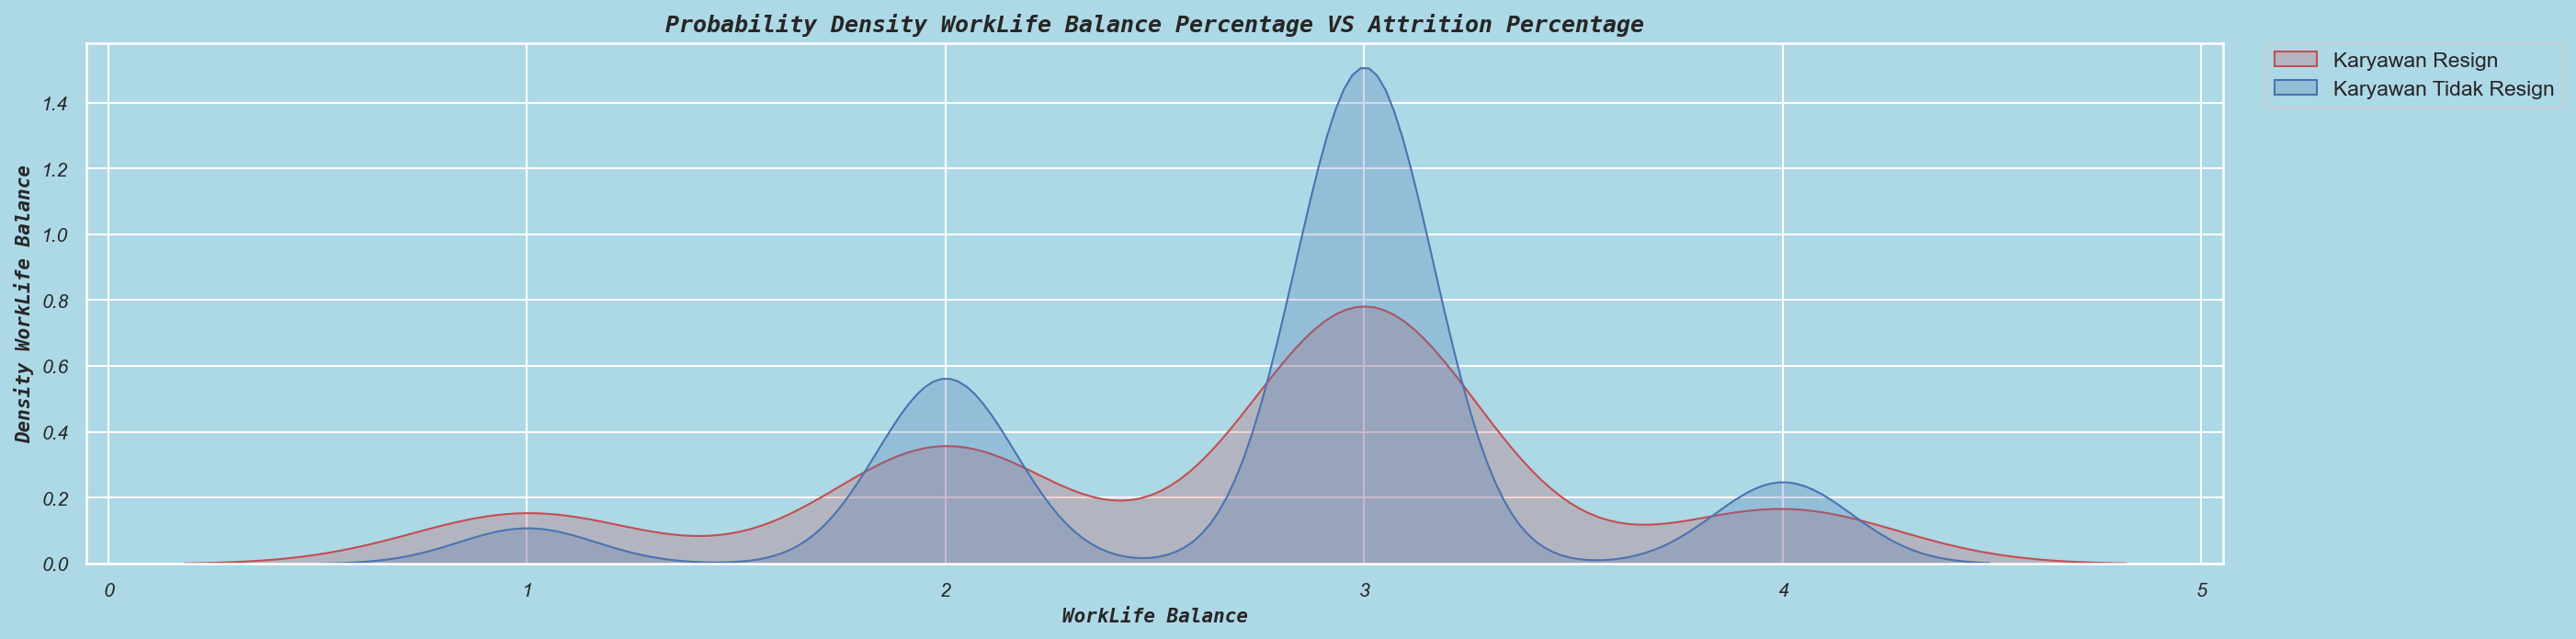

In [71]:
plt.figure(figsize=(18,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='WorkLifeBalance', data=df, palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('WorkLife Balance Employee In Company',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('WorkLife Balance', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total WorkLife Balance', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.countplot(x="WorkLifeBalance",data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('WorkLife Balance Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('WorkLife Balance', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total WorkLife Balance', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()


plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_no=df[df[ 'Attrition']=='No']['WorkLifeBalance'] 
df_yes=df[df[ 'Attrition']=='Yes']['WorkLifeBalance'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density WorkLife Balance Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('WorkLife Balance', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density WorkLife Balance', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


- Insight :
  - Work Life Balance yang karyawan dapatkan pada kategori work life balance 1 (Bad) sebanyak 80 karyawan dengan persentase 5,4%, sedangkan work life balance dengan kategori medium sebanyak 344 orang dengan persentase 23,4%, sedangkan untuk work life balance dengan level 3 (High) sebanyak 893 karyawan dengan persentase 60,7% dan karyawan yang mendapatkan work life balance level 4 (Best) sebanyak 153 karyawan dengan persentase 10,4%.
  - Karyawan yang resign dengan level work life balance level 1 (Bad) sebanyak 1,7% , karyawan yang resign dengan level work life balance 2 (Medium) sebanyak 3,9%, karyawn yang resign karena work life balance level 3 (High) sebanyak 8,6% dan karyawan yang resign karena work life balance level 4 (Best) sebanyak 1,8%.

#### 14.  Job Satisfaction

1. Bagaimana kepuasan karyawan dalam bekerja ?
2. Karyawan yang memiliki kepuasan kerja apa yang memilih resign ?
3. Apakah kepuasan kerja karyawan yang rendah penyebab karyawan resign ?

In [72]:
jobsatisfaction = pd.crosstab(index=df['JobSatisfaction'],columns='count')
jobsatisfaction

col_0            count
JobSatisfaction       
1                  289
2                  280
3                  442
4                  459

In [73]:
jobsatisfaction2 = pd.crosstab(index=df['JobSatisfaction'],columns='count',normalize=True).round(2)
jobsatisfaction3 = pd.crosstab(index=df['JobSatisfaction'],columns=df['Attrition'],normalize=True).round(2)
jobsatisfaction4 = pd.concat([jobsatisfaction2, jobsatisfaction3], axis=1, join='inner')
jobsatisfaction4.sort_values('Yes',ascending=False)

count    No   Yes
JobSatisfaction                   
3                 0.30  0.25  0.05
1                 0.20  0.15  0.04
4                 0.31  0.28  0.04
2                 0.19  0.16  0.03

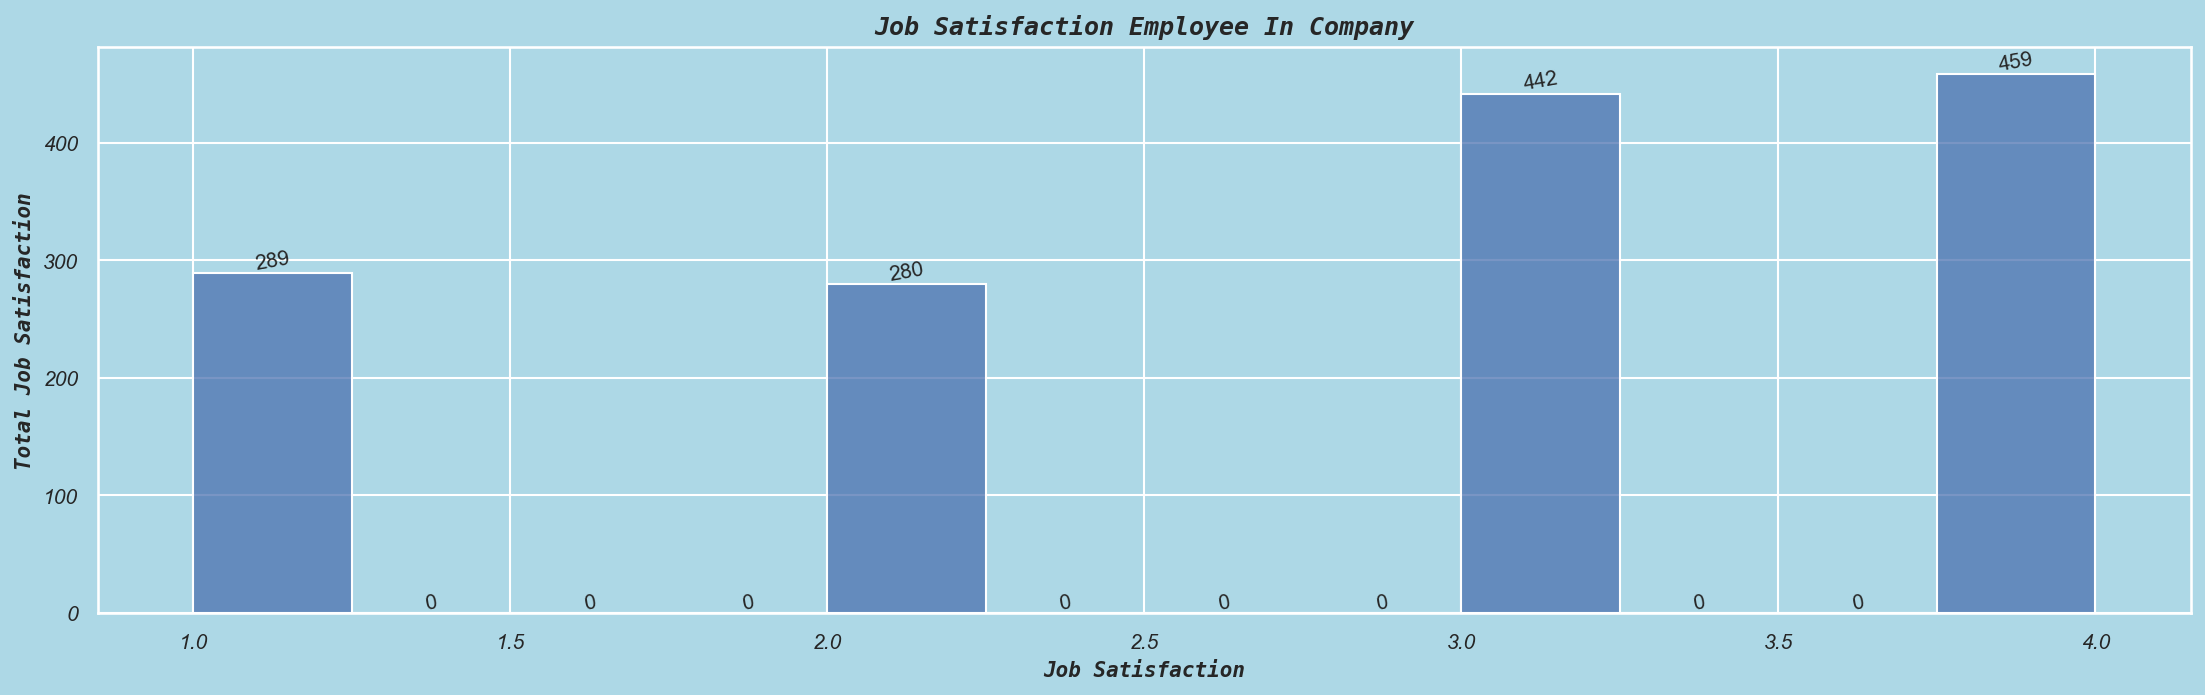

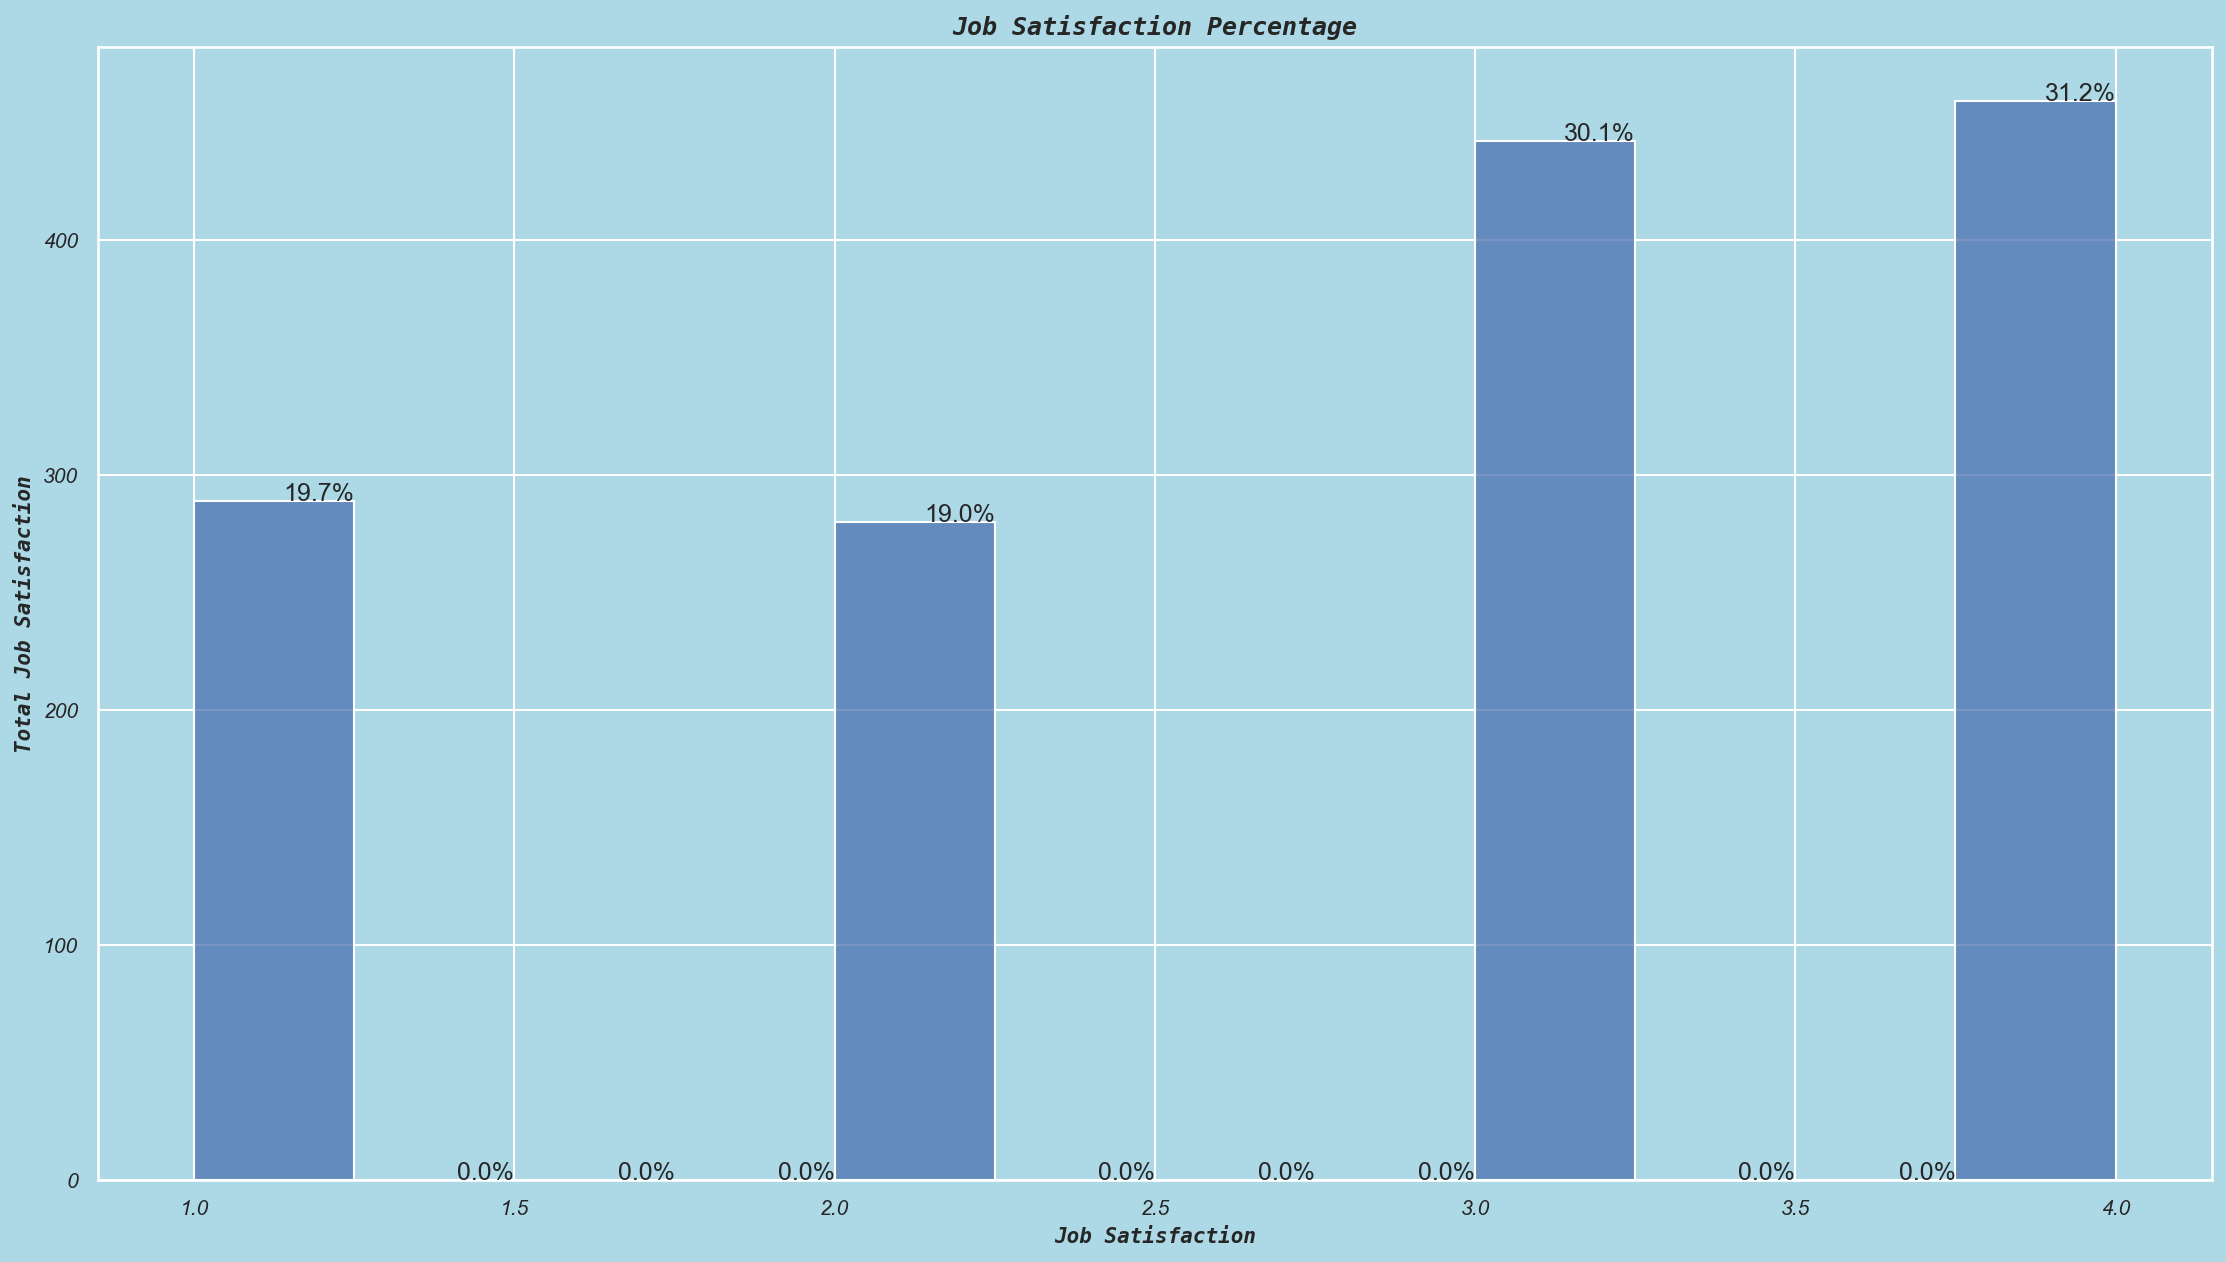

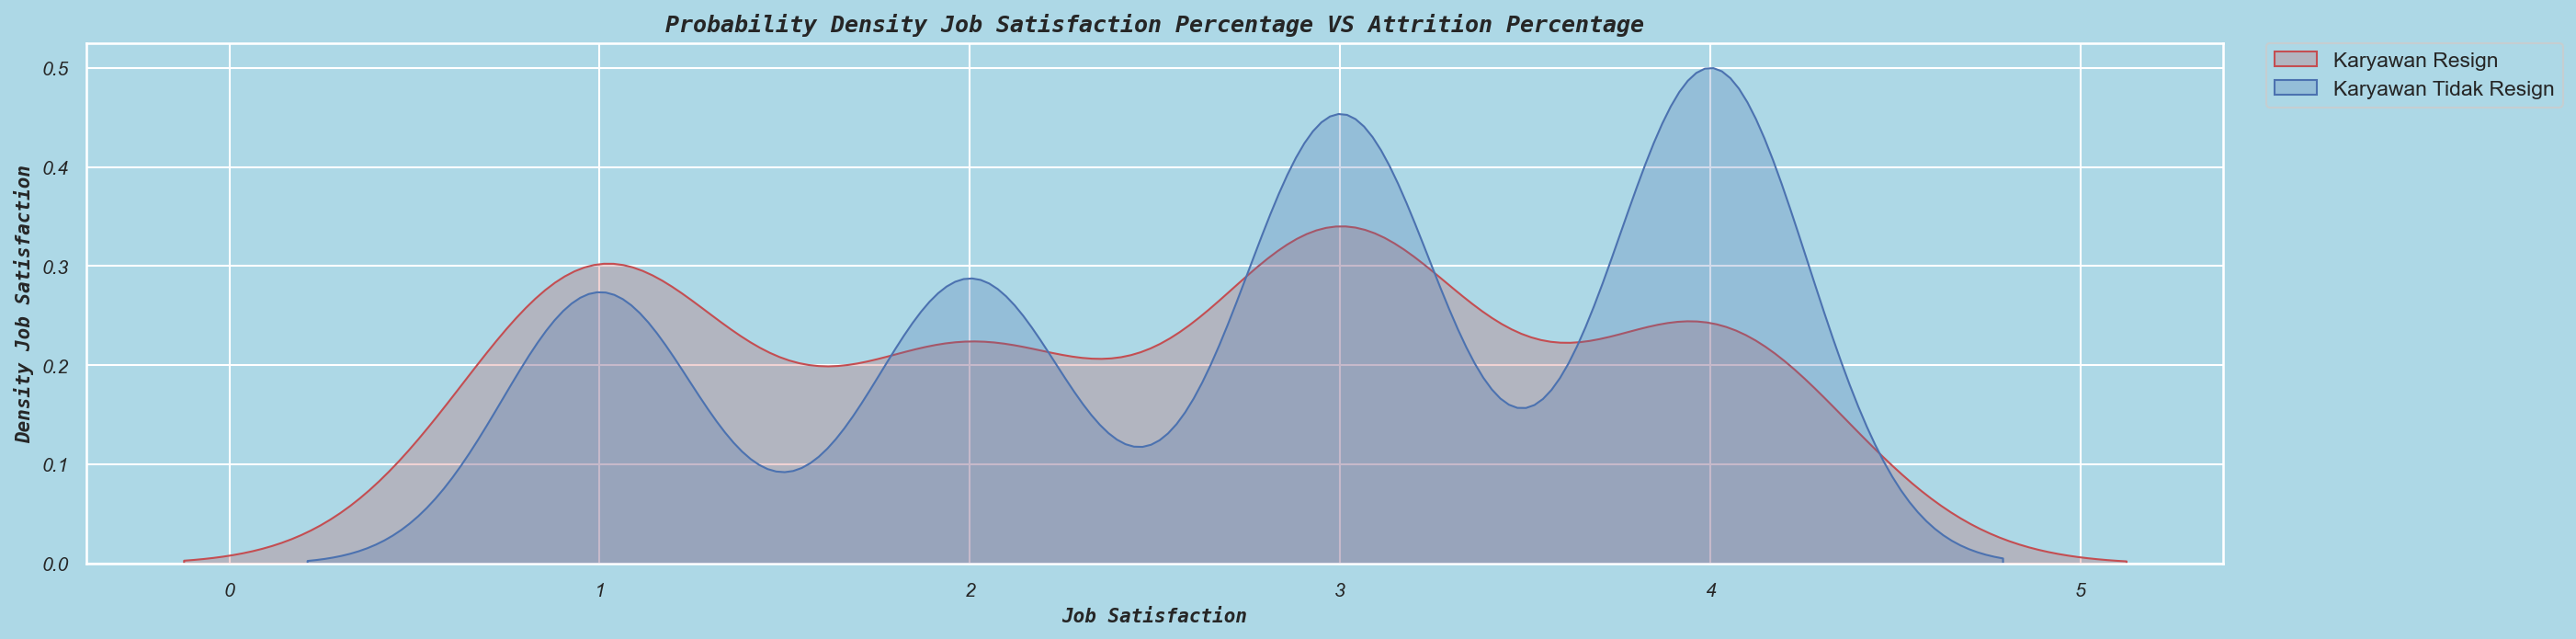

In [74]:
plt.figure(figsize=(18,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.histplot(x='JobSatisfaction', data=df, palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Job Satisfaction Employee In Company',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Job Satisfaction', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Job Satisfaction', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.histplot(x="JobSatisfaction",data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Job Satisfaction Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Job Satisfaction', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Job Satisfaction', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['JobSatisfaction'] 
df_no=df[df[ 'Attrition']=='No']['JobSatisfaction'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Job Satisfaction Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Job Satisfaction', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Job Satisfaction', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Kepuasan karyawan yang bekerja pada level 1 (Low) sebanyak 289 orang dengan persentase 19,7%, karyawan dengan kepuasan bekerja level 2 (Medium) ada 280 orang dengan persentae 19,0%, karyawan yang memiliki kepuasan bekerja pada level 3 (High) sebanyak 442 orang dengan total persentase 30,1% dan karyawan yang memiliki kepuasan bekerja level 4 sebanyak 459 dengan persentase 31,2%.
  - Jika dilihat dari distribusi data, persentase karyawan resign lebih banyak pada kepuasan karyawan pada level 1, pada level 2 karyawan yang tidak resign memiliki persentase yang lebih banyak dari pada karyawan yang resign, jika dilihat dari level 3 lebih banyak persentase karyawan tidak resign dari perusahaan dan puncak tertinggi dari persentase karyawan tidak resign ada pada kepauasan karyawan di level 4 , pada level 4 banyak karyawan yang tidak resign.

#### 15. Relationship Satisfaction

1. Apa Relationship Satisfaction yang memiliki persentase tertinggi untuk resign ?
2. Apa pengaruh Relationship Satisfaction terhadap ?

In [75]:
relationsatisfaction = pd.crosstab(index=df['RelationshipSatisfaction'],columns='count')
relationsatisfaction

col_0                     count
RelationshipSatisfaction       
1                           276
2                           303
3                           459
4                           432

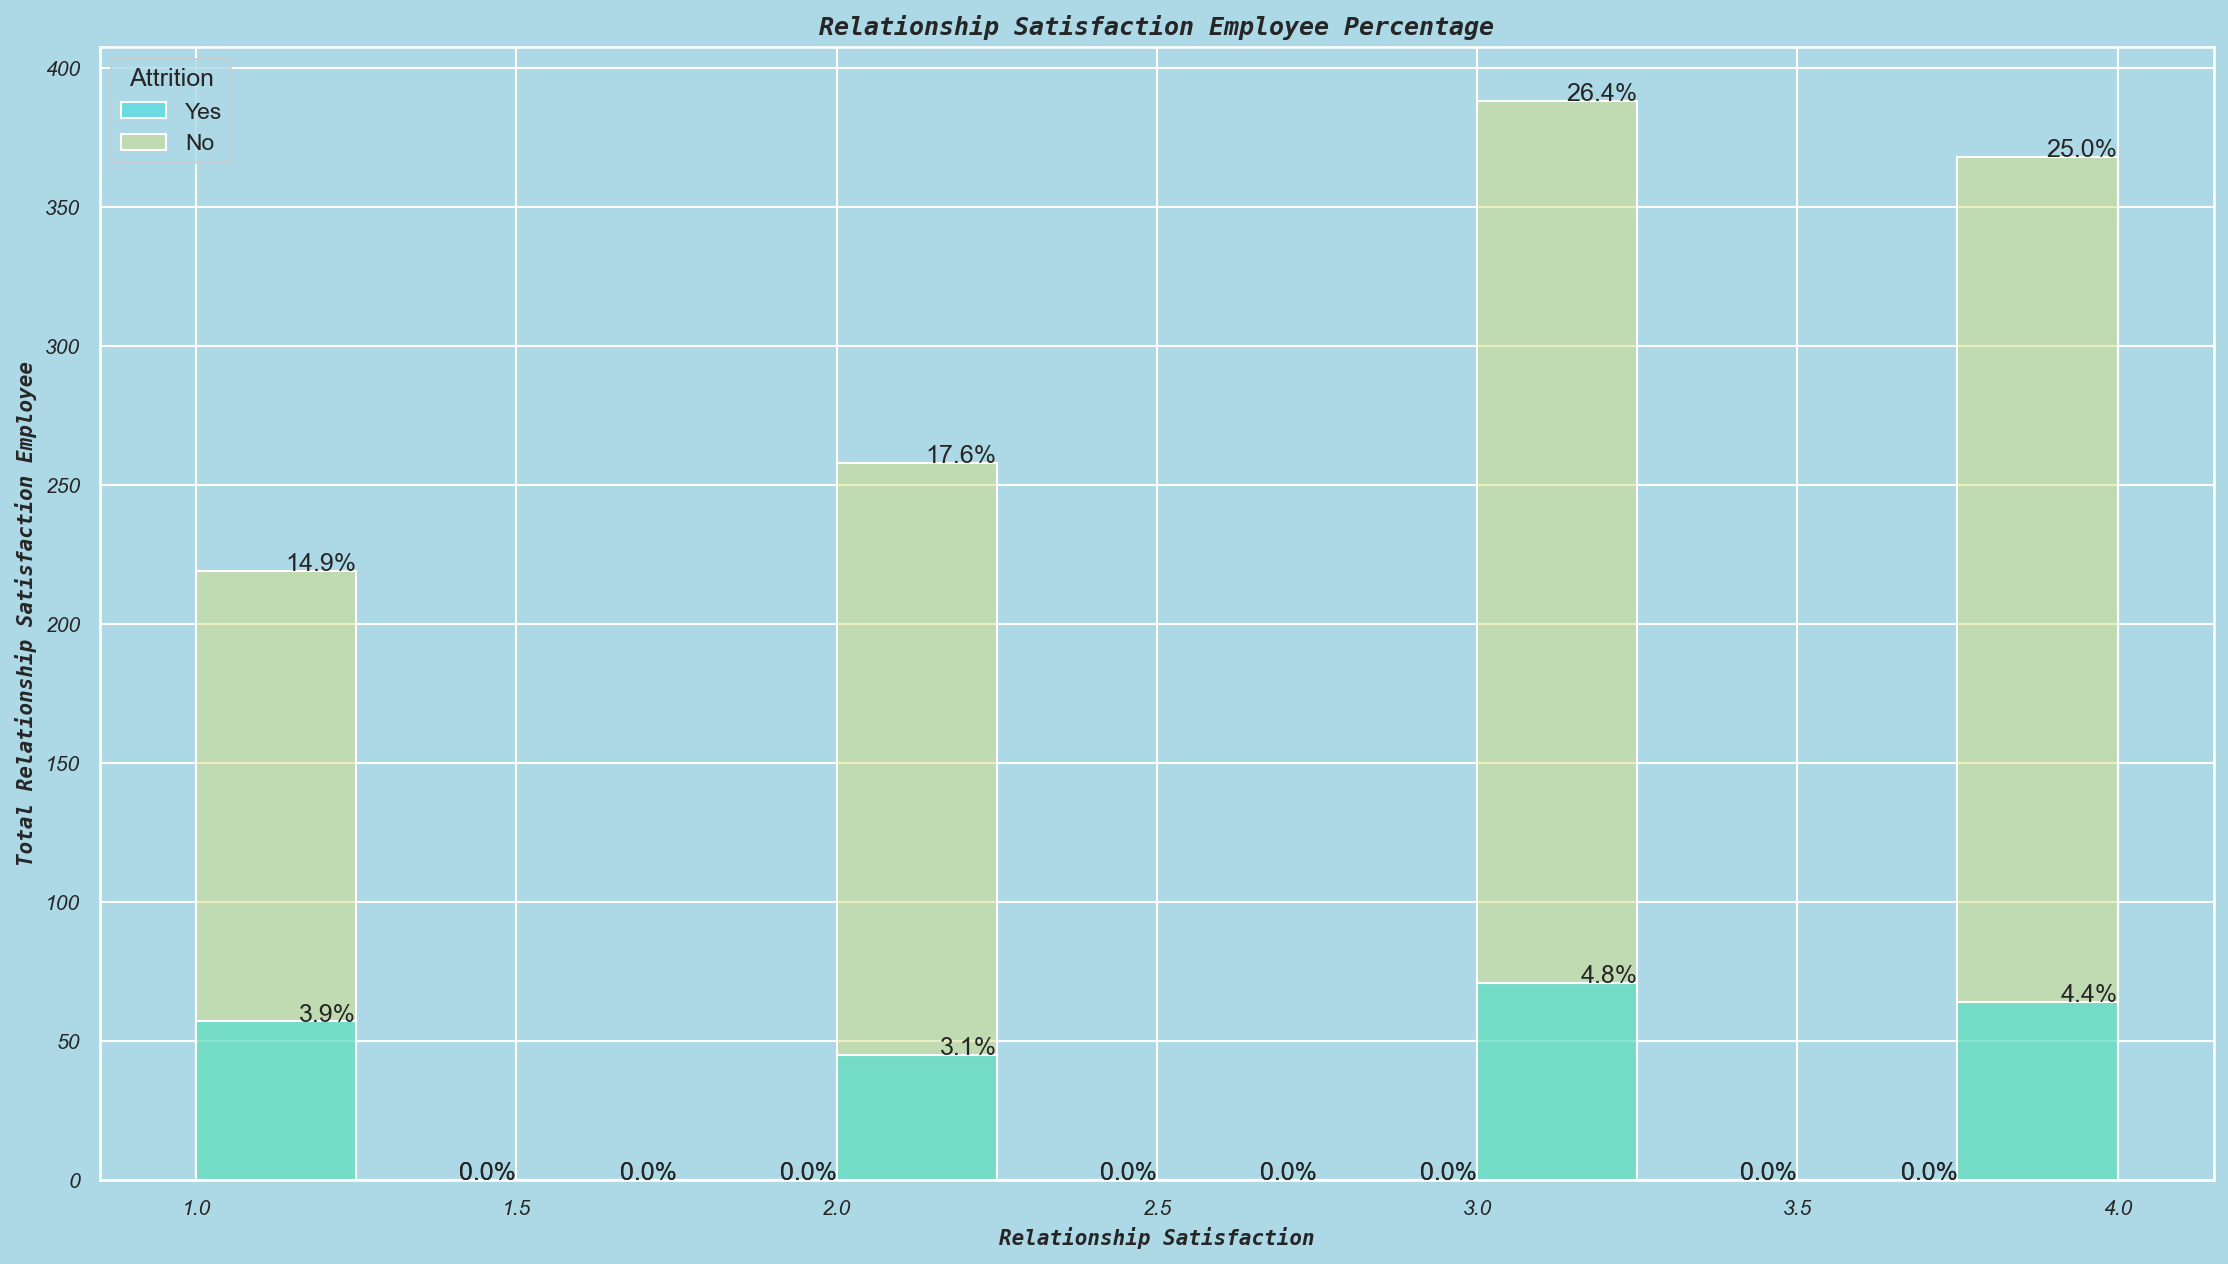

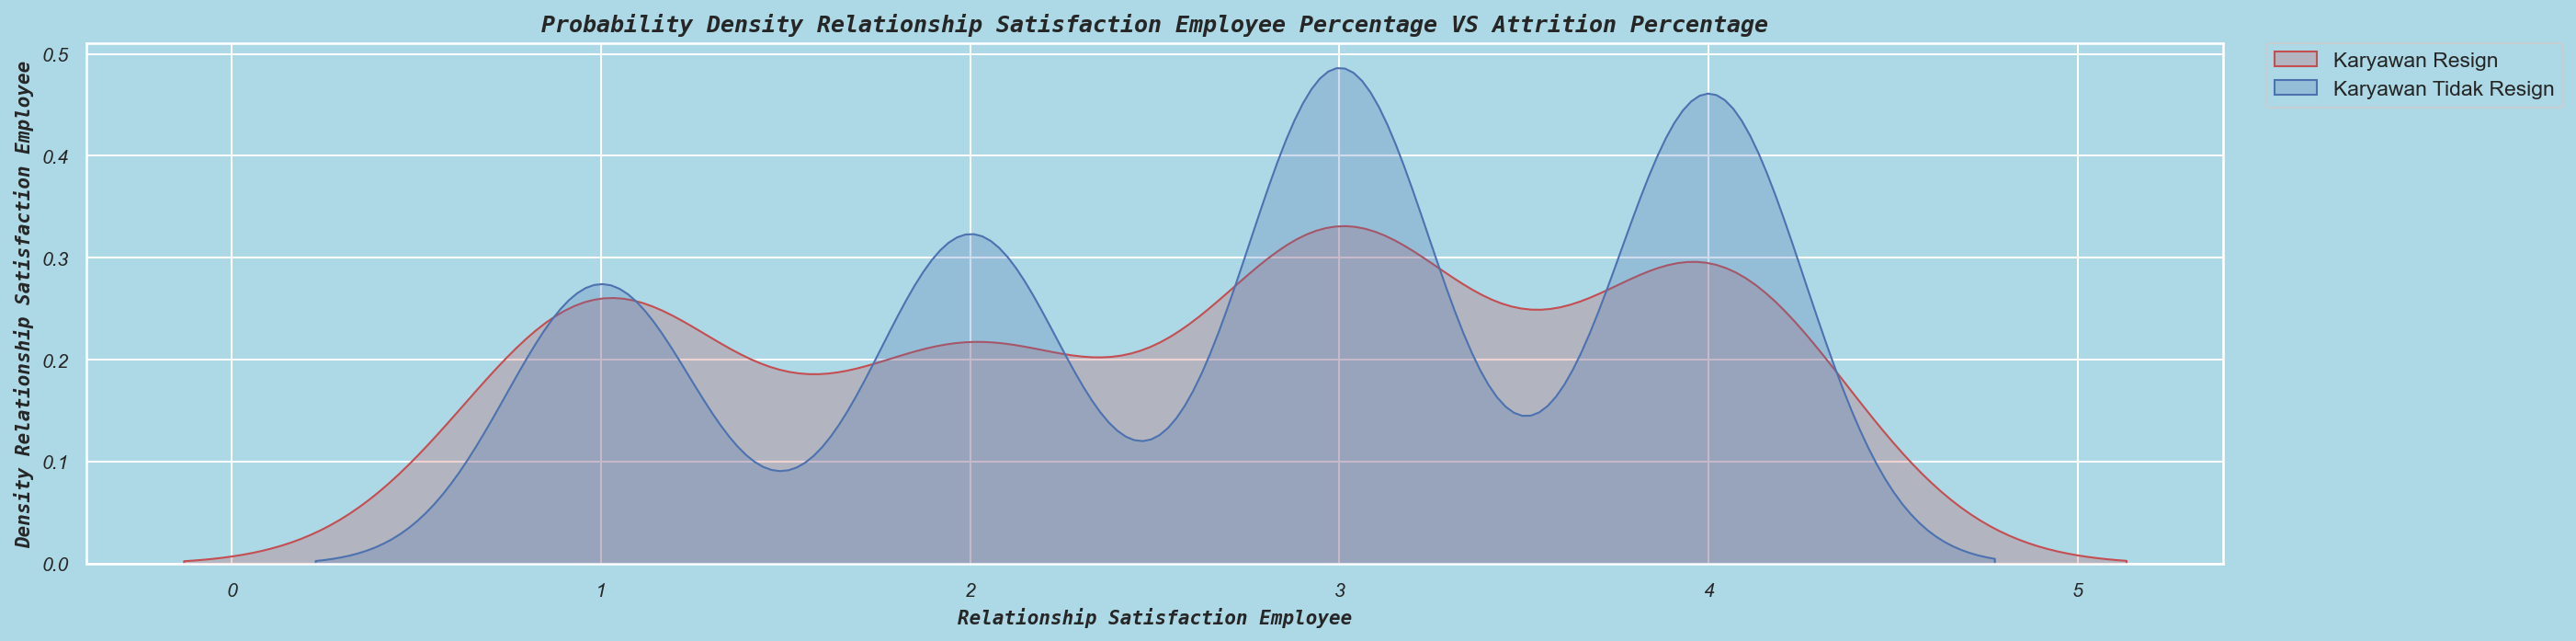

In [76]:
plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.histplot(x="RelationshipSatisfaction",hue='Attrition',data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Relationship Satisfaction Employee Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Relationship Satisfaction', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Relationship Satisfaction Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['RelationshipSatisfaction'] 
df_no=df[df[ 'Attrition']=='No']['RelationshipSatisfaction'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Relationship Satisfaction Employee Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Relationship Satisfaction Employee', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Relationship Satisfaction Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Dari keseluruhan hubungan kerja, karyawan yang memiliki tingkat resign yang tinggi ada pada karyawan yang memiliki hubungan kerja yang rendah yaitu karyawan yang memiliki hubungan kerja yang rendah dengan persentase resign tertinggi 4,9%.
  - Jika dilihat dari kecendrungan karyawan yang resign paling banyak ada pada karyawan dengan hubungan kerja yang rendah, sedangkan karyawan yang memiliki hubungan kerja medium,tinggi dan sangat tinggi lebih cenderung memiliki menetap diperusahaan.

#### 16. Enviroment Satisfaction

1. Apa Enviroment Satisfaction yang memiliki persentase tertinggi ?
2. Apa pengaruh Enviroment Satisfaction terhadap attrition ?

In [77]:
environmentsatisfaction = pd.crosstab(index=df['EnvironmentSatisfaction'],columns='count')
environmentsatisfaction

col_0                    count
EnvironmentSatisfaction       
1                          284
2                          287
3                          453
4                          446

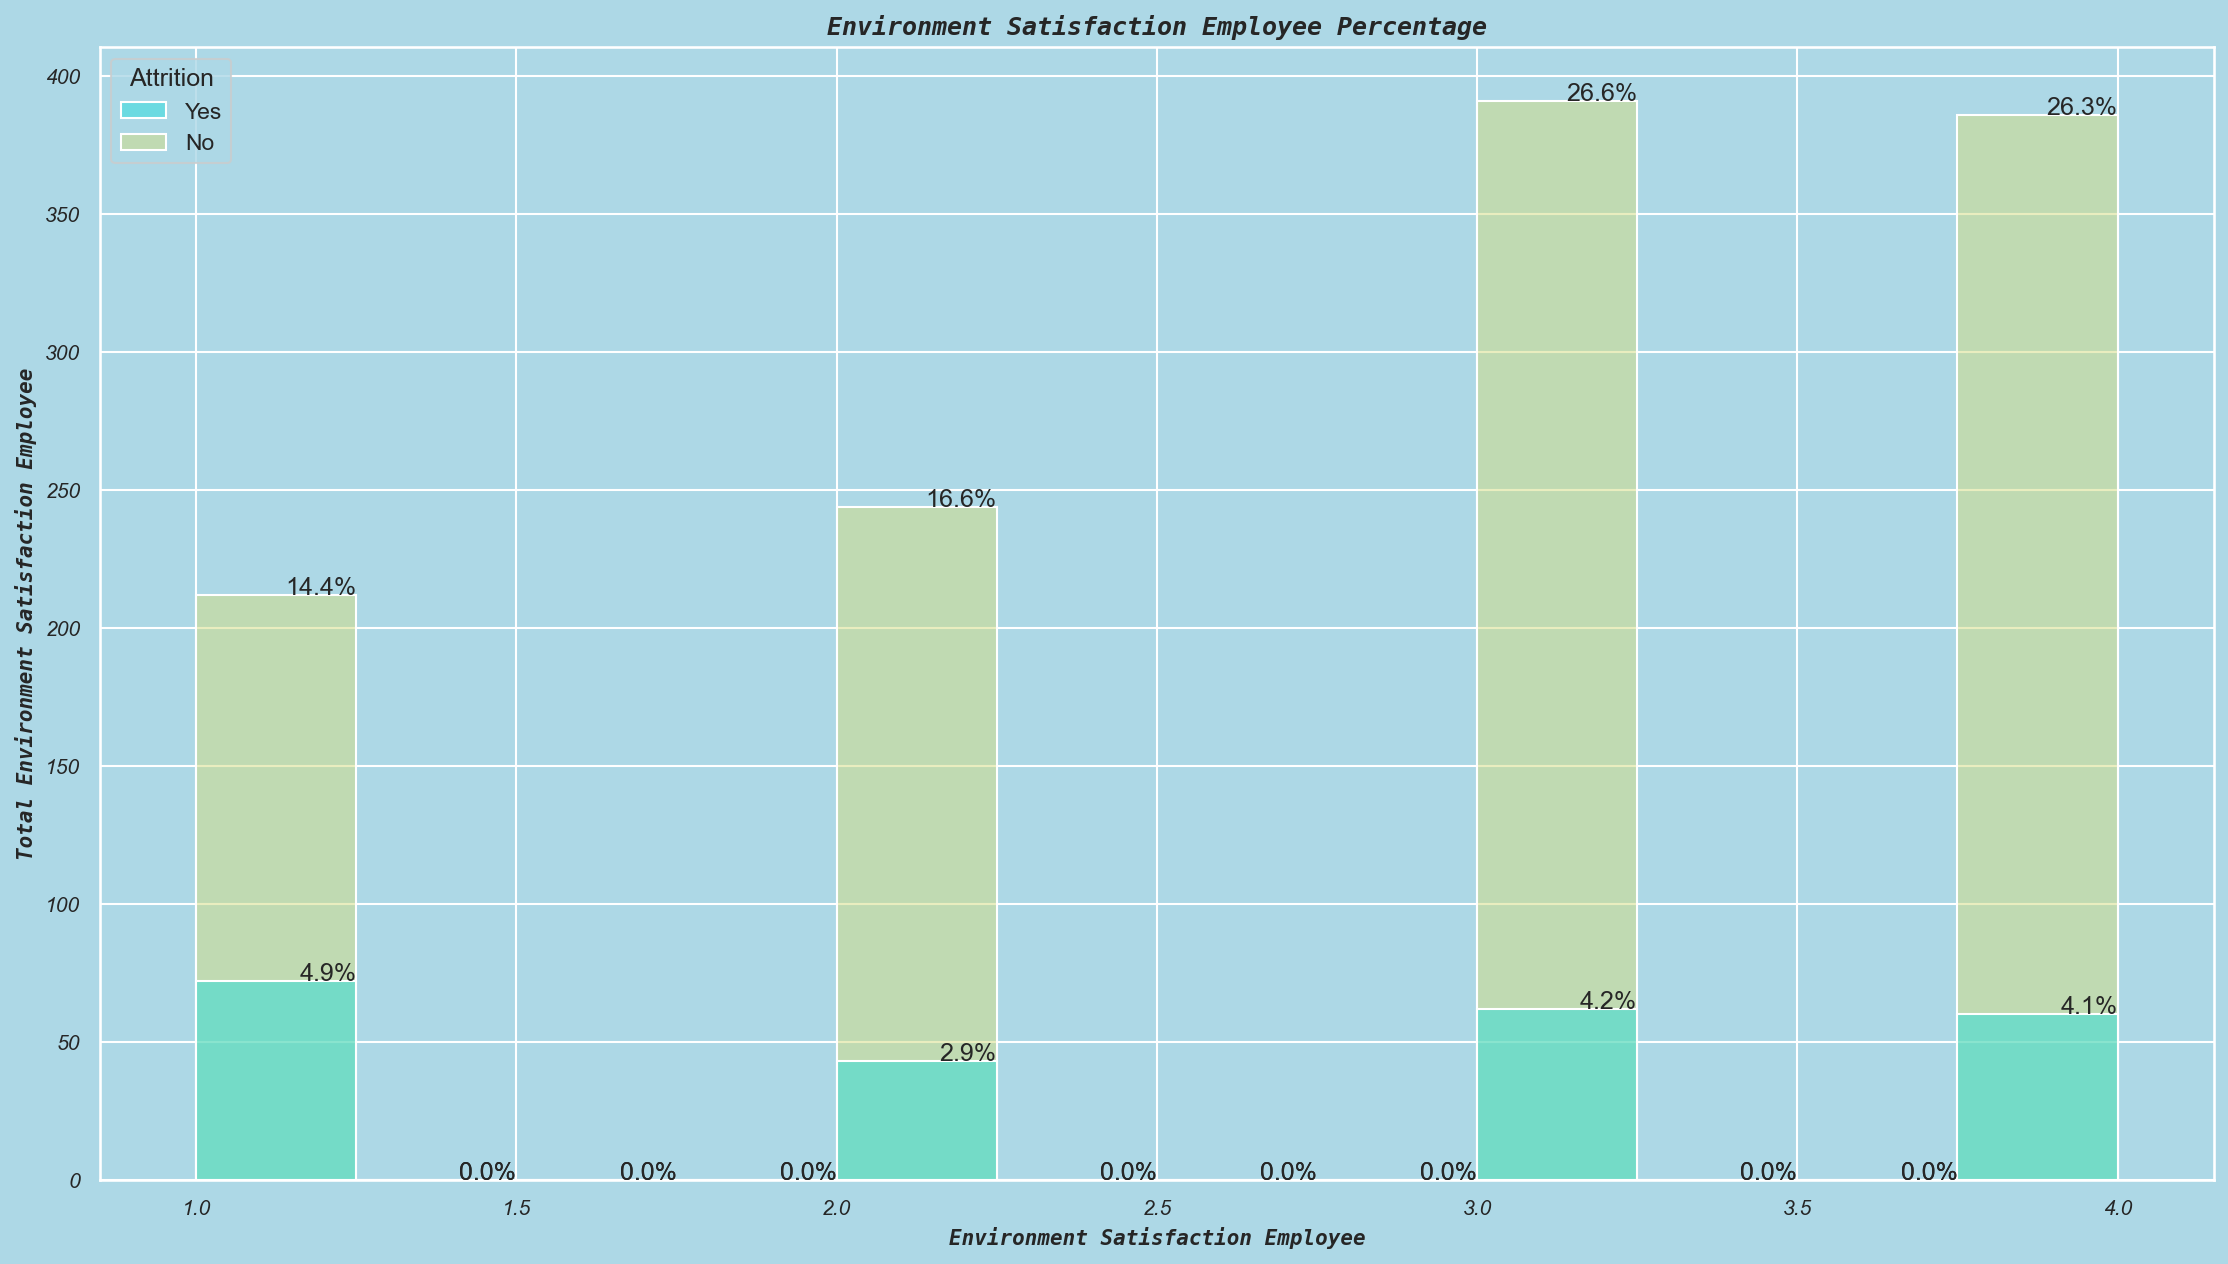

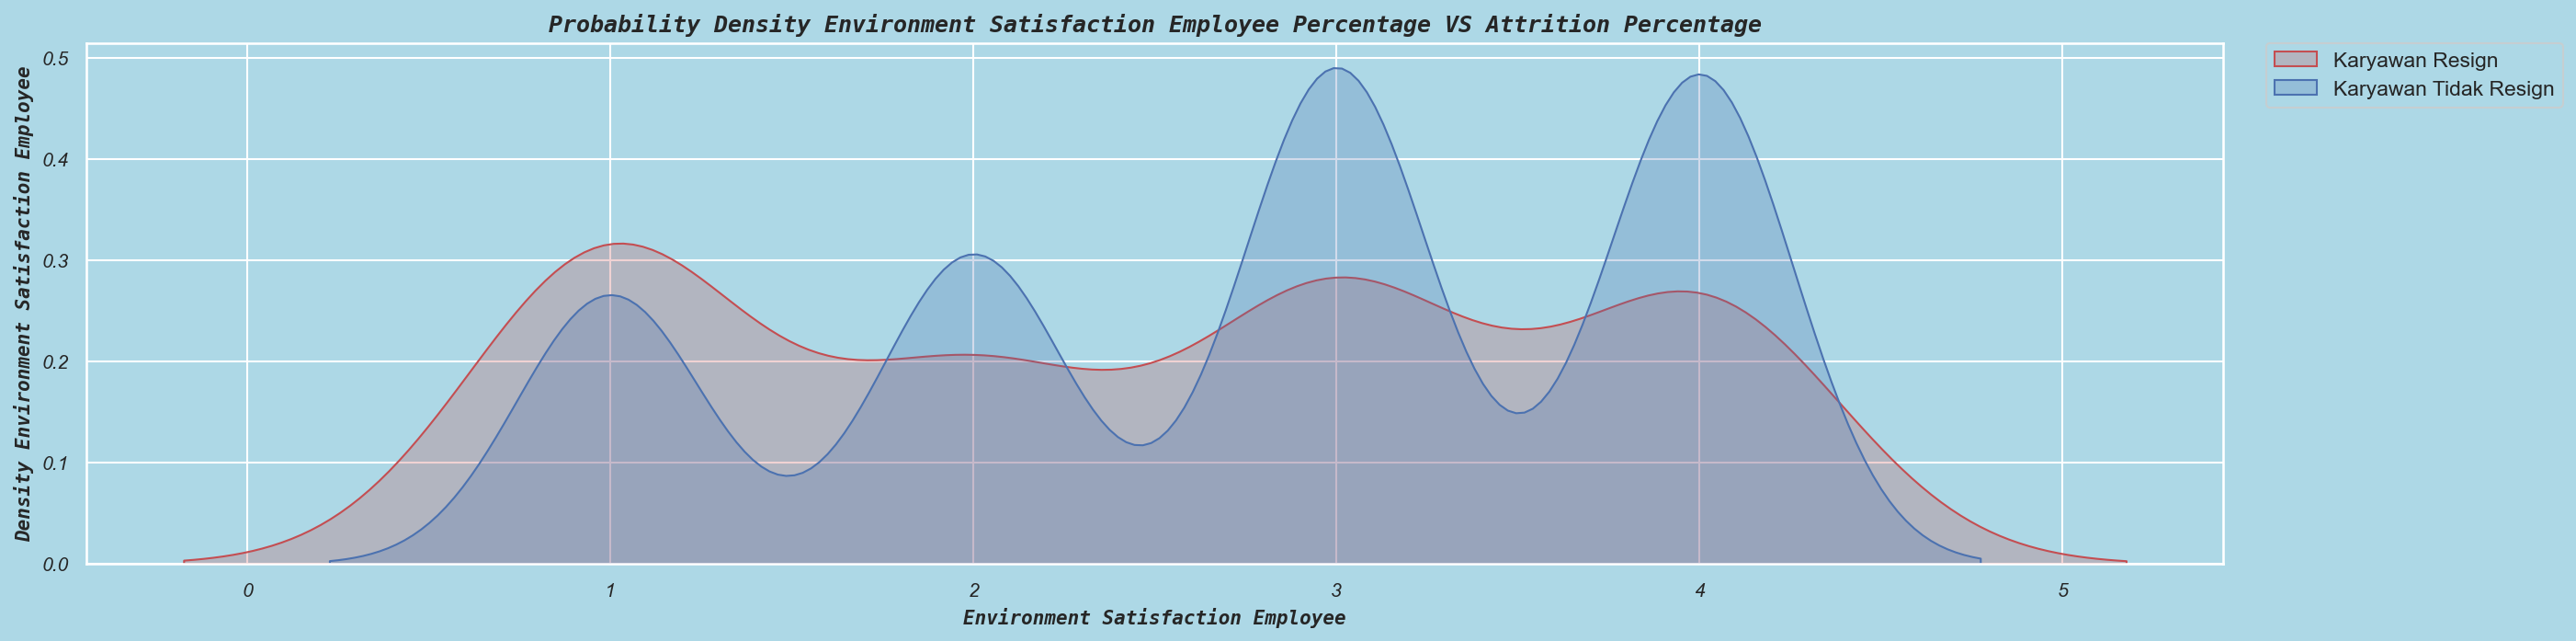

In [78]:
plt.figure(figsize=(40,10),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.subplot(1,2,1)
ay=sns.histplot(x="EnvironmentSatisfaction",hue='Attrition',data=df,palette = 'rainbow')
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Environment Satisfaction Employee Percentage',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Environment Satisfaction Employee', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Environment Satisfaction Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['EnvironmentSatisfaction'] 
df_no=df[df[ 'Attrition']=='No']['EnvironmentSatisfaction'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Environment Satisfaction Employee Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Environment Satisfaction Employee', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Environment Satisfaction Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Banyak karyawan yang resign dari lingkungan kerja yang rendah 4,9%.
  - Lingkungan kerja yang kurang kurang nyaman cenderung membuat karyawan resign, sedangkan lingkungan kerja yang nyaman cenderung membuat karyawan untuk bertahan.

#### 17.	Monthly Income

1. Apa pengaruh Monthly Income terhadap Attrition?

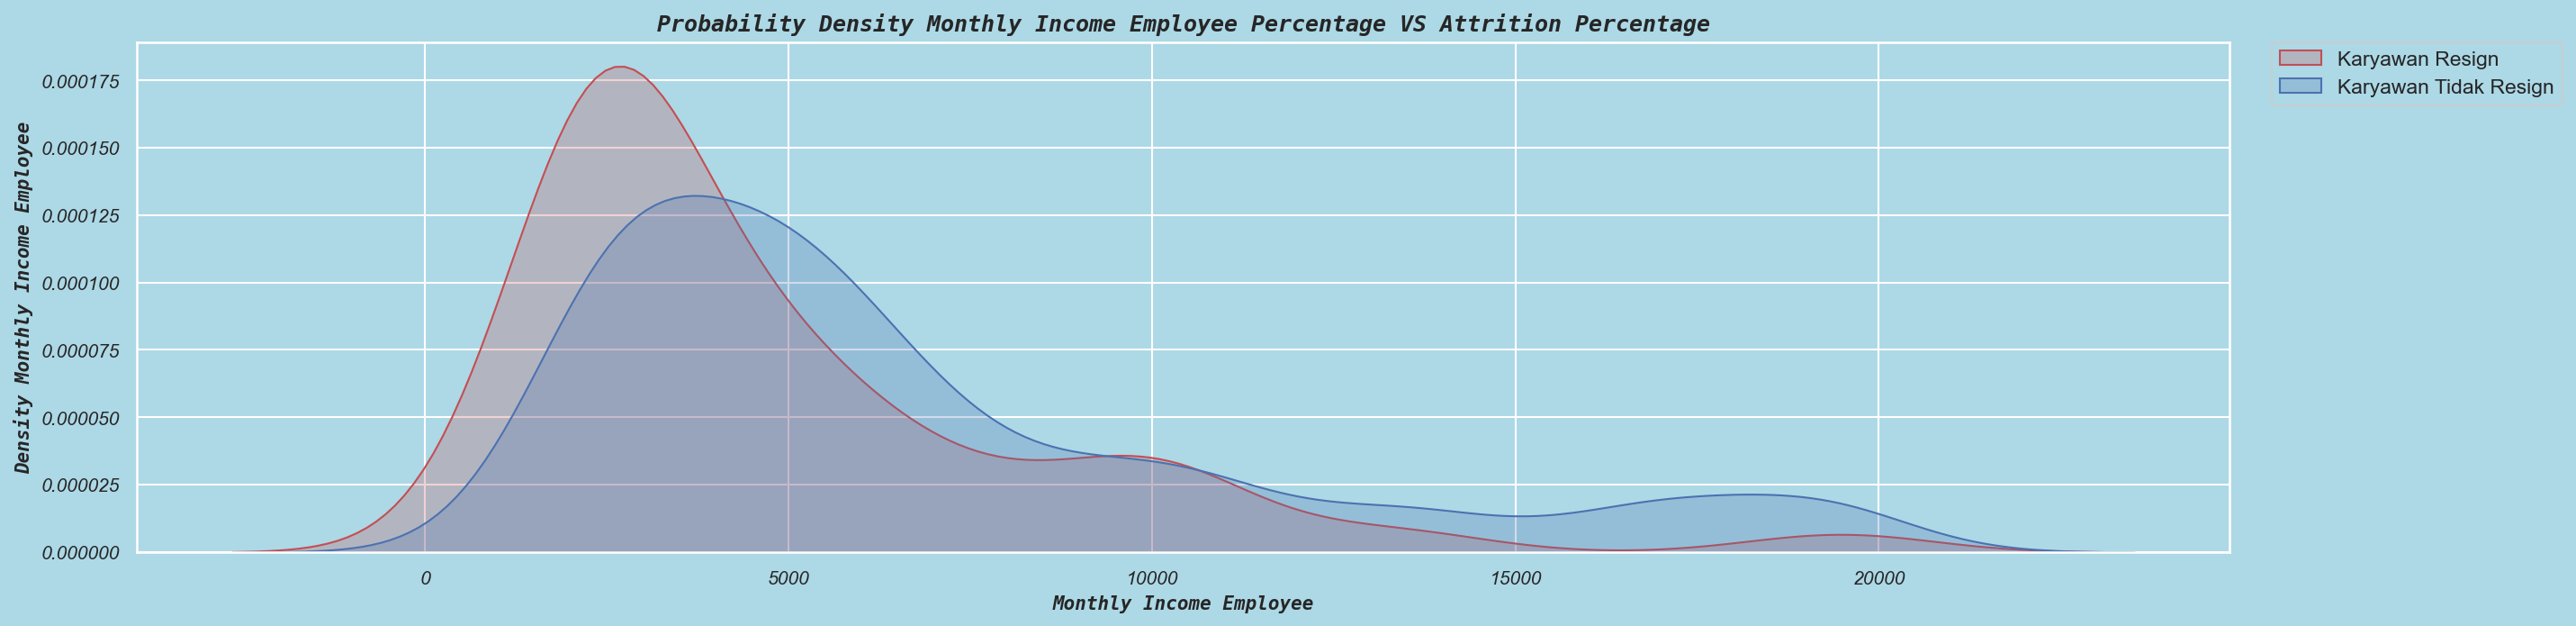

In [79]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['MonthlyIncome'] 
df_no=df[df[ 'Attrition']=='No']['MonthlyIncome'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Monthly Income Employee Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Monthly Income Employee', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Monthly Income Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Karyawan yang memiliki pendapatan bulanan di bawah 5000 USD memiliki kecendrungan resign lebih tinggi untuk resign dibandingkan karyawan dengan pendapatan bulanan diatas 5000 USD.

#### 18. Monthly Rate

1. Apa pengaruh Monthly Rate terhadap Attrition?

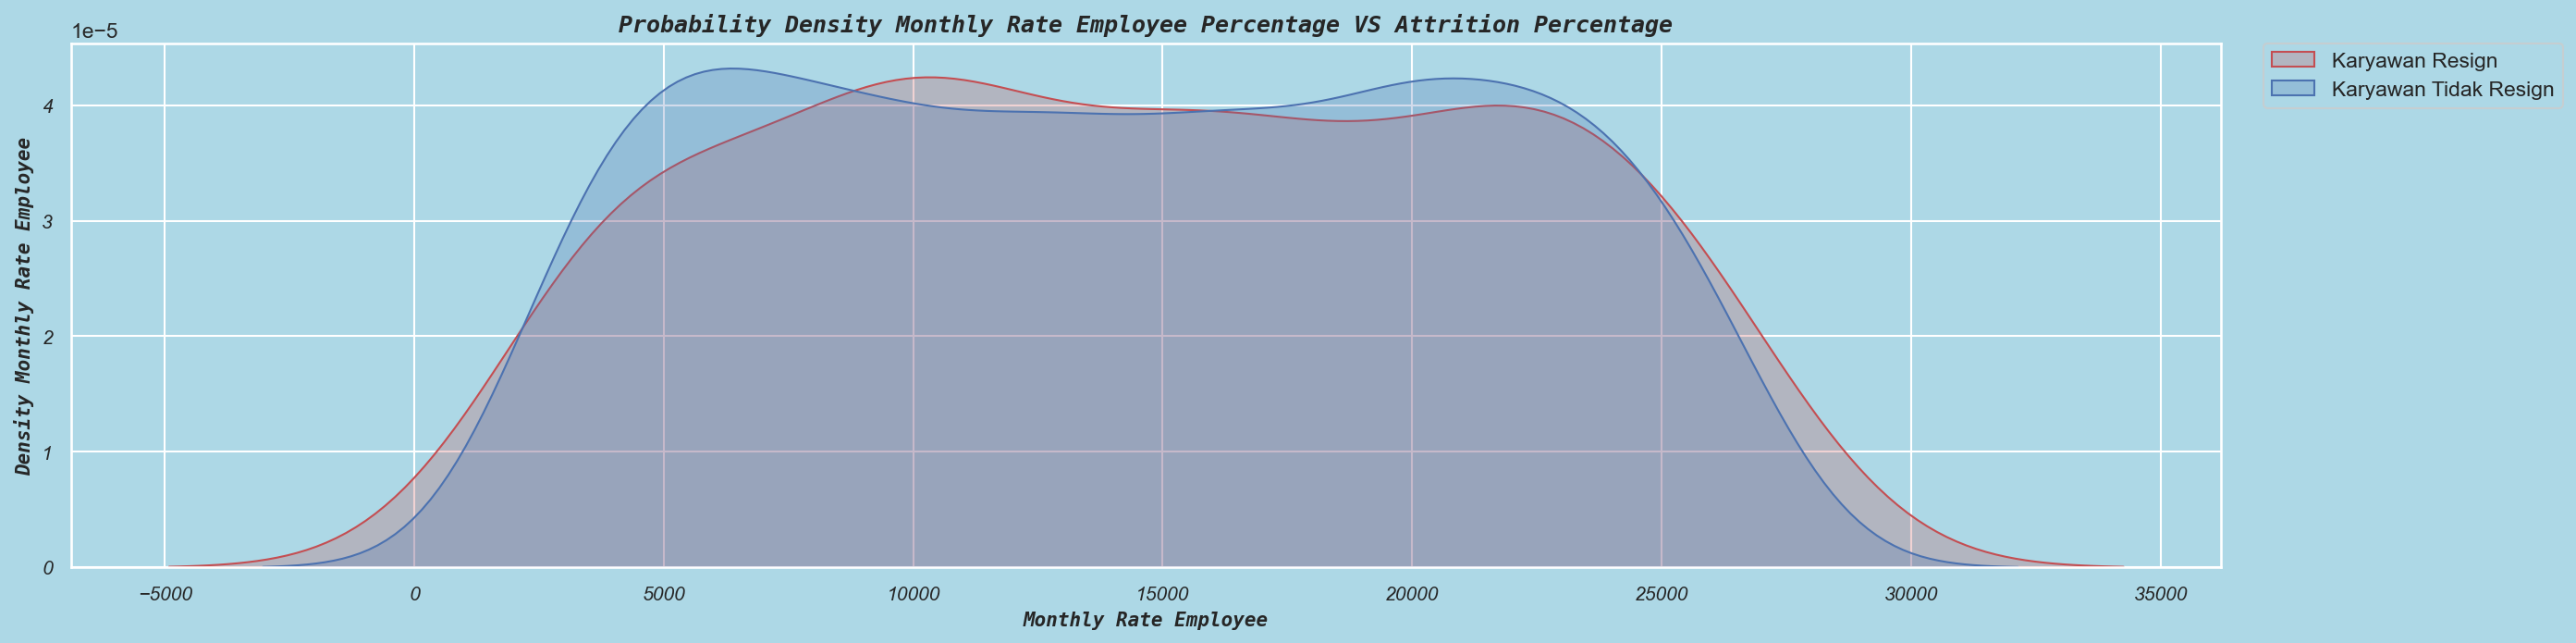

In [80]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['MonthlyRate'] 
df_no=df[df[ 'Attrition']=='No']['MonthlyRate'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Monthly Rate Employee Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Monthly Rate Employee', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Monthly Rate Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Banyak karyawan yang resign dengan gaji perbulan pada 10000 USD dan dibawah 15000 USD memiliki kecendrungan untuk resign.

#### 19. Daily Rate

1. Apa pengaruh Daily Rate terhadap Attrition?

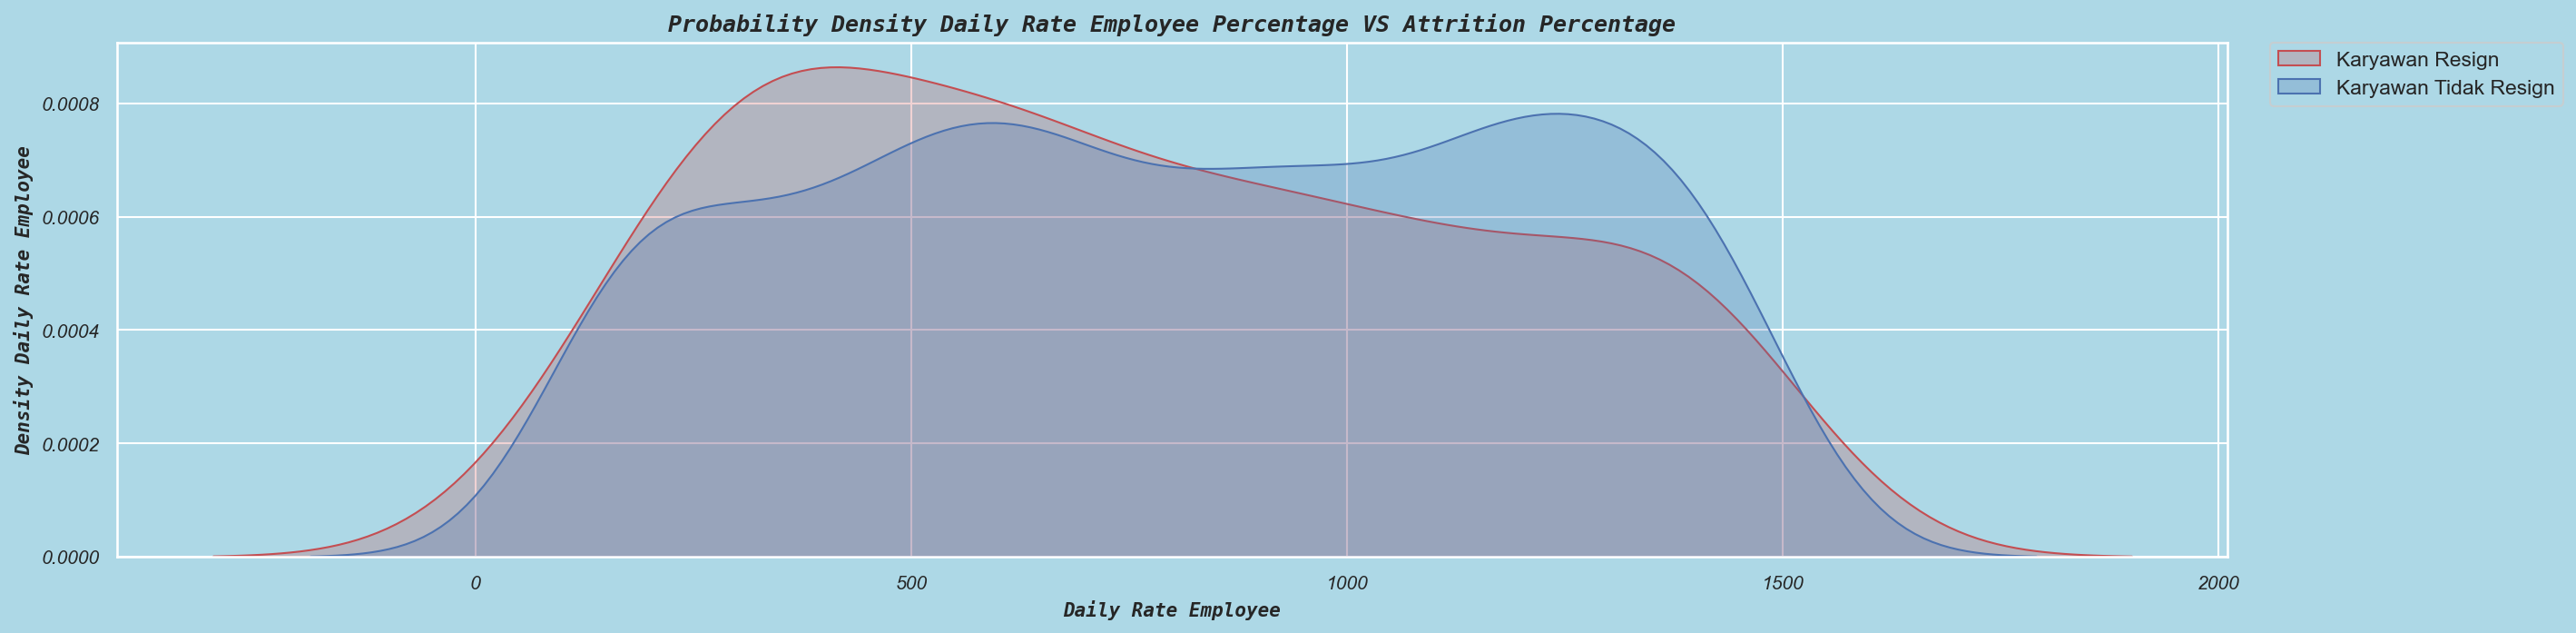

In [81]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['DailyRate'] 
df_no=df[df[ 'Attrition']=='No']['DailyRate'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Daily Rate Employee Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Daily Rate Employee', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Daily Rate Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Banyak karyawan yang resign pada pendapatan hariannya kurang dari 1000 USD, sedangkan karyawan yang memiliki tarif harian di atas 1000 USD memiliki kecendrungan lebih banyak bertahan di perusahaan.

#### 20. Hourly Rate

1. Apa pengaruh Hourly Rate terhadap Attrition?

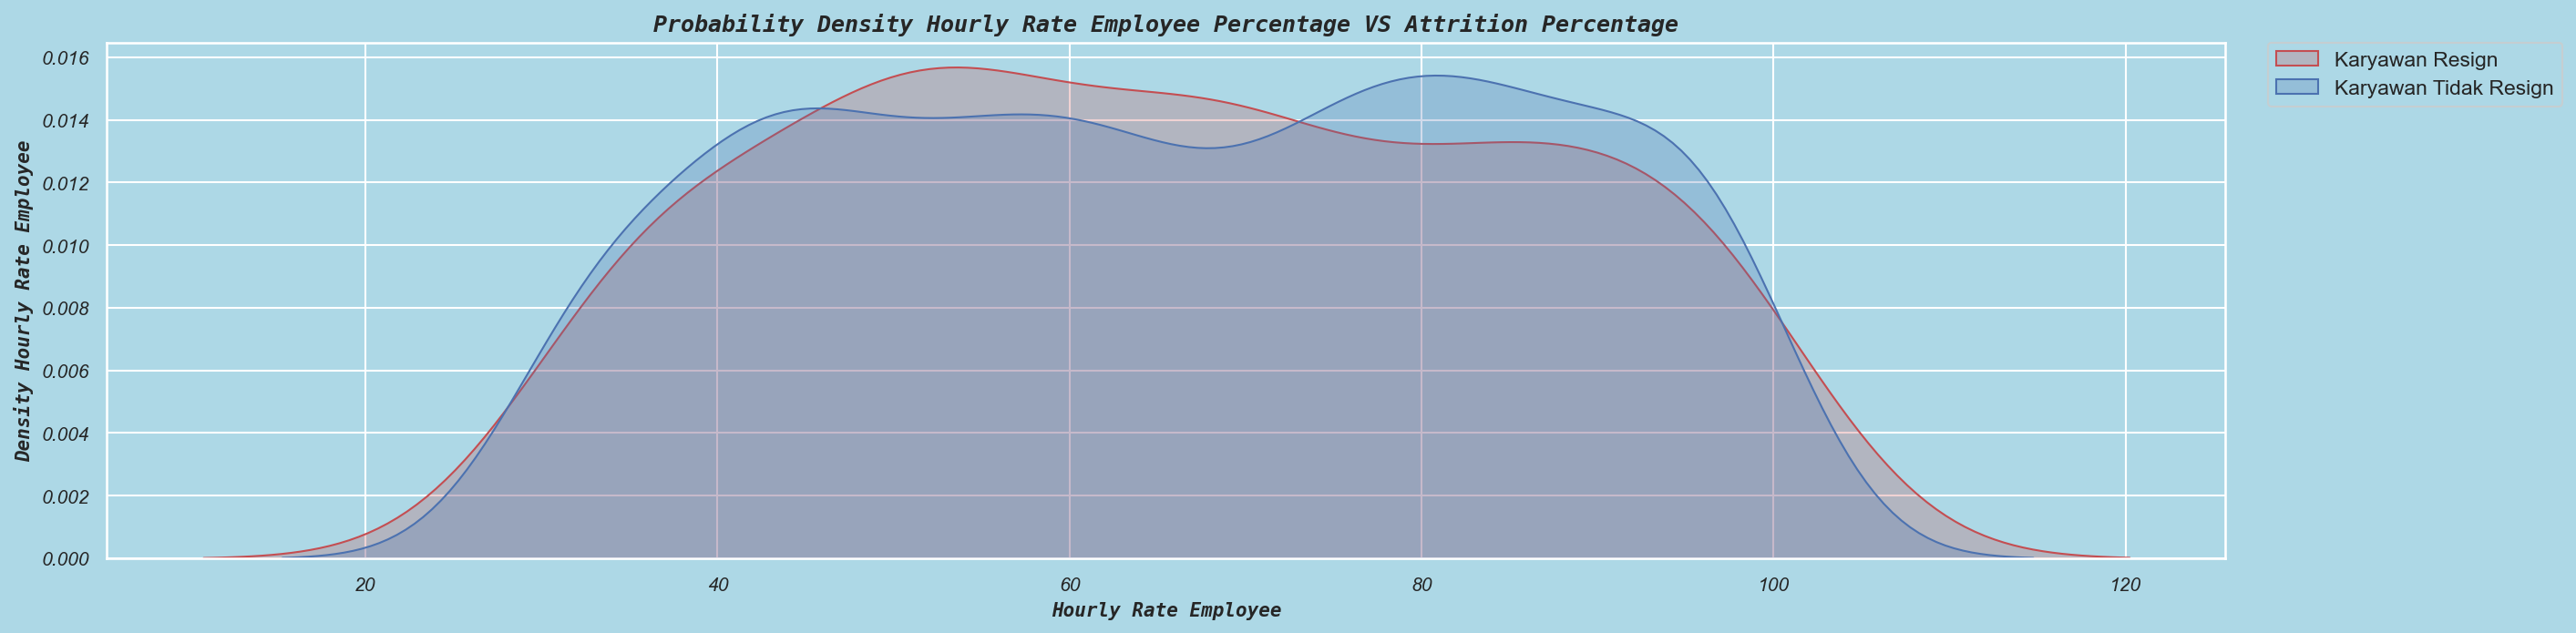

In [82]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['HourlyRate'] 
df_no=df[df[ 'Attrition']=='No']['HourlyRate'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Hourly Rate Employee Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Hourly Rate Employee', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Hourly Rate Employee', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Karyawan yang resign lebih banyak pada yang menerima pendapatan perjam diatas 40USD namun di bawah 80USD, sedangkan karyawan yang memiliki pendapatan di atas 100 USD perharinya lebih banyak bertahan di perusahaan.

#### 21. Percent Salary Hike

1. Apa pengaruh Percent Salary Hike terhadap Attrition?

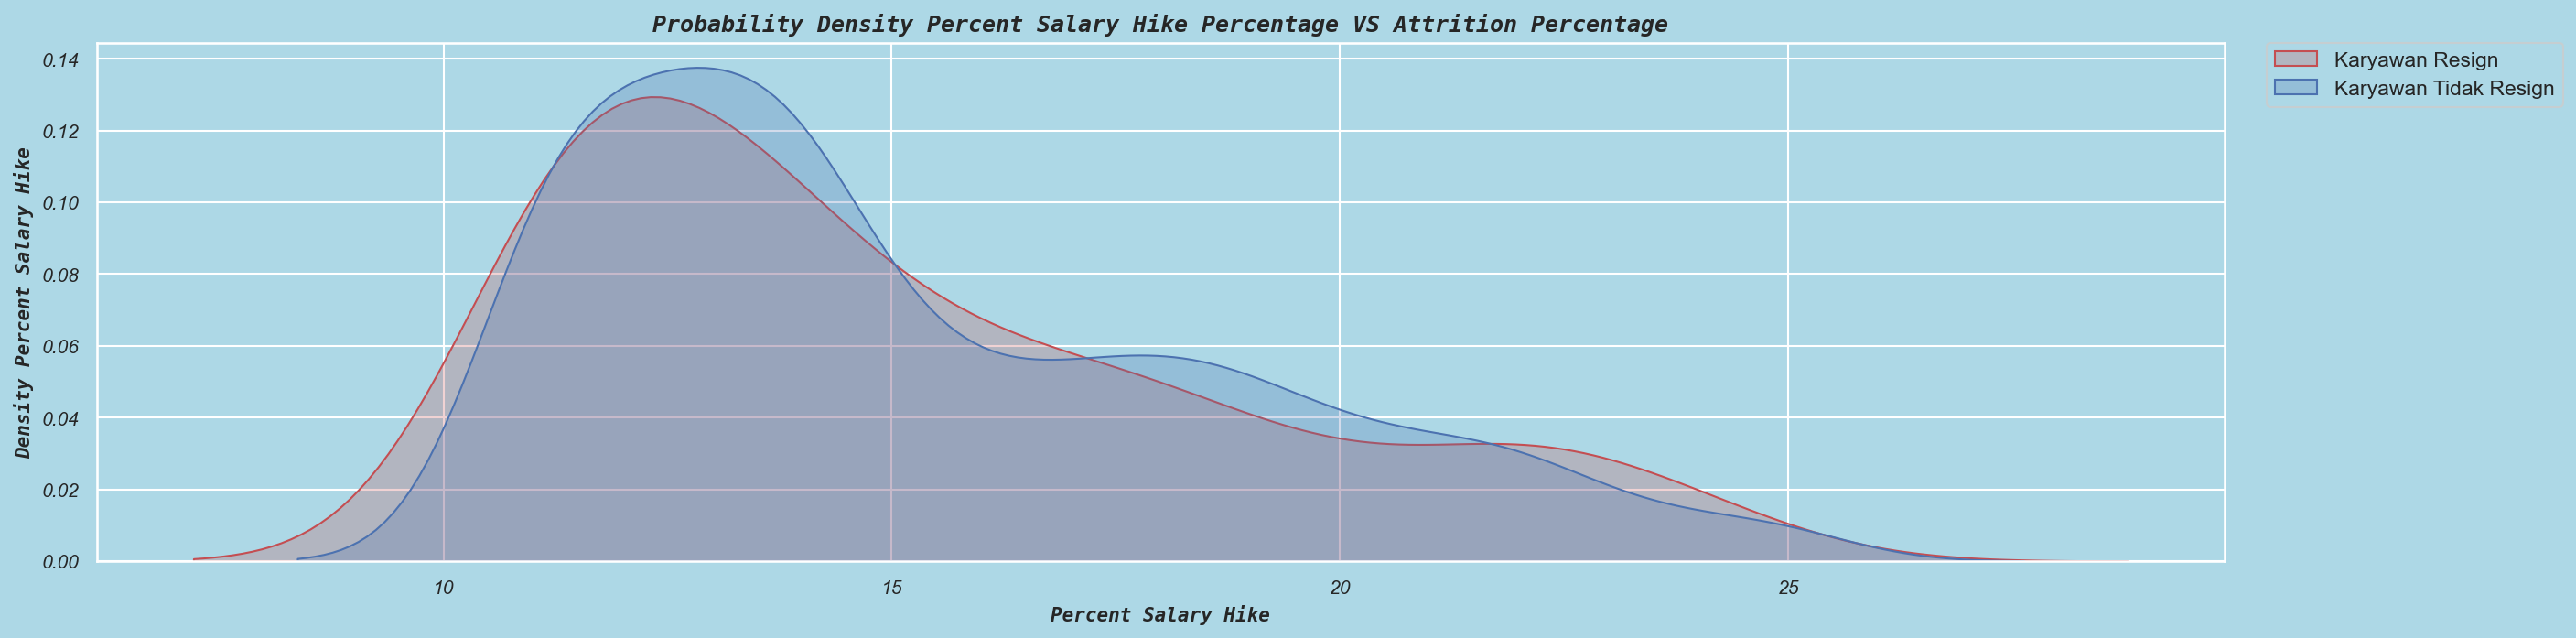

In [83]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['PercentSalaryHike'] 
df_no=df[df[ 'Attrition']=='No']['PercentSalaryHike'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Percent Salary Hike Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Percent Salary Hike', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Percent Salary Hike', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Karyawan yang memiliki kenaikan gaji di bawah 10% lebih banyak memilih resign sedangkan karyawan yang memiliki kenaikan gaji di atas 10% lebih banyak memilih menetap diperusahaann.

## **TIME** :

#### 22. Total Working Year

1. Berapa lama karyawan bekerja yang memiliki minat pindah ?

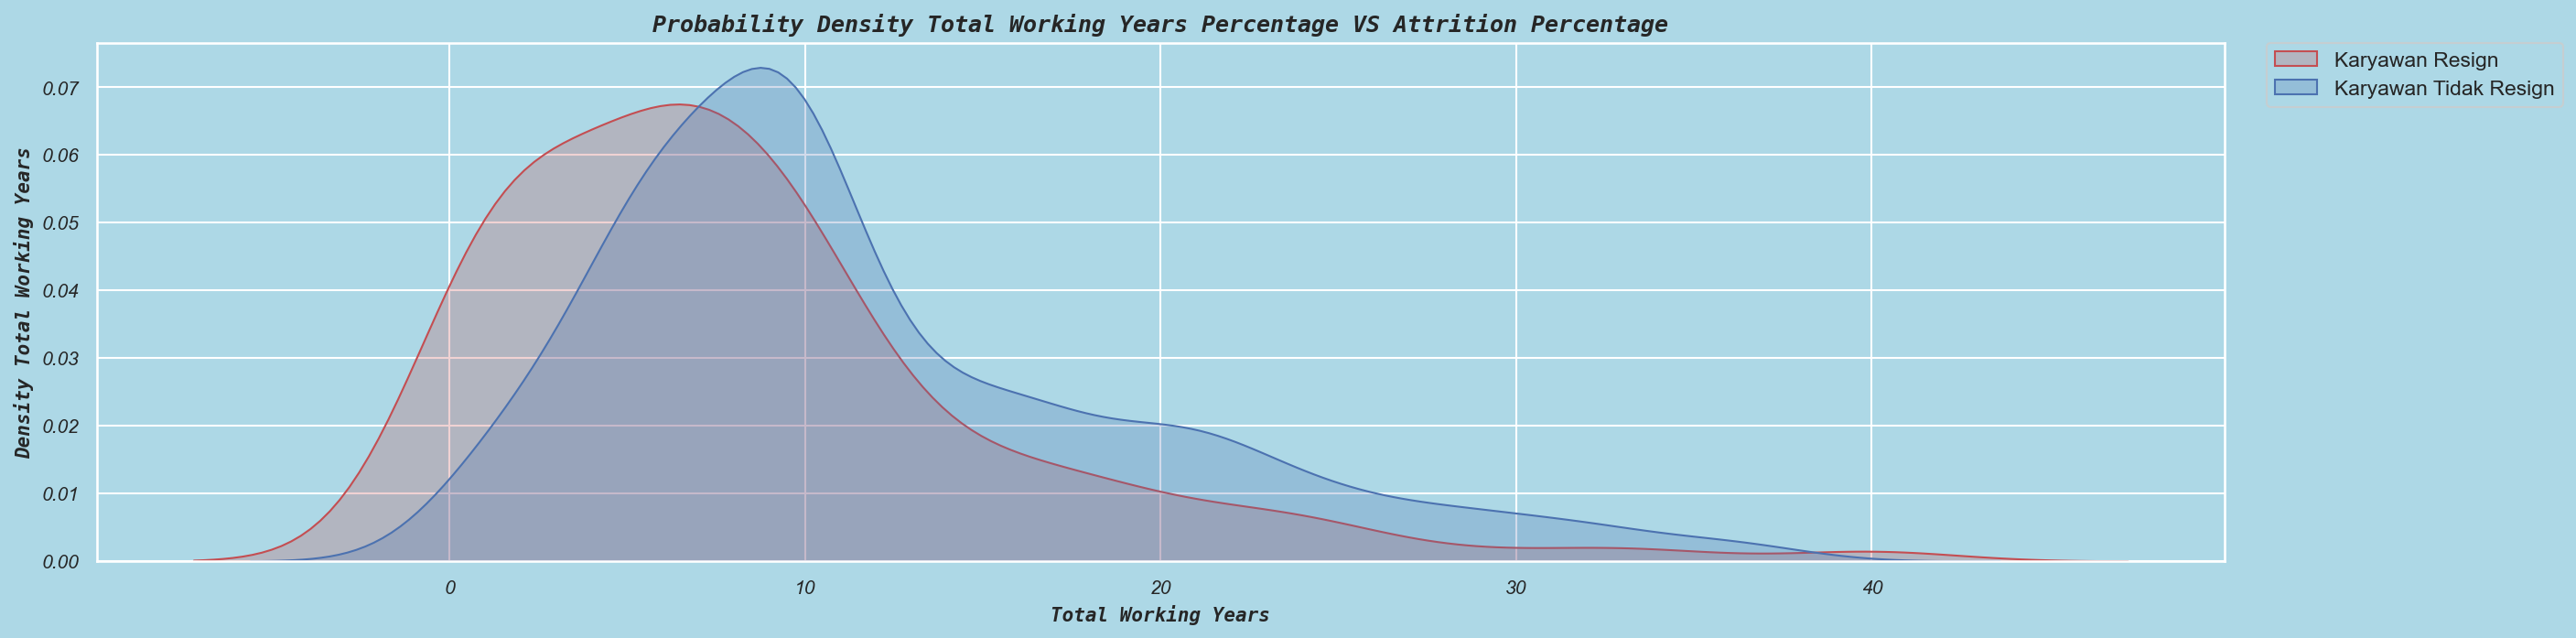

In [84]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['TotalWorkingYears'] 
df_no=df[df[ 'Attrition']=='No']['TotalWorkingYears'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Total Working Years Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Total Working Years', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Total Working Years', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Karyawan yang memiliki minat pindah paling banyak di mulai dari fresh graduate yang memiliki 0 pengalaman hingga karyawan yang pernah bekerja selama kurang dari 10 tahun memiliki minat pindah kerja paling tinggi, karyawan yang memiliki pengalaman kerja diatas 10 tahun memiliki kencendrungan untuk tidak resign/loyal pada perusahaan iya bekerja.

#### 23. Traning Time Last Year

1. Apakah jumlah training yang sedikit mempengaruhi karyawan untuk pindah kerja ?

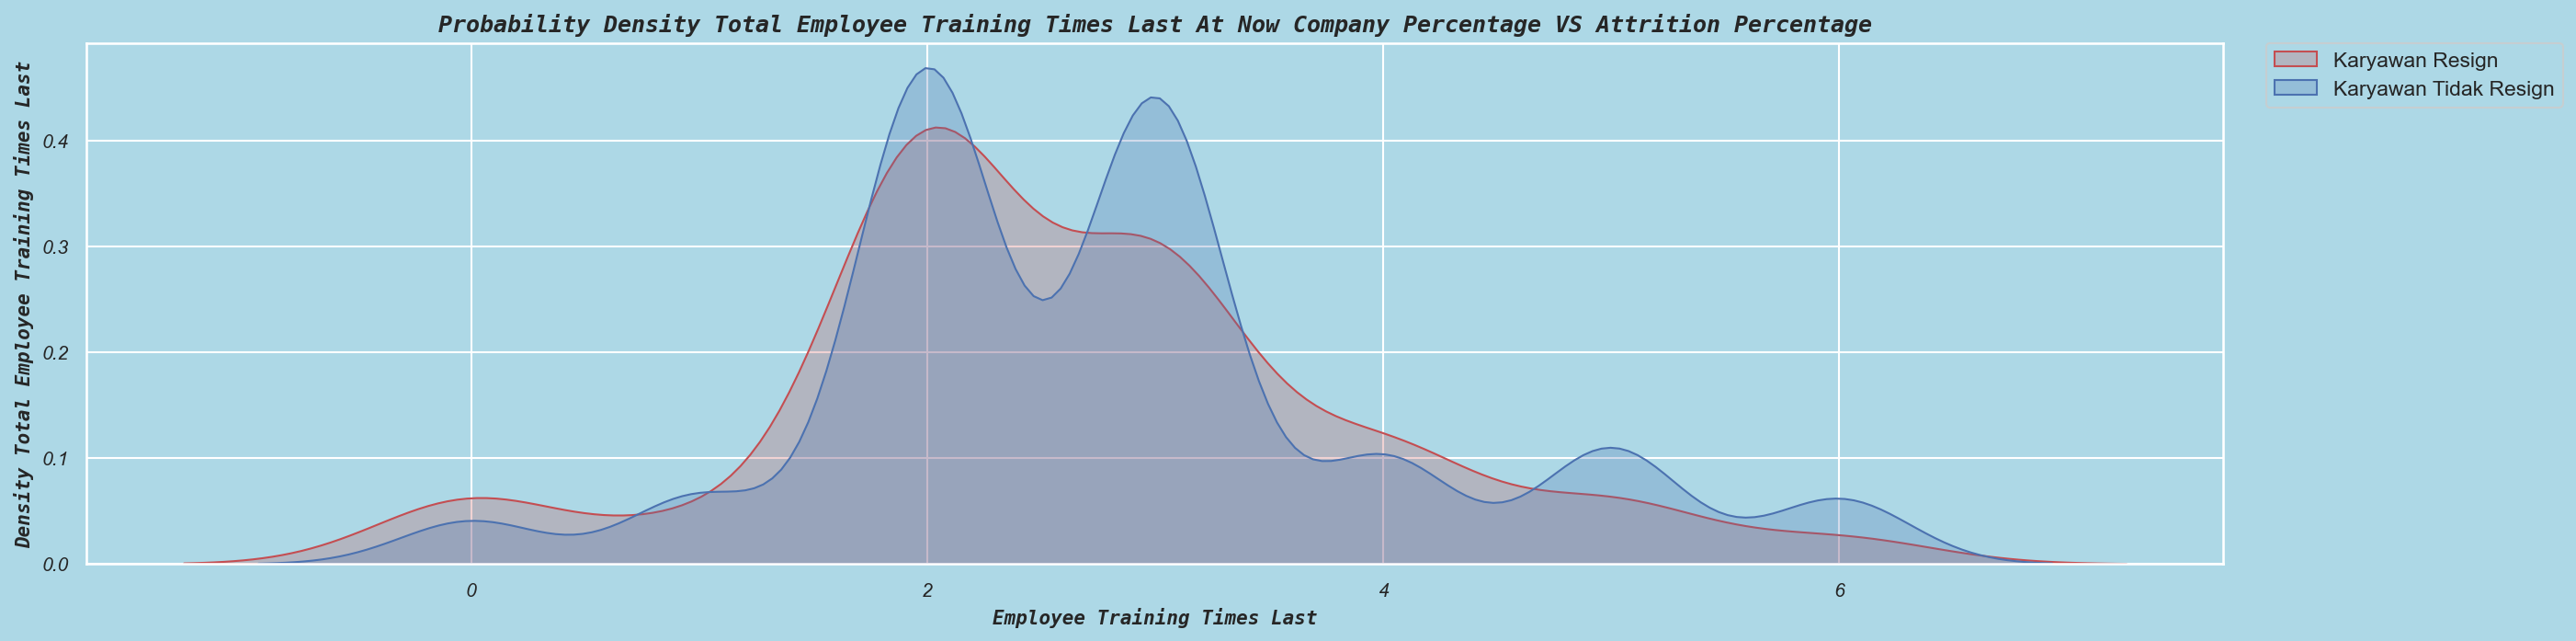

In [85]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['TrainingTimesLastYear'] 
df_no=df[df[ 'Attrition']=='No']['TrainingTimesLastYear'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Total Employee Training Times Last At Now Company Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Employee Training Times Last', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Total Employee Training Times Last', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight : 
  - karyawan yang resign paling banyak ada pada proporsi 0 training atau dapat dikatakan karyawan yang tidak pernah di training memiliki distribusi resign lebih tinggi dibandingkan karyawan yang tidak pernah di training sama sekali, untuk karyawan yang penah di training juga ada yang memiliki proporsi lebih tinggi yaitu pada 4x training namun karyawan yang mendapatkan banyak training sampai 6x lebih banyak tidak resign, artinya karyawan yang tidak pernah ditraining dan karyawan yang pernah ditraining kurang dari 6x memiliki minat resign yang tinggi.

#### 24. Years At Company

1. Berapa lama karyawan yang pernah bekerja di perusahaan ini pindah kerja?

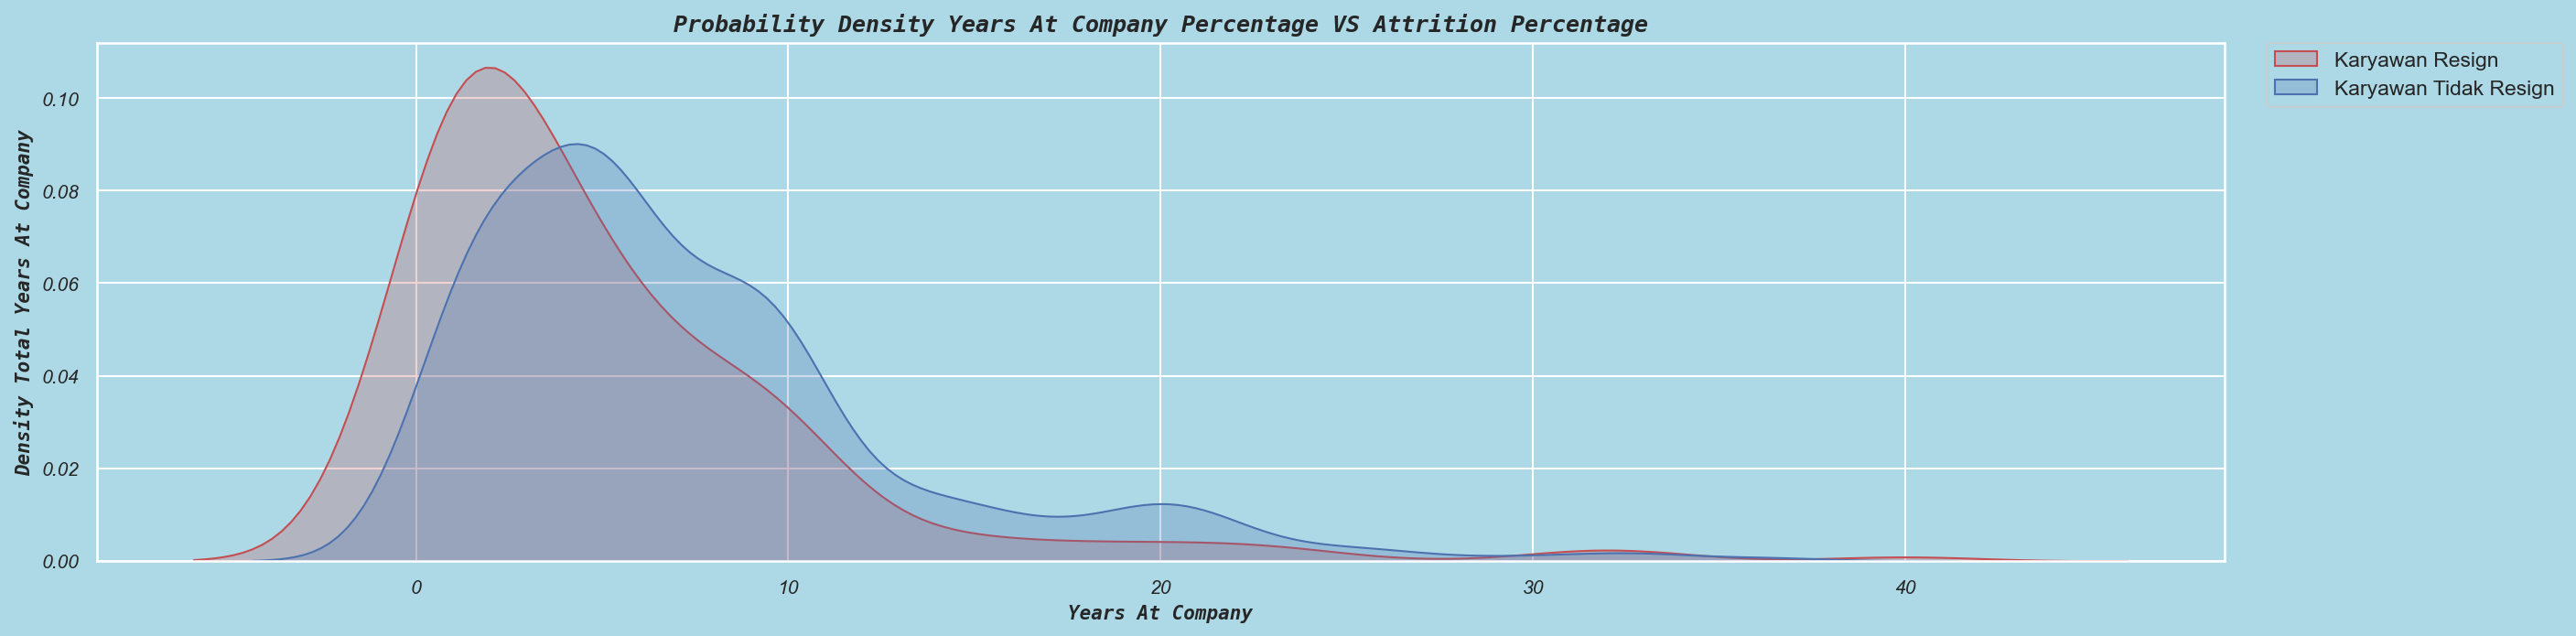

In [86]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['YearsAtCompany'] 
df_no=df[df[ 'Attrition']=='No']['YearsAtCompany'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Years At Company Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Years At Company', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Total Years At Company', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Karyawan yang bekerja di perusahaan sekarang banyak yang pindah ketika mereka sudah bekerja hingga 5 tahun, sedangkan karyawan yang bekerja lebih dari 5 tahun lebih banyak untuk menetap diperusahaan sekarang.

#### 25. Year Since Current Role

1. Berapa lama karyawan berkerja pada role job yang memutuskan untuk resign ?

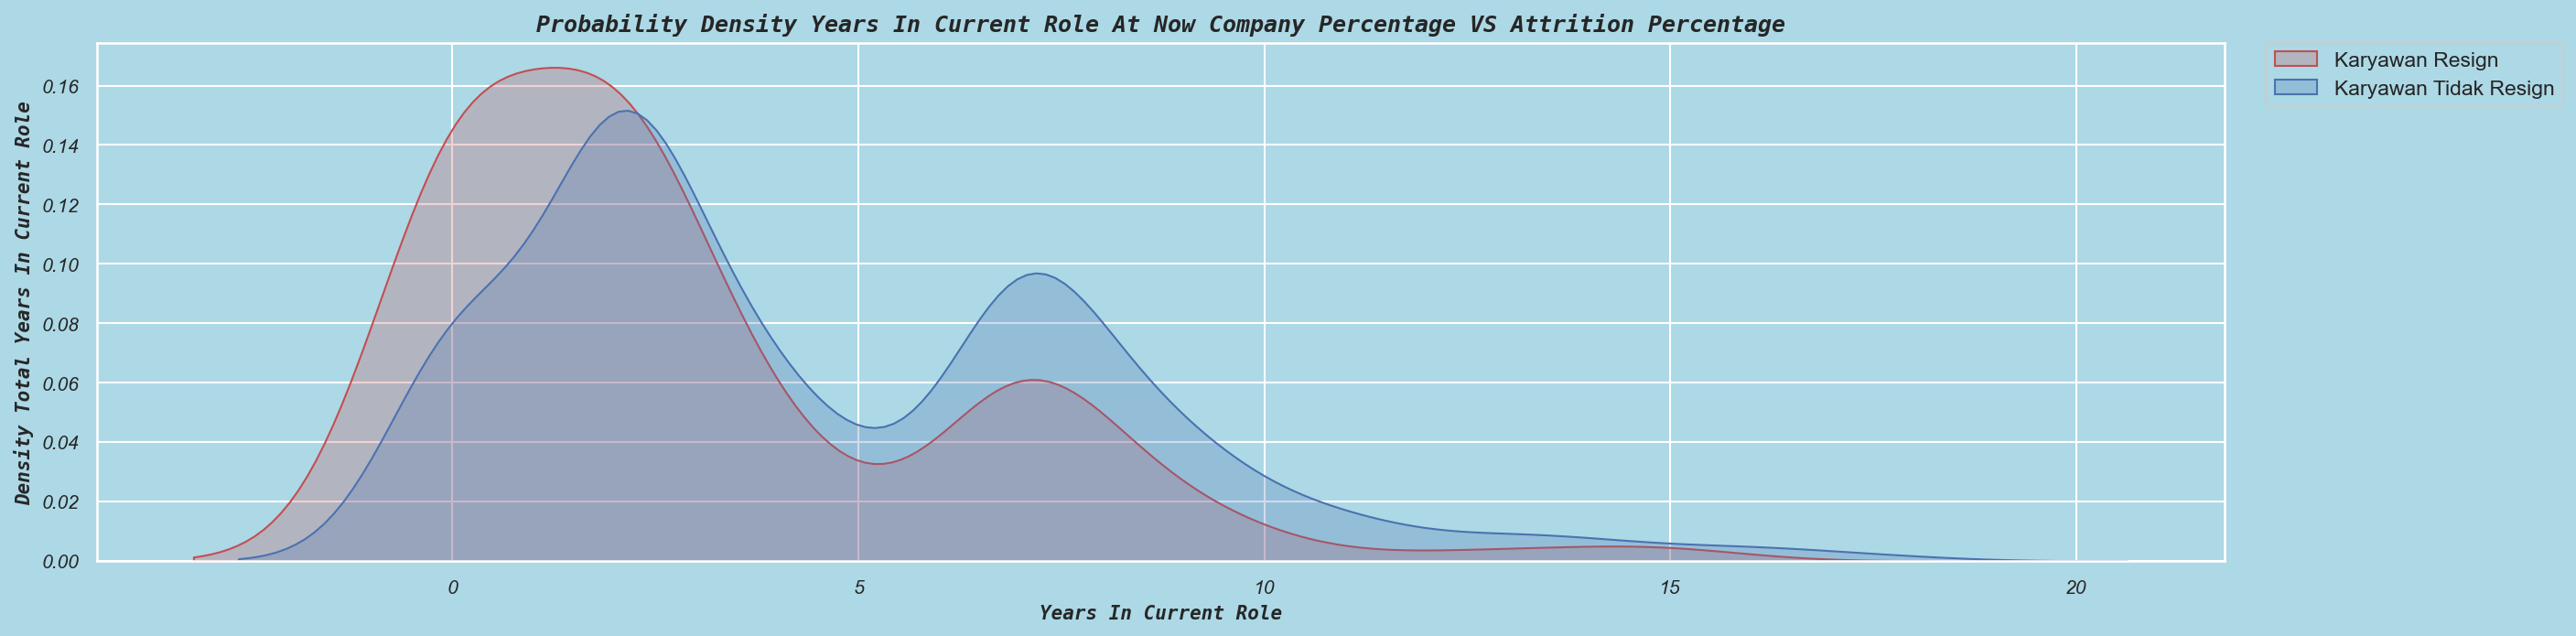

In [87]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['YearsInCurrentRole'] 
df_no=df[df[ 'Attrition']=='No']['YearsInCurrentRole'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Years In Current Role At Now Company Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Years In Current Role', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Total Years In Current Role', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Berdasarkan distribusi data karyawan yang baru bekerja pada role job ini kurang dari 3 tahun memiliki minat resign lebih tinggi, sedangkan karyawan yang sudah lama bekerja pada role job ini memiliki persentase tinggi untuk lebih memilih menetap diperusahaan ini.

#### 26. Years Since Last Promotion

1. Apakah penyebab karyawan resign karena lama mendapatkan promosi ?

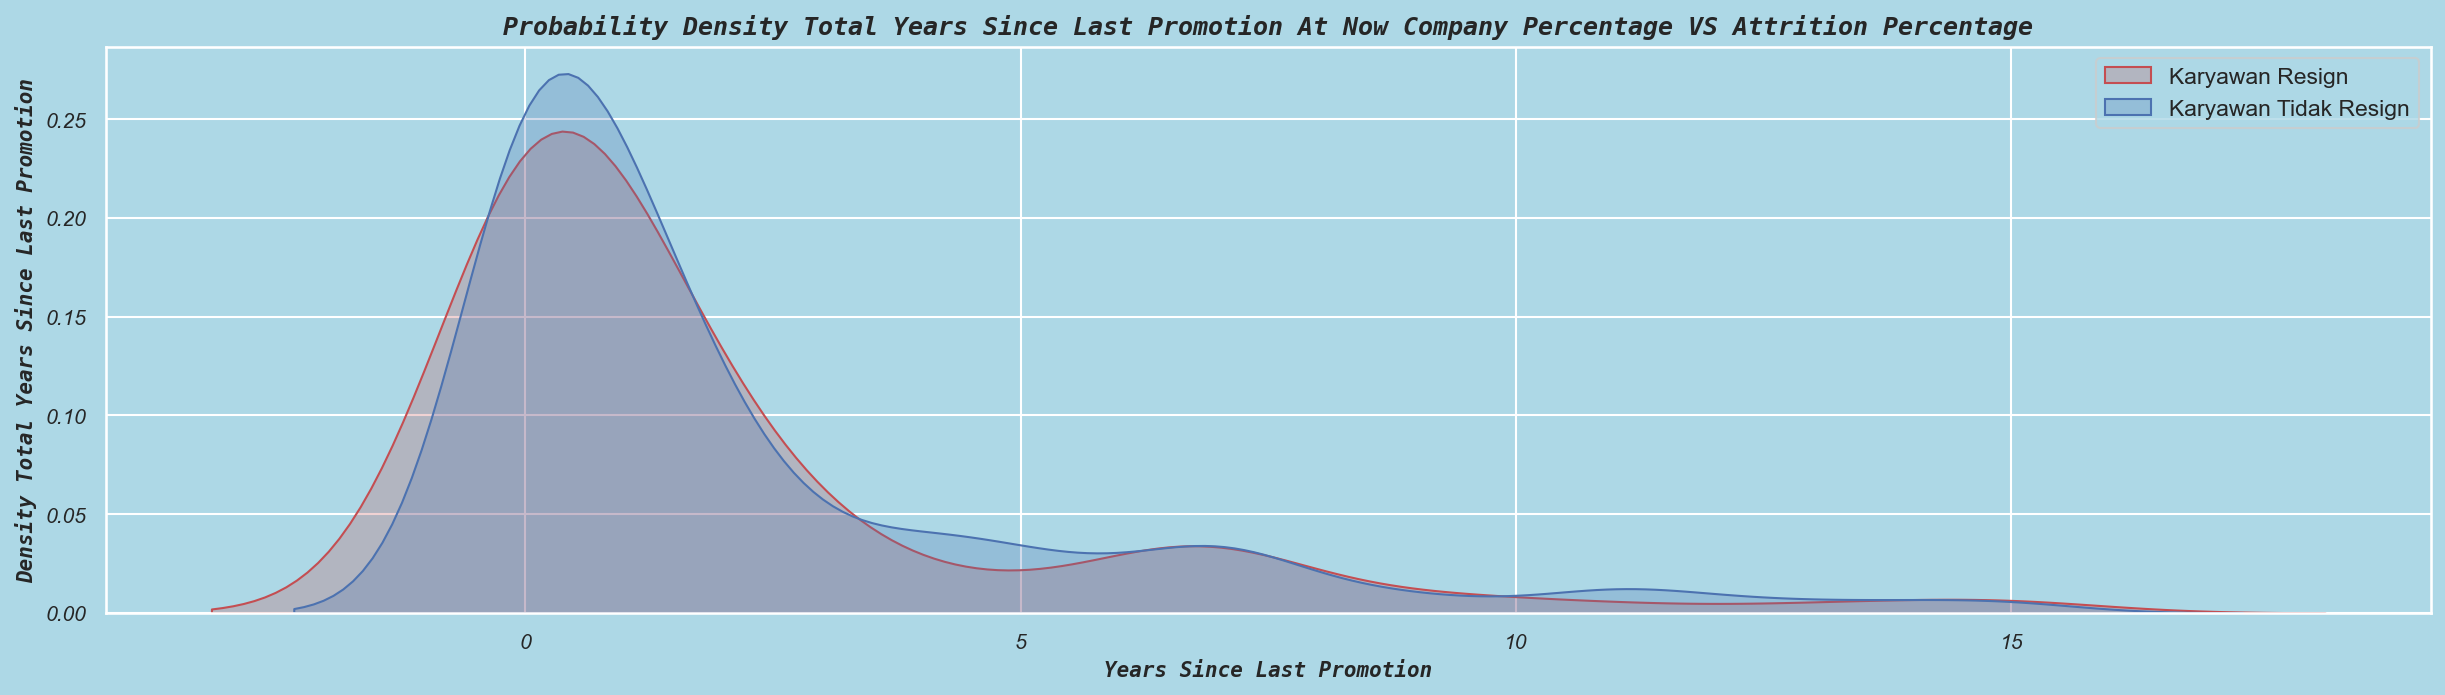

In [88]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['YearsSinceLastPromotion'] 
df_no=df[df[ 'Attrition']=='No']['YearsSinceLastPromotion'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Total Years Since Last Promotion At Now Company Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Years Since Last Promotion', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Total Years Since Last Promotion', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Jika dilihat dari distribusi data banyak karyawan yang resign ada pada yang belum pernah mendapatkan promosi namun hal ini sangat sedikit, dan karyawan yang pernah mendapatkan promosi minimal 1 tahun trakhir hingga 15 tahun trakhir ada yang resign namun persentase mereka lebih banyak yang untuk tetap tinggal di perusahaan.

#### 27. Years With Current Manager

1. Apakah karyawan yang tidak pernah bekerja dengan manager yang menjadi penyebab resign ?

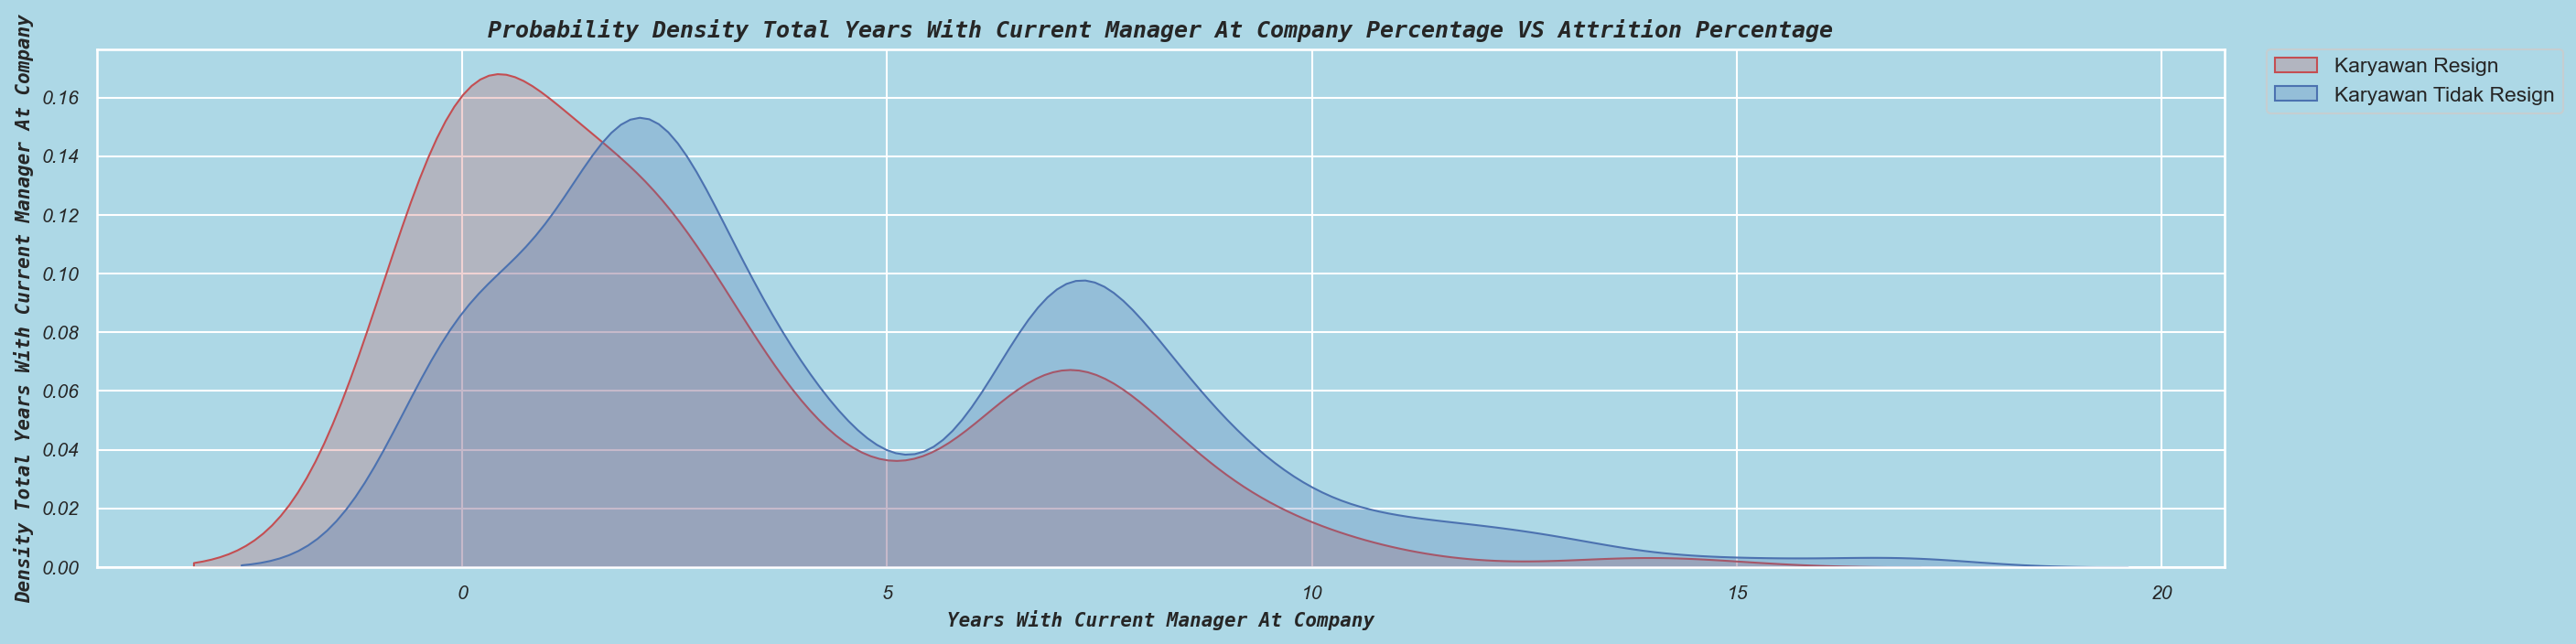

In [89]:
plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['YearsWithCurrManager'] 
df_no=df[df[ 'Attrition']=='No']['YearsWithCurrManager'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Total Years With Current Manager At Company Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Years With Current Manager At Company', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Total Years With Current Manager At Company', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Berdasarkan distribusi data karyawan yang resign banyak kurang dari 1 tahun bekerja dengan manager, untuk karyawan yang pernah bekerja  dengan manager minimal 1 tahun sampai dengan 20 tahun memiliki proporsi untuk tetap tinggal diperusahaan.

#### 28. Num Companies Worked

1. Berapa banyak karyawan pernah bekerja di perusahaan sebelumnya ?
2. Apakah banyaknya perusahaan yang pernah karyawan berkerja menjadi penyebab karyawan resign ?

In [90]:
numcompaniesworked = pd.crosstab(index=df['NumCompaniesWorked'],columns=df['Attrition'],normalize=True).round(2)
numcompaniesworked

Attrition             No   Yes
NumCompaniesWorked            
0                   0.12  0.02
1                   0.29  0.07
2                   0.09  0.01
3                   0.10  0.01
4                   0.08  0.01
5                   0.03  0.01
6                   0.04  0.01
7                   0.04  0.01
8                   0.03  0.00
9                   0.03  0.01

In [91]:
numcompaniesworked2 = pd.crosstab(index=df['NumCompaniesWorked'],columns='count',normalize=True).round(2)
numcompaniesworked3 = pd.crosstab(index=df['NumCompaniesWorked'],columns=df['Attrition'],normalize=True).round(2)
numcompaniesworked4 = pd.concat([numcompaniesworked2, numcompaniesworked3], axis=1, join='inner')
numcompaniesworked4.sort_values('Yes',ascending=False)

count    No   Yes
NumCompaniesWorked                   
1                    0.35  0.29  0.07
0                    0.13  0.12  0.02
2                    0.10  0.09  0.01
3                    0.11  0.10  0.01
4                    0.09  0.08  0.01
5                    0.04  0.03  0.01
6                    0.05  0.04  0.01
7                    0.05  0.04  0.01
9                    0.04  0.03  0.01
8                    0.03  0.03  0.00

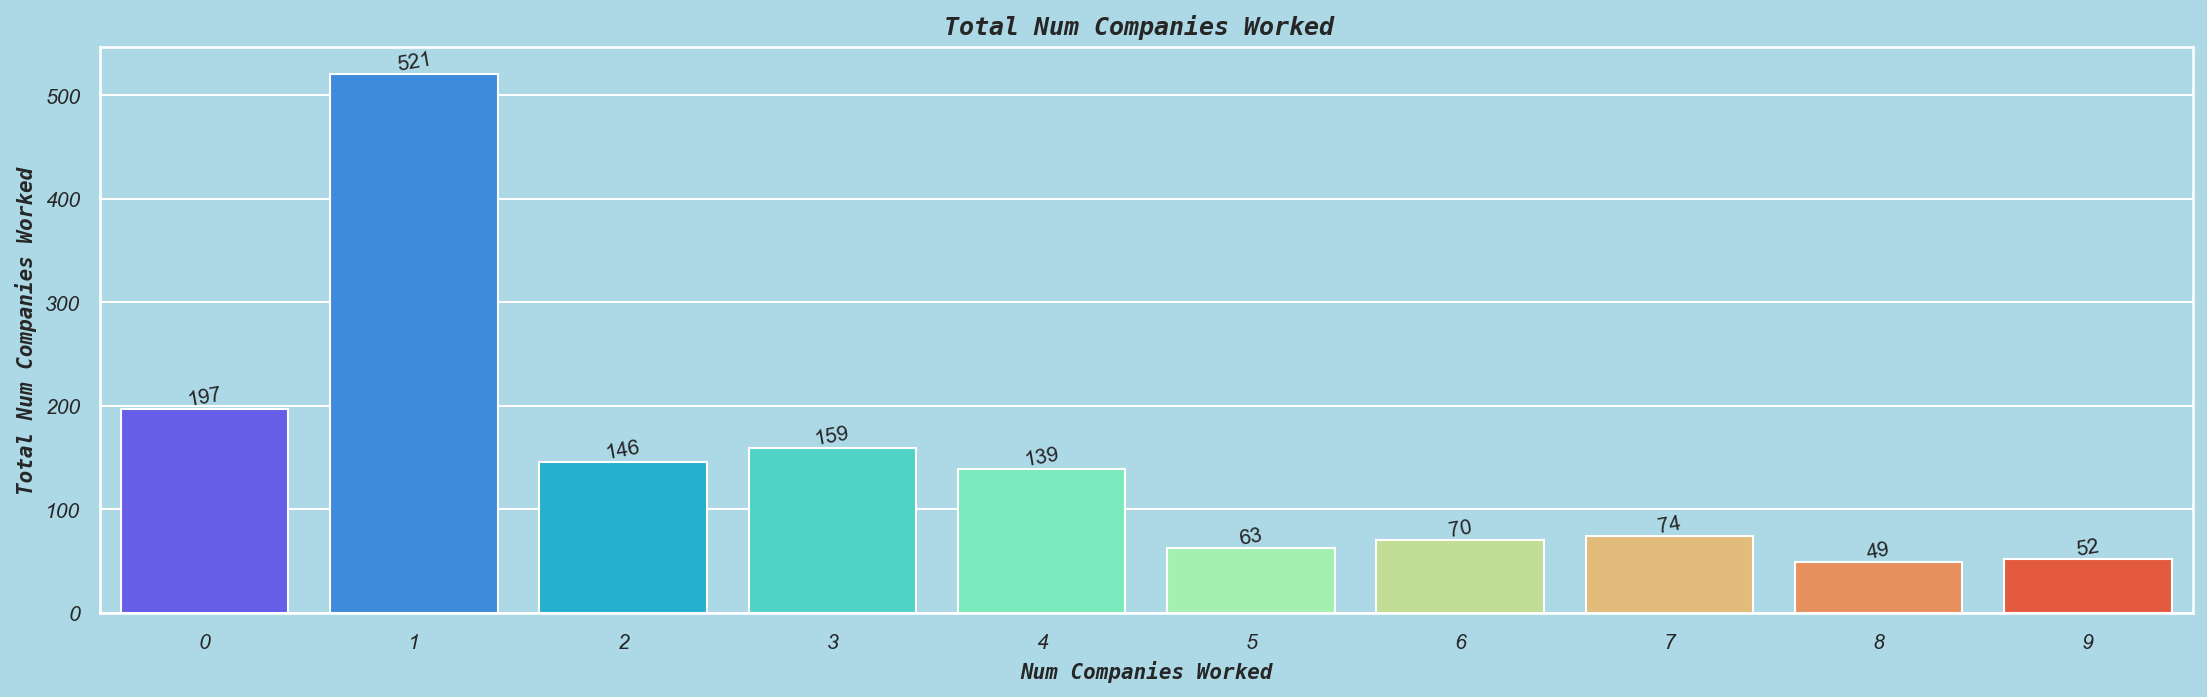

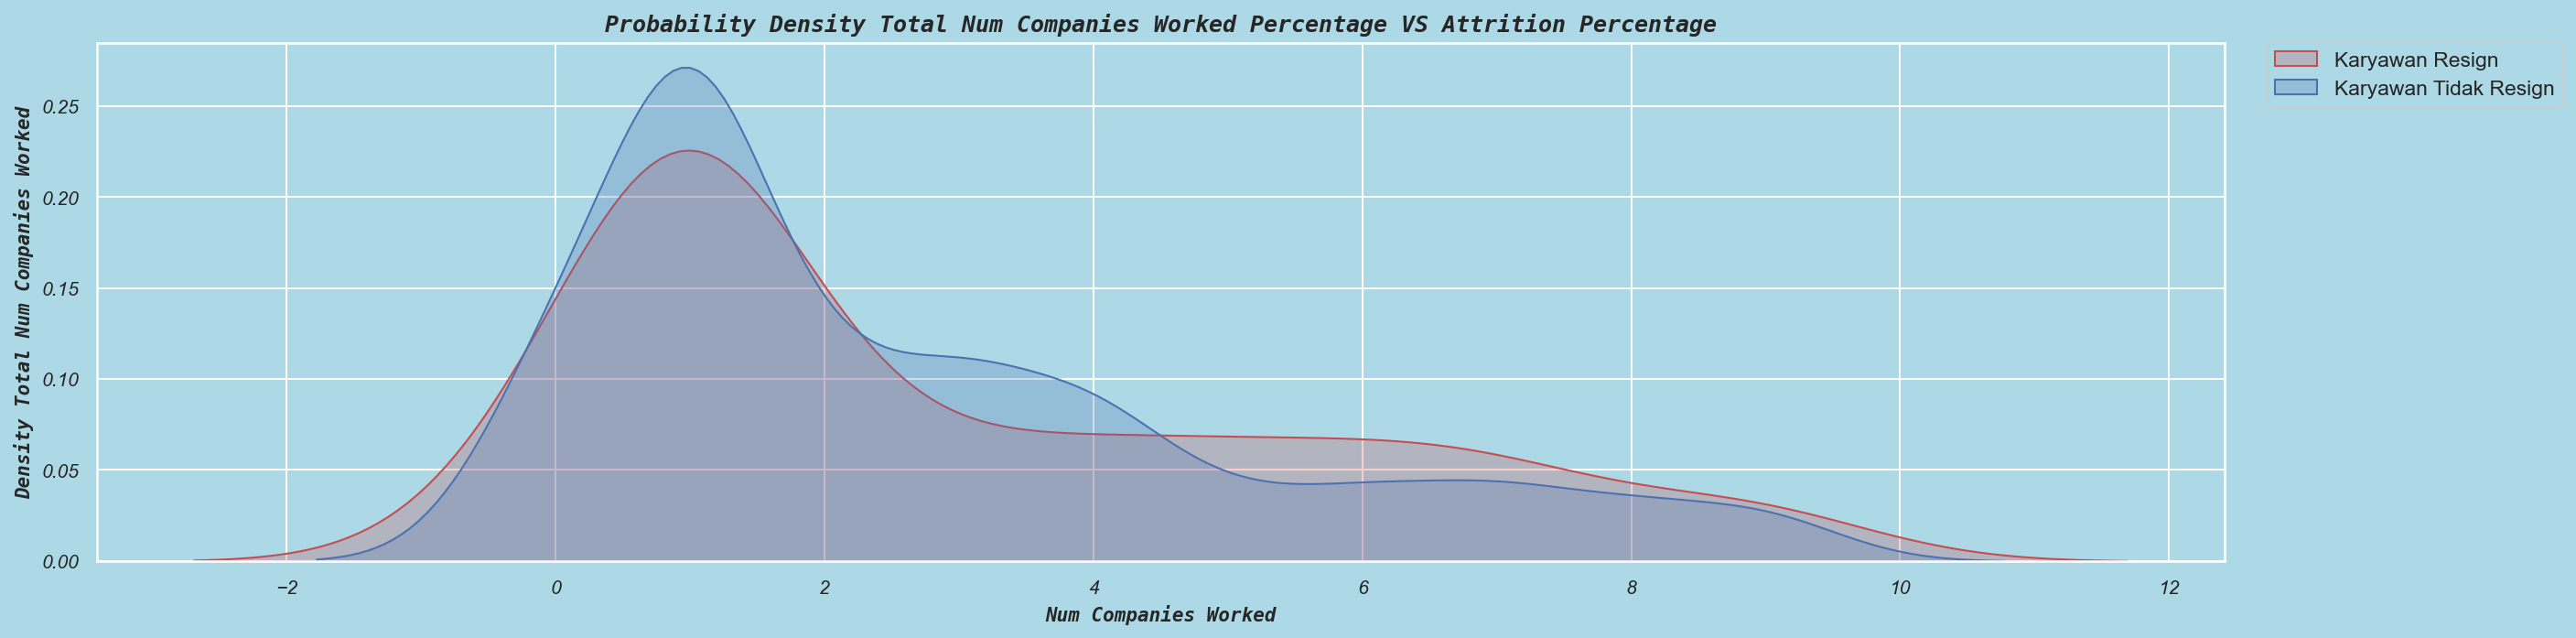

In [92]:
plt.figure(figsize=(18,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax = sns.countplot(x='NumCompaniesWorked', data=df, palette = 'rainbow')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Num Companies Worked ',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Num Companies Worked', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Num Companies Worked', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10,rotation=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5),dpi=150)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
df_yes=df[df[ 'Attrition']=='Yes']['NumCompaniesWorked'] 
df_no=df[df[ 'Attrition']=='No']['NumCompaniesWorked'] 
sns.kdeplot(df_yes, label = 'Karyawan Resign', shade = True, color = 'r' )
sns.kdeplot(df_no, label = 'Karyawan Tidak Resign', shade = True, color = 'b')
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Probability Density Total Num Companies Worked Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Num Companies Worked', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Total Num Companies Worked', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- Insight :
  - Karyawan pernah bekerja di perusahaan sebelumnya mulai dari fresh graduate 0 perusahaan hingga paling banyak 9 perusahaan karyawan pernah bekerja.
  - Berdasarkan distribusi data, karyawan yang bekerja lebih dari 5 perusahaan memiliki kecendrungan untuk resign dari perusahaan yang sekarang.

## **Kesimpulan Exploratory Data Analyst**

#### Basic Info :
  1. `Age :` Karyawan yang bekerja di perusahaan berumur paling rendah 18 tahun dan paling tinggi 60 tahun, dari keseluruhan umur karyawan yang paling banyak resign mulai dari umur 29 tahun sampai umur 31 tahun.
  2. `Gender:` Total karyawan berjenis kelamin pria (60%) lebih banyak dibandingkan karyawan wanita (40%) dan untuk karyawan yang resign paling banyak adalah pria dengan persentase 10,2%.
  3. `Distance From Home :` Jarak rumah karyawan ke kantor mulai dari 1 km sampai dengan 29km dan untuk karyawan yang paling banyak resign yang jarak rumahnya lebih dari 10km.
  4. `Education :` Perusahaan memiliki karyawan dengan pendidikan bacher 69,7% lebih banyak dibandingkan karyawan baground master dan doctor, berdasarkan pendidikan karyawan yang memiliki pendidikan bachelor lebih cenderung resign.
  5. `Marital Status :` Perusahaan memiliki karyawan paling banyak yang berstatus single lebih banyak 45,8% dan karyawan yang resign juga paling banyak berstatus single sebanyak 8,2% yang resign.
#
### Work Info :
#
  7. `Departement : ` Total karyawan pada department Sales 446 karyawan, department Research & Development 961 dan department Human Resources 63 orang dan karyawan yang paling banyak resign dari department Research & Development 9,0%.
  8. `Job Role : ` Banyak karyawan yang resign dari Job Role Laboratory Technician sebanyak 4,2%.
  9. `Over Time : ` Karyawan yang bekerja lembur sebanyak 416 orang dengan persentase 28,3% dan yang tidak bekerja lembur 1.054 dengan persentase 71,7% namun dari 28,3% karyawan memilih resign banyak dari yang bekerja lembur dengan persentase 8,6%.
  10. `Business Travel : ` Karyawan yang resign banyak berasal dari karyawan yang jarang melakukan perjalanan dinas sebanyak 156 orang dengan persentase 10,6%.
  11. `Perfomance Rating : ` Karyawan yang resign dari perusahaan banyak berasal dari karyawan yang memiliki performa bagus sebanyak 13,6% namun karyawanyang memiliki perfoma bagus yang tetap menentap diperusahaan lebih banyak 71,0%.
  12. `Stock Option Level : ` Karyawan yang resign paling banyak yang tidak mendapatkan saham perusahan sebanyak 10,5%, sedangkan karyawan yang mendapatkan saham perusahaan lebih banyak memilih menetap diperusahaan.
  13. `Job Involvement : ` Karyawan dengan tanggung jawab yang rendah paling banyak resign sedangkan karyawan yang paling sedikit resign pada karyawan yang memiliki tanggung jawab yang tinggi.
#
#### Satiscfaction :
#
  15. `Worklifebalance : ` Banyak karyawan yang masih bekerja di perusahaan karena mandapatkan work life balance yang tinggi dibandingkan karyawan yang resign memiliki work life balance yang rendah.
  16. `Job Satiscfaction: ` Banyak karyawan yang memiliki kepuasan bekerja sangat tinggi sebanyak 459 karyawan dengan persentase 31,2% dan memilih bertahan diperusahaan sedangkan karyawan yang memiliki persentase kerja yang rendah memilih  resign dari perusahaan.
  17. `Relationship Satisfaction : ` Rekan kerja yang memiliki hubungan baik dengan rekan kerja memiliki persentase tertinggi untuk resign dibandingkan rekan kerja yang memiliki hubungan dengan kerja yang rendah.
  18. `Environtment Employee`, Karyawan yang banyak resign berasal dari lingkungan kerja yang kurang nyaman (rendah), sedangkan karyawan yang memiliki lingkungan kerja yang bagus cenderung memilih bertahan di perusahaan.
#
#### Salary Related :
#
  20. `Monthly Income :` Karyawan cenderung resign jika perndapatan perbulan mereka dibawah 5000USD, sedangkan karyawan yang perndapatan perbulan diatas 5000USD lebih cenderung bertahan di perusahaan. 
  21. `Monthly Rate :` Karyawan cenderung resign pada gaji 10000USD sampai dengan dibawah 15000USD.
  22. `Daily Rate: ` Karyawan cenderung resign jika hitungan upah harian mereka dibawah 500USD.
  23. `Hourly Rate :` Banyak karyawan yang resign pada bayaran perjam mereka sekitar 40USD sampai dengan kurang dari 80USD.
  24.  `Percent Salary Hike :` Banyak karyawan yang resign jika kenaikan gaji mereka di bawah 10% dan karyawan yang memiliki kenaikan gaji diatas 10% lebih banyak memilih bertahan di perusahaan.
#
#### Time Related :
#
  25.  `Total Working Years :` Banyak karyawan yang resign dari pengalaman yang kurang dari 10 tahun bekerja.
  26.  `Training Time Last Year :` Karyawan yang paling banyak resign jika pada mereka yang belum pernah sama sekali mendapatkan training.
  27.  `Years at Company :` Banyak karyawan yang resign dari perusahaan yang kurang dari 10 tahun bekerja di perusahaan ini.
  28.  `Years In Current Role : ` Banyak karyawan yang resign dengan posisi sekarang kurang dari 5 tahun.
  29.  `Years Since Last Promotion :` Karyawan yang resign banyak dari yang belum dapat promosi, sedangkan karyawan yang sudah mendapatkan promosi cenderung memilih untuk bertahan di perusahaan.
  30.  `Years With Current Manager :` Karyawan banyak yang resign yang belum pernah sama sekali bekerja dengan manager, sedangkan karyawan yang sudah pernah bekerja dengan manager cenderung untuk bertahan di perusahaan.
  31.  `Num Companies Worked : ` Karyawan yang bekerja dari perusahaan sebelumnya ada dari yang fresh graduate sampai dengan sudah 9x bekerja di perusahaan yang berbeda, namun karyawan yang paling banyak resign ada pada yang bekerja sudah pada lebih dari 5 perusahaan.

## **Saran Exploratory Data Analyst**

#### Basic Info :
  -  Perusahaan perlu memfokuskan karyawan yang menuju umur 30 tahun berpendidikan bachelor baik itu laki-laki ataupun perempuan yang masih single terutama yang jarak rumahnya lebih 10 km dari kantor.
#
### Work Info :
#
  - Karyawan dari department Research & Development terutama yang bekerja sebagai Laboratory Technician perlu dievaluasi sistem jam kerjanya untuk menghindari karyawan sering bekerja overtime. terutama karyawan yang memiliki performa kerja yang bagus.
  - Untuk Karyawan yang sudah berkontribusi lebih dari 10 tahun perusahaan dengan performa yang bagus dan bertanggung jawab maka perusahaan dapat memberikan saham nya kepada karyawan sebagai bentuk apresiasi loyalitas karyawan dalam berkontribusi kepada perusahaan.
#
#### Satiscfaction :
#
  - Perusahaan perlu mempertimbangkan kepuasan karyawan antara kerjaan dengan kehidupan pribadi, hal ini dapat dilakukan dengan perusahaan dapat menyewa psikolog dari konsultan agar karyawan yang burn out bekerja dapat berdiskusi dengan psikolog yang telah disediakan atau perusahaan dapat memberikan bonus tambahan kepada karyawan dengan pergi berlibur dengan rekan kerja di kantor pada saat weekend. 
#
#### Salary Related :
#
  - Perusahaan dapat mempertimbangkan untuk kenaikan gaji karyawan di atas 10% dan berikan bonus/ insentif kepada karyawan yang masih bekerja di kantor.
#
#### Time Related :
#
  - Perusahaan dapat meningkatkan pelatihan kepada karyawan minimal 1 tahun 1x terutama untuk karyawan yang baru bekerja diperusahaan ini, untuk karyawan yang memiliki perfoma bagus perusahaan dapat mempertimbangkan untuk menaikan jabatan baru minimal 1 tahun bekerja diperusahaan atau 1 tahun mereka bekerja dari posisi sekarang. 

## **MACHINE LEARNING (CLASSIFICATION)**